<a href="https://colab.research.google.com/github/BibhuDas123/Exploratory_Data_Analysis/blob/master/NOTES_AND_CODE_SNIPPETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of the time, it’s also possible to convert a supervised dataset to unsupervised  to see how they look like when plotted.  For example, let’s take a look at the dataset in figure 3. Figure 3 shows MNIST  dataset which is a very popular dataset of handwritten digits, and it is a supervised  problem in which you are given the images of the numbers and the correct label  associated with them. You have to build a model that can identify which digit is it  when provided only with the image.  This dataset can easily be converted to an unsupervised setting for basic  visualization. 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


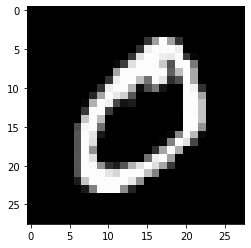

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import seaborn as sns  
from sklearn import datasets  
from sklearn import manifold 
%matplotlib inline 

data = datasets.fetch_openml(  'mnist_784',  version=1,  return_X_y=True)  
pixel_values, targets = data  
targets = targets.astype(int) 

#pixel_values is a 2-dimensional array of shape 70000x784. There are 70000  different images, each of size 28x28 pixels. 
#Flattening 28x28 gives 784 data points.  We can visualize the samples in this dataset by reshaping them to their original  
#shape and then plotting them using matplotlib. 
single_image = pixel_values[1, :].reshape(28, 28)  
plt.imshow(single_image, cmap='gray') 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


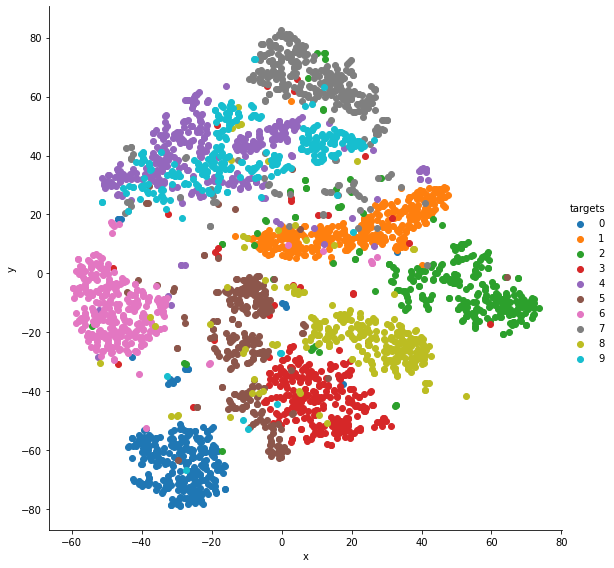

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)  
transformed_data = tsne.fit_transform(pixel_values[:3000,:]) 
# This step creates the t-SNE transformation of the data. We use only two components  as we can visualize them well in a two-dimensional setting. 
#The transformed_data,  in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like  this can be converted to a pandas 
#dataframe by calling pd.DataFrame on the array.   
tsne_df = pd.DataFrame(  np.column_stack((transformed_data, targets[:3000])),  
                       columns=["x", "y", "targets"]  )  
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)  

grid = sns.FacetGrid(tsne_df, hue="targets", size=8)  
grid.map(plt.scatter, "x", "y").add_legend() 

Occam’s razor in simple words states that one should not try to complicate things  that can be solved in a much simpler manner. In other words, the simplest solutions  are the most generalizable solutions. In general, whenever your model does not  obey Occam’s razor, it is probably overfitting. 

There are many different ways one can do cross-validation, and it is the most critical  step when it comes to building a good machine learning model which is  generalizable when it comes to unseen data. Choosing the right cross-validation  depends on the dataset you are dealing with, and one’s choice of cross-validation  on one dataset may or may not apply to other datasets. However, there are a few  types of cross-validation techniques which are the most popular and widely used.  These include:  
• k-fold cross-validation  • stratified k-fold cross-validation • hold-out based validation  • leave-one-out cross-validation  • group k-fold cross-validation 


 

In [ ]:
#KFOLD CROSS VALIDATION
#import pandas and model_selection module of scikit-learn  
import pandas as pd  
from sklearn import model_selection  
if  __name__  ==  "__main__":  
  #Training data is in a CSV file called train.csv  
  df = pd.read_csv("train.csv")  
  #we create a new column called kfold and fill it with -1  
  df["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  df = df.sample(frac=1).reset_index(drop=True)  
  #initiate the kfold class from model_selection module  
  kf = model_selection.KFold(n_splits=5)  
  #fill the new kfold column  
  for fold, (trn_, val_) in enumerate(kf.split(X=df)):  
    df.loc[val_, 'kfold'] = fold  
  #save the new csv with kfold column  
  df.to_csv("train_folds.csv", index=False) 

The next important type of cross-validation is stratified k-fold. If you have a  skewed dataset for binary classification with 90% positive samples and only 10%  negative samples, you don't want to use random k-fold cross-validation. Using  simple k-fold cross-validation for a dataset like this can result in folds with all  negative samples. In these cases, we prefer using stratified k-fold cross-validation.  Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So,  in each fold, you will have the same 90% positive and 10% negative samples.


The rule is simple. If it’s a standard classification problem, choose stratified k-fold  blindly.  But what should we do if we have a large amount of data? Suppose we have 1  million samples. A 5 fold cross-validation would mean training on 800k samples  and validating on 200k. Depending on which algorithm we choose, training and  even validation can be very expensive for a dataset which is of this size. In these  cases, we can opt for a hold-out based validation. 




The process for creating the hold-out remains the same as stratified k-fold. For a  dataset which has 1 million samples, we can create ten folds instead of 5 and keep  one of those folds as hold-out. This means we will have 100k samples in the holdout, and we will always calculate loss, accuracy and other metrics on this set and  train on 900k samples.  Hold-out is also used very frequently with time-series data. 

Let’s assume the  problem we are provided with is predicting sales of a store for 2020, and you are  provided all the data from 2015-2019. In this case, you can select all the data for  2019 as a hold-out and train your model on all the data from 2015 to 2018. 


In the example presented in figure 7, let’s say our job is to predict the sales from  time step 31 to 40. We can then keep 21 to 30 as hold-out and train our model from  step 0 to step 20. You should note that when you are predicting from 31 to 40, you  should include the data from 21 to 30 in your model; otherwise, performance will  be sub-par.  

In many cases, we have to deal with small datasets and creating big validation sets  means losing a lot of data for the model to learn. In those cases, we can opt for a  type of k-fold cross-validation where k=N, where N is the number of samples in the  dataset. This means that in all folds of training, we will be training on all data  samples except 1. The number of folds for this type of cross-validation is the same  as the number of samples that we have in the dataset. 

 

The good thing about regression problems is that  we can use all the cross-validation techniques mentioned above for regression  problems except for stratified k-fold. That is we cannot use stratified k-fold directly,  but there are ways to change the problem a bit so that we can use stratified k-fold  for regression problems. Mostly, simple k-fold cross-validation works for any  regression problem. However, if you see that the distribution of targets is not  consistent, you can use stratified k-fold. 


To use stratified k-fold for a regression problem, we have first to divide the target  into bins, and then we can use stratified k-fold in the same way as for classification  problems. There are several choices for selecting the appropriate number of bins. If  you have a lot of samples( > 10k, > 100k), then you don’t need to care about the  number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of  samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate  number of bins.  Sturge’s rule:  
Number of Bins = 1 + log2(N)  

Where N is the number of samples you have in your dataset.


In [ ]:
import numpy as np  
import pandas as pd  
from sklearn import datasets  
from sklearn import model_selection 

def create_folds(data):  
  #we create a new column called kfold and fill it with -1  
  data["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  data = data.sample(frac=1).reset_index(drop=True)  
  #calculate the number of bins by Sturge's rule  #I take the floor of the value, you can also  #just round it  
  num_bins = int(np.floor(1 + np.log2(len(data))))  
  #bin targets  
  data.loc[:, "bins"] = pd.cut(  data["target"], bins=num_bins, labels=False  )  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  #note that, instead of targets, we use bins!  
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):  
    data.loc[v_, 'kfold'] = f  
    #drop the bins column  
    data = data.drop("bins", axis=1)  
    #return dataframe with folds  
    return data  
if  __name__  ==  "__main__":  
  #we create a sample dataset with 15000 samples  #and 100 features and 1 target  
  X, y = datasets.make_regression(  n_samples=15000, n_features=100, n_targets=1  )  
  #create a dataframe out of our numpy arrays  
  df = pd.DataFrame(  X,  columns=[f"f_{i}" for i in range(X.shape[1])]  )  
  df.loc[:, "target"] = y  
  #create folds  
  df = create_folds(df) 

first. If you have a good crossvalidation scheme in which validation data is representative of training and realworld data, you will be able to build a good machine learning model which is highly  generalizable. 

The types of cross-validation presented in this chapter can be applied to almost any  machine learning problem. Still, you must keep in mind that cross-validation also  depends a lot on the data and you might need to adopt new forms of cross-validation  depending on your problem and data.  For example, let’s say we have a problem in which we would like to build a model  to detect skin cancer from skin images of patients. 

Our task is to build a binary  classifier which takes an input image and predicts the probability for it being benign  or malignant.  In these kinds of datasets, you might have multiple images for the same patient in  the training dataset. So, to build a good cross-validation system here, you must have  stratified k-folds, but you must also make sure that patients in training data do not  appear in validation data. Fortunately, scikit-learn offers a type of cross-validation  known as GroupKFold. Here the patients can be considered as groups. But  unfortunately, there is no way to combine GroupKFold with StratifiedKFold in  scikit-learn.




If we talk about classification problems, the most common metrics used are: 
 - Accuracy  - Precision (P)  - Recall (R)  - F1 score (F1)  - Area under the ROC (Receiver Operating Characteristic) curve or simply  AUC (AUC)  - Log loss  - Precision at k (P@k)  - Average precision at k (AP@k)  - Mean average precision at k (MAP@k) 
 
  When it comes to regression, the most commonly used evaluation metrics are:  
  
  - Mean absolute error (MAE)  - Mean squared error (MSE)  - Root mean squared error (RMSE)  - Root mean squared logarithmic error (RMSLE)  - Mean percentage error (MPE)  - Mean absolute percentage error (MAPE)  - R2  Knowing about how the aforementioned metrics work is not the

When we have an equal number of positive and negative samples in a binary  classification metric, we generally use accuracy, precision, recall and f1. 






You will notice that it’s challenging to choose a value of threshold that gives both  good precision and recall values. If the threshold is too high, you have a smaller  number of true positives and a high number of false negatives. This decreases your  recall; however, your precision score will be high. If you reduce the threshold too  low, false positives will increase a lot, and precision will be less. 

Both precision and recall range from 0 to 1 and a value closer to 1 is better.  F1 score is a metric that combines both precision and recall. It is defined as a simple  weighted average (harmonic mean) of precision and recall. If we denote precision  using P and recall using R, we can represent the F1 score as: 

 F1 = 2PR/ (P + R)  
 
 A little bit of mathematics will lead you to the following equation of F1 based on  TP, FP and FN  
 
 F1 = 2TP/ (2TP + FP + FN) 



Instead of looking at precision and recall individually, you can also just look at F1  score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1,  and a perfect prediction model has an F1 of 1. When dealing with datasets that have  skewed targets, we should look at F1 (or precision and recall) instead of accuracy.  Then there are other crucial terms that we should know about.  The first one is TPR or True Positive Rate, which is the same as recall.  
TPR = TP/ (TP + FN) 

TPR or recall is also known as sensitivity. 

And FPR or False Positive Rate, which is defined as:  

FPR = FP/ (TN + FP) 


 

Let’s assume that we have only 15 samples and their target values are binary:  

Actual targets: [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]  We train a model like the random forest, and we can get the probability of when a  sample is positive.  
Predicted probabilities for 1: [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3,  0.2, 0.85, 0.15, 0.99]  

For a typical threshold of >= 0.5, we can evaluate all the above values of precision,  recall/TPR, F1 and FPR. But we can do the same if we choose the value of the  threshold to be 0.4 or 0.6. In fact, we can choose any value between 0 and 1 and  calculate all the metrics described above. 

 Let’s calculate only two values, though: TPR and FPR. 



In [ ]:
tpr_list = []  
fpr_list = []  

Thakur, Abhishek. Approaching (Almost) Any Machine Learning Problem (p. 42). Abhishek Thakur. Kindle Edition. 
#actual targets  
y_true = [0, 0, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 0, 0, 1]  
#predicted probabilities of a sample being 1  
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,  0.9, 0.5, 0.3, 0.66, 0.3, 0.2,  0.85, 0.15, 0.99]  
#handmade thresholds  
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]  
#loop over all thresholds  
for thresh in thresholds:  
  #calculate predictions for a given threshold  
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]  
  #calculate tpr  
  temp_tpr = tpr(y_true, temp_pred)  
  #calculate fpr  
  temp_fpr = fpr(y_true, temp_pred)  
  #append tpr and fpr to lists  
  tpr_list.append(temp_tpr)  
  fpr_list.append(temp_fpr)   


plt.figure(figsize=(7, 7))  
plt.fill_between(fpr_list, tpr_list, alpha=0.4)  
plt.plot(fpr_list, tpr_list, lw=3)  
plt.xlim(0, 1.0)  
plt.ylim(0, 1.0)  
plt.xlabel('FPR', fontsize=15)  
plt.ylabel('TPR', fontsize=15)  
plt.show() 

This curve is also known as the Receiver Operating Characteristic (ROC). And  if we calculate the area under this ROC curve, we are calculating another metric  which is used very often when you have a dataset which has skewed binary targets.  This metric is known as the Area Under ROC Curve or Area Under Curve or  just simply AUC.
 

In [ ]:
from sklearn import metrics 
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]  
metrics.roc_auc_score(y_true, y_pred)   


0.8300000000000001

AUC values range from 0 to 1. 

 - AUC = 1 implies you have a perfect model. Most of the time, it means that  you made some mistake with validation and should revisit data processing  and validation pipeline of yours. If you didn’t make any mistakes, then  congratulations, you have the best model one can have for the dataset you  built it on.  
 
 - AUC = 0 implies that your model is very bad (or very good!). Try inverting  the probabilities for the predictions, for example, if your probability for the  positive class is p, try substituting it with 1-p. This kind of AUC may also  mean that there is some problem with your validation or data processing.  
 
 - AUC = 0.5 implies that your predictions are random. So, for any binary  classification problem, if I predict all targets as 0.5, I will get an AUC of  0.5.  AUC values between 0 and 0.5 imply that your model is worse than random. Most  of the time, it’s because you inverted the classes. 
 
 
 If you try to invert your  predictions, your AUC might become more than 0.5. AUC values closer to 1 are  considered good.  But what does AUC say about our model?  Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax  from chest x-ray images. This means that if you select a random image from your  dataset with pneumothorax (positive sample) and another random image without  pneumothorax (negative sample), then the pneumothorax image will rank higher  than a non-pneumothorax image with a probability of 0.85. 

 

After calculating probabilities and AUC, you would want to make predictions on  the test set. Depending on the problem and use-case, you might want to either have  probabilities or actual classes. If you want to have probabilities, it’s effortless. You  already have them. If you want to have classes, you need to select a threshold. In  the case of binary classification, you can do something like the following.  

Prediction = Probability >= Threshold  

Which means, that prediction is a new list which contains only binary variables. An  item in prediction is 1 if the probability is greater than or equal to a given threshold  else the value is 0.  And guess what, you can use the ROC curve to choose this threshold! 

The ROC  curve will tell you how the threshold impacts false positive rate and true positive  rate and thus, in turn, false positives and true positives. You should choose the  threshold that is best suited for your problem and datasets.  For example, if you don’t want to have too many false positives, you should have a  high threshold value. 

This will, however, also give you a lot more false negatives.  Observe the trade-off and select the best threshold. Let’s see how these thresholds  impact true positive and false positive values.  

In [ ]:
def true_positive(y_true, y_pred): 
  """  Function to calculate True Positives  
  :param y_true: list of true values  
  :param y_pred: list of predicted values 
   :return: number of true positives  """  
  tp=0
   #initialize
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:  
       tp += 1  
  return tp  
def true_negative(y_true, y_pred):  
  """  Function to calculate True Negatives  :param y_true: list of true values  :param y_pred: list of predicted values  :return: number of true negatives  """
    #initialize  
  tn = 0  
  for yt, yp in zip(y_true, y_pred):  
    if yt == 0 and yp == 0:  
        tn += 1  
  return tn  
def false_positive(y_true, y_pred):  
  """  Function to calculate False Positives  :param y_true: list of true values  :param y_pred: list of predicted values  :return: number of false positives  """  
  #initialize 
  fp = 0  
  for yt, yp in zip(y_true, y_pred):  
    if yt == 0 and yp == 1:  
      fp += 1 
  return fp  
def false_negative(y_true, y_pred):  
  """  Function to calculate False Negatives  :param y_true: list of true values  :param y_pred: list of predicted values  :return: number of false negatives  """  
  #initialize  
  fn = 0  
  for yt, yp in zip(y_true, y_pred):  
    if yt == 1 and yp == 0:  
      fn += 1 
  return fn 

In [ ]:
#empty lists to store true positive  
#and false positive values  
tp_list = []  
fp_list = []  
#actual targets  
y_true = [0, 0, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 0, 0, 1]  
#predicted probabilities of a sample being 1  
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,  0.9, 0.5, 0.3, 0.66, 0.3, 0.2,  0.85, 0.15, 0.99]  
#some handmade thresholds  
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,  0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]  
#loop over all thresholds  
for thresh in thresholds: 
  #calculate predictions for a given threshold  
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]  
  #calculate tp  
  temp_tp = true_positive(y_true, temp_pred)  
  #calculate fp  
  temp_fp = false_positive(y_true, temp_pred)  
  #append tp and fp to lists  
  tp_list.append(temp_tp)  
  fp_list.append(temp_fp)  

AUC is a widely used metric for skewed binary classification tasks in the industry,  and a metric everyone should know about. Once you understand the idea behind  AUC, as explained in the paragraphs above, it is also easy to explain it to nontechnical people who would probably be assessing your models in the industry.  Another important metric you should learn after learning AUC is log loss. In case  of a binary classification problem, we define log loss as:  

Log Loss = - 1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction))  
Where target is either 0 or 1 and prediction is a probability of a sample belonging  to class 1.  

For multiple samples in the dataset, the log-loss over all samples is a mere average  of all individual log losses. One thing to remember is that log loss penalizes quite  high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very  sure and very wrong.  

Implementation of log loss is easy.  Interpretation may seem a bit difficult. You must remember that log loss penalizes  a lot more than other metrics.  For example, 
if you are 51% sure about a sample belonging to class 1, log loss  would be:  - 

1.0 * (1 * log(0.51) + (1 - 1) * log(1 – 0.51)) = 0.67  

And if you are 49% sure for a sample belonging to class 0, log loss would be:  

- 1.0 * (0 * log(0.49) + (1 - 0) * log(1 – 0.49)) = 0.67  

So, even though we can choose a cut off at 0.5 and get perfect predictions, we will  still have a very high log loss. So, when dealing with log loss, you need to be very  careful; any non-confident prediction will have a very high log loss. 


multi-class classification problem.  

There are three different ways to calculate this which might get confusing from time  to time. 
Let’s assume we are interested in precision first. We know that precision  depends on true positives and false positives. 

 - Macro averaged precision: calculate precision for all classes individually  and then average them  
 
 - Micro averaged precision: calculate class wise true positive and false  positive and then use that to calculate overall precision 
 
  - Weighted precision: same as macro but in this case, it is weighted average  depending on the number of items in each class 

  WEighted F1:

Thus, we have precision, recall and F1 implemented for multi-class problems. You  can similarly convert AUC and log loss to multi-class formats too. This format of  conversion is known as one-vs-all.



Mutlilabel classification.
 In multi-label classification, each sample can have one or more  classes associated with it. One simple example of this type of problem would be a  task in which you are asked to predict different objects in a given image. 

In am imagw, we can  have a chair, flower-pot, window, but we don’t have other objects such as computer,  bed, tv, etc. So, one image can have multiple targets associated with it. This type of  problem is the multi-label classification problem. 



precision at k or P@k. 

One must not confuse this precision with  the precision discussed earlier. If you have a list of original classes for a given  sample and list of predicted classes for the same, precision is defined as the number  of hits in the predicted list considering only top-k predictions, divided by k. 



In [ ]:
def pk(y_true, y_pred, k): 
   """  This function calculates precision at k  for a single sample  
   :param y_true: list of values, actual classes  :param y_pred: list of values, predicted classes 
    :param k: the value for k  :return: precision at a given value k  """  
    #if k is 0, return 0. we should never have this 
     #as k is always >= 1  
     if k == 0:  
       return 0  
    #we are interested only in top-k predictions  
    y_pred = y_pred[:k]  
    #convert predictions to set  
    pred_set = set(y_pred)  
    #convert actual values to set 
    true_set = set(y_true)  
    #find common values  
    common_values = pred_set.intersection(true_set)  
    #return length of common values over k  
    return len(common_values)/ len(y_pred[:k]) 

    

Thakur, Abhishek. Approaching (Almost) Any Machine Learning Problem (p. 61). Abhishek Thakur. Kindle Edition. 

Regression
Absolute Error = Abs (True Value – Predicted Value)
Squared Error = (True Value – Predicted Value )2 

Another type of error in same class is squared logarithmic error. Some people  call it SLE, and when we take mean of this error across all samples, it is known as  MSLE (mean squared logarithmic error)


Root mean squared logarithmic error is just a square root of this. It is also known  as RMSLE.  
Then we have the percentage error:  
Percentage Error = ((True Value – Predicted Value)/ True Value) * 100 


In [ ]:
def mean_squared_log_error(y_true, y_pred): 
  #initialize error at 0  
  error = 0  
  #loop over all samples in true and predicted list  
  for yt, yp in zip(y_true, y_pred):  
    #calculate squared log error  
    #and add to error  
    error += (np.log(1 + yt) - np.log(1 + yp)) ** 2  
    #return mean error  
  return error/ len(y_true)

quadratic weighted kappa, also known  as QWK. It is also known as Cohen’s kappa. QWK measures the “agreement”  between two “ratings”. The ratings can be any real numbers in 0 to N. And  predictions are also in the same range. An agreement can be defined as how close  these ratings are to each other. So, it’s suitable for a classification problem with N  different categories/classes. If the agreement is high, the score is closer towards 1.0.  In the case of low agreement, the score is close to 0.


An important metric is Matthew’s Correlation Coefficient (MCC). MCC ranges  from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random  prediction. 

The formula for MCC is quite simple. 
  
   MCC = TP * TN - FP * FN/ [(TP + FP) * (FN + TN) * (FP + TN) * (TP + FN)] ^ (0.5) 



While using Labelencoder use fillna from pandas. The reason is LabelEncoder from scikitlearn does not handle NaN values.

Index Feature_0 Feature_1 Feature_2  
0         0          0         1  
1         1          0         0  
2         1          0         1 



In [ ]:

import numpy as np  
#create our example feature matrix  
example = np.array(  [  [0, 0, 1],  [1, 0, 0],  [1, 0, 1]  ]  )  
#print size in bytes  
print(example.nbytes)

72


This code will print 72 as we calculated before. But do we need to store all the  elements of this matrix? No. As mentioned before we are only interested in 1s. 0s  are not that important because anything multiplied with 0 will be zero and 0  added/subtracted to/from anything doesn’t make any difference. One way to  represent this matrix only with ones would be some kind of dictionary method in  which keys are indices of rows and columns and value is 1: 

(0, 2) 1  
(1, 0) 1  
(2, 0) 1  
(2, 2) 1  

A notation like this will occupy much less memory because it has to store only four  values (in this case). The total memory used will be 8x4 = 32 bytes. Any numpy  array can be converted to a sparse matrix by simple python code.  

In [ ]:
import numpy as np  
from scipy import sparse  
#create our example feature matrix  
example = np.array(  [  [0, 0, 1],  [1, 0, 0],  [1, 0, 1]  ]  )  
#convert numpy array to sparse CSR matrix  
sparse_example = sparse.csr_matrix(example)  
#print size of this sparse matrix  
print(sparse_example.data.nbytes)
      
#This will print 32, which is so less than our dense array! The total size of the sparse  csr matrix is the sum of three values. 
print(sparse_example.data.nbytes + 
      sparse_example.indptr.nbytes +  
      sparse_example.indices.nbytes)  

32
64


In [ ]:
#number of rows  
n_rows = 10000  
#number of columns  
n_cols = 100000  
#create random binary matrix with only 5% values as 1s  
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))  
#print size in bytes  
print(f"Size of dense array: {example.nbytes}")  
#convert numpy array to sparse CSR matrix  
sparse_example = sparse.csr_matrix(example)  
#print size of this sparse matrix  
print(f"Size of sparse array: {sparse_example.data.nbytes}")  

full_size = (  sparse_example.data.nbytes +  sparse_example.indptr.nbytes +  sparse_example.indices.nbytes  )  
#print full size of this sparse matrix  
print(f"Full size of sparse array: {full_size}") 

#So, dense array takes ~8000MB or approximately 8GB of memory. The sparse  array, on the other hand, takes only 399MB of memory.  
#And, that’s why we prefer sparse arrays over dense whenever we have a lot of zeros  in our features. 


Size of dense array: 8000000000
Size of sparse array: 400037256
Full size of sparse array: 600095888


In [ ]:
#ONe HOt Encoding
import numpy as np  
from sklearn import preprocessing  
#create random 1-d array with 1001 different categories (int)  
example = np.random.randint(1000, size=1000000)  
#initialize OneHotEncoder from scikit-learn  #keep sparse = False to get dense array  
ohe = preprocessing.OneHotEncoder(sparse=False)  
#fit and transform data with dense one hot encoder  
ohe_example = ohe.fit_transform(example.reshape(-1, 1))  
#print size in bytes for dense array  
print(f"Size of dense array: {ohe_example.nbytes}")  
#initialize OneHotEncoder from scikit-learn  #keep sparse = True to get sparse array  
ohe = preprocessing.OneHotEncoder(sparse=True)  
#fit and transform data with sparse one-hot encoder  
ohe_example = ohe.fit_transform(example.reshape(-1, 1))  
#print size of this sparse matrix  
print(f"Size of sparse array: {ohe_example.data.nbytes}")  
full_size = (  ohe_example.data.nbytes +  ohe_example.indptr.nbytes + ohe_example.indices.nbytes  )  
#print full size of this sparse matrix  
print(f"Full size of sparse array: {full_size}") 


#Dense array size here is approximately 8GB and sparse array is 8MB.


Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


One more trick is to create new features from these categorical variables. You can  create new categorical features from existing features, and this can be done in an  effortless manner.



In [ ]:
df["new_feature"] = (  df.ord_1.astype(str)  + "_"  + df.ord_2.astype(str))
df.new_feature 

#OR

df["new_feature"] = (  df.ord_1.astype(str)  + "_"  + df.ord_2.astype(str)+"_"  + df.ord_3.astype(str))

In [ ]:
df.ord_2.fillna("NONE").value_counts() 


If you have a fixed test set, you can add your test data to training to know about the  categories in a given feature. This is very similar to semi-supervised learning in  which you use data which is not available for training to improve your model. This  will also take care of rare values that appear very less number of times in training  data but are in abundance in test data. Your model will be more robust.  Many people think that this idea overfits. It may or may not overfit. There is a  simple fix for that. If you design your cross-validation in such a way that it  replicates the prediction process when you run your model on test data, then it’s  never going to overfit.


In [ ]:
import pandas as pd  
from sklearn import preprocessing 
 #read training data  
 train = pd.read_csv("../input/cat_train.csv")  
 #read test data  
 test = pd.read_csv("../input/cat_test.csv")  
 #create a fake target column for test data  
 #since this column doesn't exist  
 test.loc[:, "target"] = -1  
 #concatenate both training and test data  
 data = pd.concat([train, test]).reset_index(drop=True)  
 #make a list of features we are interested in  #id and target is something we should not encode  
 features = [x for x in train.columns if x not in ["id", "target"]]  
 #loop over the features list  for feat in features:  
 #create a new instance of LabelEncoder for each feature  
 lbl_enc = preprocessing.LabelEncoder()  
 #note the trick here  #since its categorical data, we fillna with a string  #and we convert all the data to string type  
 #so, no matter its int or float, its converted to string  #int/float but categorical!!!  
 temp_col = data[feat].fillna("NONE").astype(str).values  
 #we can use fit_transform here as we do not  
 #have any extra test data that we need to  
 #transform on separately  
 data.loc[:, feat] = lbl_enc.fit_transform(temp_col) 
 #split the training and test data again  
 train = data[data.target != -1].reset_index(drop=True)  
 test = data[data.target == -1].reset_index(drop=True) 


This trick works when you have a problem where you already have the test dataset.  It must be noted that this trick will not work in a live setting. For example, let’s say  you are in a company that builds a real-time bidding solution (RTB). RTB systems  bid on every user they see online to buy ad space. The features that can be used for  such a model may include pages viewed in a website.



Let us say We see that some values appear only a couple thousand times, and some appear  almost 40000 times. NaNs are also seen a lot. Please note that I have removed some  values from the output.  We can now define our criteria for calling a value “rare”. Let’s say the requirement  for a value being rare in this column is a count of less than 2000. So, it seems, J and  L can be marked as rare values. With pandas, it is quite easy to replace categories  based on count threshold. Let’s take a look at how it’s done. 

We say that wherever the value count for a certain category is less than 2000,  replace it with rare. So, now, when it comes to test data, all the new, unseen  categories will be mapped to “RARE”, and all missing values will be mapped to  “NONE”.  This approach will also ensure that the model works in a live setting, even if you  have new categories.  Now we have everything we need to approach any kind of problem with categorical  variables in it. Let’s try building our first model and try to improve its performance  in a step-wise manner. 


Before going to any kind of model building, it’s essential to take care of crossvalidation. We have already seen the label/target distribution, and we know that it  is a binary classification problem with skewed targets. Thus, we will be using  StratifiedKFold to split the data here. 



In [ ]:
#create_folds.py  
#import pandas and model_selection module of scikit-learn  
import pandas as pd  
from sklearn import model_selection  
if  __name__  ==  "__main__":  
  #Read training data  
  df = pd.read_csv("../input/cat_train.csv")  
  #we create a new column called kfold and fill it with -1  
  df["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  df = df.sample(frac=1).reset_index(drop=True)  
  #fetch labels  
  y = df.target.values  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):  
    df.loc[v_, 'kfold'] = f  
    #save the new csv with kfold column  
  df.to_csv("../input/cat_train_folds.csv", index=False) 

df = pd.read_csv("../input/cat_train_folds.csv")
df.kfold.value_counts() 

df[df.kfold==0].target.value_counts()#0 97536  1 22464  
df[df.kfold==1].target.value_counts()  
df[df.kfold==2].target.value_counts()  
df[df.kfold==3].target.value_counts()  
df[df.kfold==4].target.value_counts() 

In [ ]:
import pandas as pd  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("../input/cat_train_folds.csv")  
  #all columns are features except id, target and kfold columns  
  features = [  f for f in df.columns if f not in ("id", "target", "kfold")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
  #it doesn’t matter because all are categories  for col in features:  
  df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #initialize OneHotEncoder from scikit-learn  
  ohe = preprocessing.OneHotEncoder()  
  #fit ohe on training + validation features  
  full_data = pd.concat(  [df_train[features], df_valid[features]],  axis=0  )  
  ohe.fit(full_data[features])  
  #transform training data  
  x_train = ohe.transform(df_train[features])  
  #transform validation data  
  x_valid = ohe.transform(df_valid[features]) 
  model = linear_model.LogisticRegression()
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.target.values) 
  #predict on validation data  
  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)  
  #print auc  
  print(auc)  
  if  __name__  ==  "__main__":  
    #run function for fold = 0  
    #we can just replace this number and  #run this for any fold  
    run(0) 


In [ ]:
if  __name__  ==  "__main__":  
  for fold_ in range(5):  
    run(fold_) 

In [ ]:
#USING THe same code with random forest you might bad results 
import pandas as pd  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("../input/cat_train_folds.csv")  
  #all columns are features except id, target and kfold columns  
  features = [  f for f in df.columns if f not in ("id", "target", "kfold")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
  #it doesn’t matter because all are categories  for col in features:  
  df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #initialize OneHotEncoder from scikit-learn  
  ohe = preprocessing.OneHotEncoder()  
  #fit ohe on training + validation features  
  full_data = pd.concat(  [df_train[features], df_valid[features]],  axis=0  )  
  ohe.fit(full_data[features])  
  #transform training data  
  x_train = ohe.transform(df_train[features])  
  #transform validation data  
  x_valid = ohe.transform(df_valid[features]) 
  model = ensemble.RandomForestClassifier(n_jobs=-1) 
 
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.target.values) 
  #predict on validation data  
  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)  
  #print auc  
  print(auc)  
  if  __name__  ==  "__main__":  
    #run function for fold = 0  
    #we can just replace this number and  #run this for any fold  
    run(0) 


The random forest model, without any tuning of  hyperparameters, performs a lot worse than simple logistic regression.  And this is a reason why we should always start with simple models first. A fan of  random forest would begin with it here and will ignore logistic regression model  thinking it’s a very simple model that cannot bring any value better than random  forest. That kind of person will make a huge mistake. In our implementation of  random forest, the folds take a much longer time to complete compared to logistic  regression. So, we are not only losing on AUC but also taking much longer to  complete the training. Please note that inference is also time-consuming with  random forest and it also takes much larger space.  If we want, we can also try to run random forest on sparse one-hot encoded data,  but that is going to take a lot of time. We can also try reducing the sparse one-hot  encoded matrices using singular value decomposition. This is a very common  method of extracting topics in natural language processing. 



In [ ]:
  
import pandas as pd  
from scipy import sparse 
from sklearn import decomposition  
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("../input/cat_train_folds.csv")  
  #all columns are features except id, target and kfold columns  
  features = [  f for f in df.columns if f not in ("id", "target", "kfold") 
  ]  
  #fill all NaN values with NONE  
  #note that I am converting all columns to "strings"  
  #it doesnt matter because all are categories  for col in features:  
  df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #initialize OneHotEncoder from scikit-learn  
  ohe = preprocessing.OneHotEncoder()  
  #fit ohe on training + validation features  
  full_data = pd.concat(  [df_train[features], df_valid[features]],  axis=0  )  
  ohe.fit(full_data[features])  
  #transform training data  
  x_train = ohe.transform(df_train[features])  
  #transform validation data  
  x_valid = ohe.transform(df_valid[features])  
  #initialize Truncated SVD  
  #we are reducing the data to 120 components  
  svd = decomposition.TruncatedSVD(n_components=120)  
  #fit svd on full sparse training data  
  full_sparse = sparse.vstack((x_train, x_valid))  
  svd.fit(full_sparse)  
  #transform sparse training data  
  x_train = svd.transform(x_train)  
  #transform sparse validation data  
  x_valid = svd.transform(x_valid)  
  #initialize random forest model  
  model = ensemble.RandomForestClassifier(n_jobs=-1)
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.target.values)  
  #predict on validation data  
  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  
  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)  
  #print auc  
  print(f"Fold = {fold}, AUC = {auc}")  
  if  __name__  ==  "__main__":  
    for fold_ in range(5):  
      run(fold_) 

#We one-hot encode the full data and then fit TruncatedSVD from scikit-learn on  sparse matrix with training + validation data. 
#In this way, we reduce the high  dimensional sparse matrix to 120 features and then fit random forest classifier. 


In [ ]:
#USing XGBOOST

#USING THe same code with random forest you might bad results 
import pandas as pd  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("../input/cat_train_folds.csv")  
  #all columns are features except id, target and kfold columns  
  features = [  f for f in df.columns if f not in ("id", "target", "kfold")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
  #it doesn’t matter because all are categories  for col in features:  
  df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #initialize OneHotEncoder from scikit-learn  
  ohe = preprocessing.OneHotEncoder()  
  #fit ohe on training + validation features  
  full_data = pd.concat(  [df_train[features], df_valid[features]],  axis=0  )  
  ohe.fit(full_data[features])  
  #transform training data  
  x_train = ohe.transform(df_train[features])  
  #transform validation data  
  x_valid = ohe.transform(df_valid[features]) 
  model = xgb.XGBClassifier(n_jobs=-1,  max_depth=7,  n_estimators=200  ) 
 
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.target.values) 
  #predict on validation data  
  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)  
  #print auc  
  print(auc)  
  if  __name__  ==  "__main__":  
    #run function for fold = 0  
    #we can just replace this number and  #run this for any fold  
    run(0) 


In [ ]:
import pandas as pd 
df = pd.read_csv("/content/adult.csv") #kaggle audit dataset
df.income.value_counts() 



<=50K    29336
>50K      9127
Name: income, dtype: int64

We see that there are 7841 instances with income greater than 50K USD. This is  ~24% of the total number of samples. Thus, we will keep the evaluation same as  the cat-in-the-dat dataset, i.e. AUC. Before we start modelling, for simplicity, we  will be dropping a few columns, which are numerical, namely:

 • fnlwgt  • age  • capital.gain  • capital.loss  • hours.per.week  
 
 Let’s try to quickly throw in one hot encoder with logistic regression and see what  happens. The first step is always making cross-validation.



In [ ]:
#create_folds.py  
#import pandas and model_selection module of scikit-learn  
import pandas as pd  
from sklearn import model_selection  
if  __name__  ==  "__main__":  
  #Read training data  
  df = pd.read_csv("/content/adult.csv")  
  #we create a new column called kfold and fill it with -1  
  df["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  df = df.sample(frac=1).reset_index(drop=True)  
  #fetch labels  
  y = df.income.values  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):  
    df.loc[v_, 'kfold'] = f  
    #save the new csv with kfold column  
  df.to_csv("/content/adult_folds.csv", index=False) 

df = pd.read_csv("/content/adult_folds.csv")
df.kfold.value_counts() 

print(df[df.kfold==0].income.value_counts())#0 97536  1 22464  
print(df[df.kfold==1].income.value_counts())  
print(df[df.kfold==2].income.value_counts())  
print(df[df.kfold==3].income.value_counts())  
print(df[df.kfold==4].income.value_counts()) 

<=50K    7431
>50K     2338
Name: income, dtype: int64
<=50K    7431
>50K     2338
Name: income, dtype: int64
<=50K    7431
>50K     2337
Name: income, dtype: int64
<=50K    7431
>50K     2337
Name: income, dtype: int64
<=50K    7431
>50K     2337
Name: income, dtype: int64


In [ ]:
import pandas as pd  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import preprocessing 

def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("/content/adult_folds.csv")  
  #list of numerical columns  
  num_cols = [  "fnlwgt",  "age",  'capital-gain', 'capital-loss',  'hours-per-week' ]  
  #drop numerical columns  
  df = df.drop(num_cols, axis=1)  
  #map targets to 0s and 1s  
  target_mapping = {  "<=50K": 0,  ">50K": 1  }  
  df.loc[:, "income"] = df.income.map(target_mapping)  
  #all columns are features except income and kfold columns  
  features = [  f for f in df.columns if f not in ("kfold", "income")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
  #it doesnt matter because all are categories  
  for col in features:  
    df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #initialize OneHotEncoder from scikit-learn  
  ohe = preprocessing.OneHotEncoder()  
  #fit ohe on training + validation features  
  full_data = pd.concat(  [df_train[features], df_valid[features]],  axis=0 )
  ohe.fit(full_data[features])  
  #transform training data  
  x_train = ohe.transform(df_train[features])  
  #transform validation data  
  x_valid = ohe.transform(df_valid[features])  
  #initialize Logistic Regression model  
  model = linear_model.LogisticRegression()  
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.income.values)  
  #predict on validation data  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  
  auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)  
  #print auc  
  print(f"Fold = {fold}, AUC = {auc}")  
if  __name__  ==  "__main__":  
  for fold_ in range(5):  
    run(fold_)

#TO run the python code--❯ python -W ignore yourfilename.py



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 0, AUC = 0.8715323548646406


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 1, AUC = 0.8804461266060071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 2, AUC = 0.8783298717333687


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 3, AUC = 0.8820409498955071
Fold = 4, AUC = 0.8825620181493445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#RUN THOROUGH XGBOOST
import pandas as pd  
import xgboost as xgb  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("/content/adult_folds.csv")  
  #list of numerical columns  
  num_cols = [  "fnlwgt",  "age",  'capital-gain', 'capital-loss',  'hours-per-week'  ]  
  #drop numerical columns  
  df = df.drop(num_cols, axis=1)  
  #map targets to 0s and 1s  
  target_mapping = {  "<=50K": 0,  ">50K": 1  }  
  df.loc[:, "income"] = df.income.map(target_mapping)  
  #all columns are features except kfold & income columns  
  features = [  f for f in df.columns if f not in ("kfold", "income")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings" 
   #it doesnt matter because all are categories  
  for col in features:  
    df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #now its time to label encode the features  
  for col in features:  
    #initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()  
    #fit label encoder on all data  
    lbl.fit(df[col])  
    #transform all the data  
    df.loc[:, col] = lbl.transform(df[col])  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True) 
   #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
   #get training data  
  x_train = df_train[features].values  
   #get validation data  
  x_valid = df_valid[features].values  
   #initialize xgboost model  
  model = xgb.XGBClassifier(  n_jobs=-1  )  
   #fit model on training data (ohe)  
  model.fit(x_train, df_train.income.values) 
   #predict on validation data  #we need the probability values as we are calculating AUC  
   #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
   #get roc auc score  
  auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)  
   #print auc  
  print(f"Fold = {fold}, AUC = {auc}")  
if  __name__  ==  "__main__":  
  for fold_ in range(5):  
    run(fold_) 

Fold = 0, AUC = 0.8702282556405155
Fold = 1, AUC = 0.8779882417528402
Fold = 2, AUC = 0.8782399559329082
Fold = 3, AUC = 0.881098086420169
Fold = 4, AUC = 0.8825762123503138


In [ ]:
#Including numerical features in the xgboost model

#RUN THOROUGH XGBOOST
import pandas as pd  
import xgboost as xgb  
from sklearn import metrics  
from sklearn import preprocessing  
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("/content/adult_folds.csv")  
  #list of numerical columns  
  num_cols = [  "fnlwgt",  "age",  'capital-gain', 'capital-loss',  'hours-per-week'  ]  
  #map targets to 0s and 1s  
  target_mapping = {  "<=50K": 0,  ">50K": 1  }  
  df.loc[:, "income"] = df.income.map(target_mapping)  
  #all columns are features except kfold & income columns  
  features = [  f for f in df.columns if f not in ("kfold", "income")  ]  
  #fill all NaN values with NONE  #note that I am converting all columns to "strings" 
   #it doesnt matter because all are categories  
  for col in features:
    if col not in num_cols: 
      df.loc[:, col] = df[col].astype(str).fillna("NONE")   
  #now its time to label encode the features  
  for col in features:
    if col not in num_cols:
    #initialize LabelEncoder for each feature column
      lbl = preprocessing.LabelEncoder()  
      #fit label encoder on all data  
      lbl.fit(df[col])  
      #transform all the data  
      df.loc[:, col] = lbl.transform(df[col])  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True) 
   #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
   #get training data  
  x_train = df_train[features].values  
   #get validation data  
  x_valid = df_valid[features].values  
   #initialize xgboost model  
  model = xgb.XGBClassifier(  n_jobs=-1  )  
   #fit model on training data (ohe)  
  model.fit(x_train, df_train.income.values) 
   #predict on validation data  #we need the probability values as we are calculating AUC  
   #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
   #get roc auc score  
  auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)  
   #print auc  
  print(f"Fold = {fold}, AUC = {auc}")  
if  __name__  ==  "__main__":  
  for fold_ in range(5):  
    run(fold_) 

#Increasing the AUC by addinf the numerical features

Fold = 0, AUC = 0.9126234525585197
Fold = 1, AUC = 0.918790195144632
Fold = 2, AUC = 0.9205112077468436
Fold = 3, AUC = 0.9219918097445003
Fold = 4, AUC = 0.9258593984065757


In [ ]:
# feature_engineering function with hyperparametr tuning can imporve the the performance of model a bit more.
import itertools  
import pandas as pd  
import xgboost as xgb  
from sklearn import metrics  
from sklearn import preprocessing  
def feature_engineering(df, cat_cols):  
  """  This function is used for feature engineering  :param df: the pandas dataframe with train/test data  
  :param cat_cols: list of categorical columns  :return: dataframe with new features  """  
  #this will create all 2-combinations of values  
  #in this list  #for example:  
  #list(itertools.combinations([1,2,3], 2)) will return  #[(1, 2), (1, 3), (2, 3)]  
  combi = list(itertools.combinations(cat_cols, 2))  
  for c1, c2 in combi:  
    df.loc[  :,  c1 + "_" + c2  ] = df[c1].astype(str) + "_" + df[c2].astype(str)  
  return df  
def run(fold):  
  #load the full training data with folds
  df = pd.read_csv("/content/adult_folds.csv")  
  #list of numerical columns  
  num_cols = [  "fnlwgt",  "age",  "capital.gain",  "capital.loss",  "hours.per.week"  ]  
  #map targets to 0s and 1s  
  target_mapping = {  "<=50K": 0,  ">50K": 1  }  
  df.loc[:, "income"] = df.income.map(target_mapping)  
  #list of categorical columns for feature engineering  
  cat_cols = [  c for c in df.columns if c not in num_cols  and c not in ("kfold", "income")  ]  
  #add new features  
  df = feature_engineering(df, cat_cols)  
  #all columns are features except kfold & income columns  
  features = [  f for f in df.columns if f not in ("kfold", "income")  ]  
  #fill all NaN values with NONE  
  #note that I am converting all columns to "strings"  
  #it doesnt matter because all are categories  
  for col in features:  
  #do not encode the numerical columns  
    if col not in num_cols:  
      df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #now its time to label encode the features  
  for col in features:  
    if col not in num_cols:  
      #initialize LabelEncoder for each feature column  
      lbl = preprocessing.LabelEncoder()  
      #fit label encoder on all data
      lbl.fit(df[col])  
      #transform all the data  
      df.loc[:, col] = lbl.transform(df[col])  
  #get training data using folds  
  df_train = df[df.kfold != fold].reset_index(drop=True)  
  #get validation data using folds  
  df_valid = df[df.kfold == fold].reset_index(drop=True)  
  #get training data  
  x_train = df_train[features].values  
  #get validation data  
  x_valid = df_valid[features].values  
  #initialize xgboost model  
  model = xgb.XGBClassifier(  n_jobs=-1  )  
  #fit model on training data (ohe)  
  model.fit(x_train, df_train.income.values)  
  #predict on validation data  
  #we need the probability values as we are calculating AUC  
  #we will use the probability of 1s  
  valid_preds = model.predict_proba(x_valid)[:, 1]  
  #get roc auc score  
  auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)  
  #print auc  
  print(f"Fold = {fold}, AUC = {auc}")  
if  __name__  ==  "__main__":  
  for fold_ in range(5):  
    run(fold_)

Fold = 0, AUC = 0.9103857571206282
Fold = 1, AUC = 0.9162543475250318
Fold = 2, AUC = 0.9177142879517952
Fold = 3, AUC = 0.9187697837074412
Fold = 4, AUC = 0.9218548486613141


###**Target  Encoding. **

However, you have to be very careful here as this might overfit your  model. Target encoding is a technique in which you map each category in a given  feature to its mean target value, but this must always be done in a cross-validated  manner. It means that the first thing you do is create the folds, and then use those  folds to create target encoding features for different columns of the data in the same  way you fit and predict the model on folds. So, if you have created 5 folds, you have  to create target encoding 5 times such that in the end, you have encoding for  variables in each fold which are not derived from the same fold. And then when  you fit your model, you must use the same folds again. Target encoding for unseen  test data can be derived from the full training data or can be an average of all the 5  folds.

In [ ]:
import copy  
import pandas as pd  
from sklearn import metrics  
from sklearn import preprocessing  
import xgboost as xgb  
def mean_target_encoding(data):  
  #make a copy of dataframe  
  df = copy.deepcopy(data)  
    #list of numerical columns  
  num_cols = [  "fnlwgt",  "age",  "capital.gain",  "capital.loss",  "hours.per.week"  ]  
    #map targets to 0s and 1s  
  target_mapping = {  "<=50K": 0,  ">50K": 1  }  
  df.loc[:, "income"] = df.income.map(target_mapping)  
    #all columns are features except income and kfold columns  
  features = [  f for f in df.columns if f not in ("kfold", "income")  and f not in num_cols  ]  
    #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
    #it doesnt matter because all are categories  
  for col in features:  
    #do not encode the numerical columns  
    if col not in num_cols: 
      df.loc[:, col] = df[col].astype(str).fillna("NONE")  
        #now its time to label encode the features  
  for col in features:  
    if col not in num_cols:  
        #initialize LabelEncoder for each feature column  
      lbl = preprocessing.LabelEncoder()  
        #fit label encoder on all data  
      lbl.fit(df[col])  
        #transform all the data  
      df.loc[:, col] = lbl.transform(df[col])  
        #a list to store 5 validation dataframes  
      encoded_dfs = []  
        #go over all folds  
  for fold in range(5):  
          #fetch training and validation data  
    df_train = df[df.kfold != fold].reset_index(drop=True)  
    df_valid = df[df.kfold == fold].reset_index(drop=True)  
          #for all feature columns, i.e. categorical columns  
    for column in features:  
            #create dict of category:mean target  
      mapping_dict = dict(  df_train.groupby(column)["income"].mean()  )  
            #column_enc is the new column we have with mean encoding  
      df_valid.loc[  :, column + "_enc"  ] = df_valid[column].map(mapping_dict)  
            #append to our list of encoded validation dataframes  
      encoded_dfs.append(df_valid)  
            #create full data frame again and return  
  encoded_df = pd.concat(encoded_dfs, axis=0)  
  return encoded_df  
     

In [ ]:
 def run(df, fold):  
        #note that folds are same as before  
        #get training data using folds  
        df_train = df[df.kfold != fold].reset_index(drop=True)  
        #get validation data using folds  
        df_valid = df[df.kfold == fold].reset_index(drop=True) 
        #all columns are features except income and kfold columns  
        features = [  f for f in df.columns if f not in ("kfold", "income")  ]  
        #scale training data  
        x_train = df_train[features].values 
         #scale validation data  
        x_valid = df_valid[features].values  
         #initialize xgboost model  
        model = xgb.XGBClassifier(  n_jobs=-1,  max_depth=7  )  
         #fit model on training data (ohe)  
        model.fit(x_train, df_train.income.values)  
         #predict on validation data  
         #we need the probability values as we are calculating AUC  #we will use the probability of 1s  
        valid_preds = model.predict_proba(x_valid)[:, 1]  
         #get roc auc score  
        auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)  
         #print auc  
        print(f"Fold = {fold}, AUC = {auc}")  
if  __name__  ==  "__main__":  
  #read data  
  df = pd.read_csv("/content/adult_folds.csv")  
  #create mean target encoded categories and  
  #munge data  
  df = mean_target_encoding(df)  
  #run training and validation for 5 folds  
  for fold_ in range(5):  
    run(df, fold_)
 

Fold = 0, AUC = 0.9263274592748869
Fold = 1, AUC = 0.9297613608356273
Fold = 2, AUC = 0.9305119292614001
Fold = 3, AUC = 0.9333911926969598
Fold = 4, AUC = 0.9343563407799049


It must be noted that in the above snippet, I had not dropped categorical columns  when I did the target encoding. I kept all the features and added target encoded features on top of it. Also, I used mean. You can use mean, median, standard  deviation or any other function of targets. 

Nice! It seems like we have improved again. However, you must be very careful  when using target encoding as it is too prone to overfitting. When we use target  encoding, it’s better to use some kind of smoothing or adding noise in the encoded  values. Scikit-learn has contrib repository which has target encoding with  smoothing, or you can create your own smoothing. Smoothing introduces some  kind of regularization that helps with not overfitting the model. It’s not very  difficult. 

In [ ]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f_cats = [f for f in trn_df.columns if "_cat" in f]
print("%20s   %20s | %20s" % ("", "Raw Categories", "Encoded Categories"))
for f in f_cats:
    print("%-20s : " % f, end="")
    e_scores = []
    f_scores = []
    for trn_idx, val_idx in folds.split(trn_df.values, trn_df.target.values):
        trn_f, trn_tgt = trn_df[f].iloc[trn_idx], trn_df.target.iloc[trn_idx]
        val_f, val_tgt = trn_df[f].iloc[trn_idx], trn_df.target.iloc[trn_idx]
        trn_tf, val_tf = target_encode(trn_series=trn_f, 
                                       tst_series=val_f, 
                                       target=trn_tgt, 
                                       min_samples_leaf=100, 
                                       smoothing=20,
                                       noise_level=0.01)
        f_scores.append(max(roc_auc_score(val_tgt, val_f), 1 - roc_auc_score(val_tgt, val_f)))
        e_scores.append(roc_auc_score(val_tgt, val_tf))
    print(" %.6f + %.6f | %6f + %.6f" 
          % (np.mean(f_scores), np.std(f_scores), np.mean(e_scores), np.std(e_scores)))

**ENTITY EMBEDDING**

In entity embeddings, the  categories are represented as vectors. We represent categories by vectors in both  binarization and one hot encoding approaches. But what if we have tens of  thousands of categories. This will create huge matrices and will take a long time for  us to train complicated models. We can thus represent them by vectors with float  values instead.  The idea is super simple. 

The idea is super simple. You have an embedding layer for each categorical feature.  So, every category in a column can now be mapped to an embedding (like mapping  words to embeddings in natural language processing). You then reshape these  embeddings to their dimension to make them flat and then concatenate all the  flattened inputs embeddings. Then add a bunch of dense layers, an output layer and  you are done. 


In [ ]:
#USING TF/KERAS

import os  
import gc  
import joblib  
import pandas as pd  
import numpy as np  
from sklearn import metrics, preprocessing  
from tensorflow.keras import layers  
from tensorflow.keras import optimizers  
from tensorflow.keras.models import Model, load_model  
from tensorflow.keras import callbacks  
from tensorflow.keras import backend as K  
from tensorflow.keras import utils 



In [ ]:
def create_model(data, catcols):  
  """  This function returns a compiled tf.keras model  for entity embeddings  :param data: 
  this is a pandas dataframe  :param catcols: list of categorical column names  :return: compiled tf.keras model  """  
  #init list of inputs for embeddings  
  inputs = []  
  #init list of outputs for embeddings  
  outputs = []  
  #loop over all categorical columns  
  for c in catcols:  
    #find the number of unique values in the column  
    num_unique_values = int(data[c].nunique())  
    #simple dimension of embedding calculator  
    #min size is half of the number of unique values  
    #max size is 50. max size depends on the number of unique  #categories too. 50 is quite sufficient most of the times  
    #but if you have millions of unique values, you might need  #a larger dimension  
    embed_dim = int(min(np.ceil((num_unique_values)/2), 50))  
    #simple keras input layer with size 1  
    inp = layers.Input(shape=(1,))  
    #add embedding layer to raw input  
    #embedding size is always 1 more than unique values in input  
    out = layers.Embedding(  num_unique_values + 1, embed_dim, name=c  )(inp)  
    #1-d spatial dropout is the standard for emebedding layers  
    #you can use it in NLP tasks too  
    out = layers.SpatialDropout1D(0.3)(out)  
    #reshape the input to the dimension of embedding  
    #this becomes our output layer for current feature  
    out = layers.Reshape(target_shape=(embed_dim, ))(out)  
    #add input to input list  
    inputs.append(inp)  
    #add output to output list
    outputs.append(out)  
    #concatenate all output layers  
  x = layers.Concatenate()(outputs)  
    #add a batchnorm layer.  
    #from here, everything is up to you  
    #you can try different architectures  
    #this is the architecture I like to use  
    #if you have numerical features, you should add  
    #them here or in concatenate layer  
  x = layers.BatchNormalization()(x)  
    #a bunch of dense layers with dropout.  
    #start with 1 or two layers only  
  x = layers.Dense(300, activation="relu")(x)  
  x = layers.Dropout(0.3)(x)  
  x = layers.BatchNormalization()(x)  
  x = layers.Dense(300, activation="relu")(x)  
  x = layers.Dropout(0.3)(x)  
  x = layers.BatchNormalization()(x)  
    #using softmax and treating it as a two class problem  
    #you can also use sigmoid, then you need to use only one  
    #output class  
  y = layers.Dense(2, activation="softmax")(x)  
    #create final model  
  model = Model(inputs=inputs, outputs=y)  
    #compile the model  
    #we use adam and binary cross entropy.  
    #feel free to use something else and see how model behaves  
  model.compile(loss='binary_crossentropy', optimizer='adam')  
  return model  

In [ ]:
def run(fold):  
  #load the full training data with folds  
  df = pd.read_csv("../input/cat_train_folds.csv")  
  #all columns are features except id, target and kfold columns  
  features = [  f for f in df.columns if f not in ("id", "target", "kfold")  ]
  #fill all NaN values with NONE  #note that I am converting all columns to "strings"  
  #it doesnt matter because all are categories  for col in features:  
  df.loc[:, col] = df[col].astype(str).fillna("NONE")  
  #encode all features with label encoder individually  
  #in a live setting you need to save all label encoders  
  for feat in features:  
    lbl_enc = preprocessing.LabelEncoder()  
    df.loc[:, feat] = lbl_enc.fit_transform(df[feat].values)  
    #get training data using folds  
    df_train = df[df.kfold != fold].reset_index(drop=True)  
    #get validation data using folds  
    df_valid = df[df.kfold == fold].reset_index(drop=True)  
    #create tf.keras model  
    model = create_model(df, features)  
    #our features are lists of lists  
    xtrain = [  df_train[features].values[:, k] for k in range(len(features))  ]  
    xvalid = [  df_valid[features].values[:, k] for k in range(len(features))  ]  
    #fetch target columns  
    ytrain = df_train.target.values  
    yvalid = df_valid.target.values  
    #convert target columns to categories  
    #this is just binarization  
    ytrain_cat = utils.to_categorical(ytrain)  
    yvalid_cat = utils.to_categorical(yvalid)  
    #fit the model  
    model.fit(xtrain,  ytrain_cat,  validation_data=(xvalid, yvalid_cat),  verbose=1,  batch_size=1024,  epochs=3  )  
    #generate validation predictions 
    valid_preds = model.predict(xvalid)[:, 1]  
    #print roc auc score  
    print(metrics.roc_auc_score(yvalid, valid_preds))  
    #clear session to free up some GPU memory  
    K.clear_session()  
  if  __name__  ==  "__main__":  
    run(0)  
    run(1)  
    run(2)  
    run(3)  
    run(4) 

You will notice that this approach gives the best results and is also super-fast if you  have a GPU! This can also be improved further, and you don’t need to worry about  feature engineering as neural network handles it on its own. This is definitely worth  a try when dealing with a large dataset of categorical features. When embedding  size is the same as the number of unique categories, we have one-hot-encoding. 

**FEATURE ENGINEEERING**

Feature  engineering is not just about creating new features from data but also includes  different types of normalization and transformations. 

Let’s start with the most simple but most widely used feature engineering  techniques. Let’s say that you are dealing with date and time data. So, we have a  pandas dataframe with a datetime type column. Using this column, we can create  features like:  

- Year 
- Week of year 
- Weekend  
- Hour  
- And many more. 

In [ ]:
df.loc[:, 'year'] = df['datetime_column'].dt.year  
df.loc[:, 'weekofyear'] = df['datetime_column'].dt.weekofyear  
df.loc[:, 'month'] = df['datetime_column'].dt.month  
df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek
df.loc[:, 'weekend'] = (df.datetime_column.dt.weekday >=5).astype(int)  
df.loc[:, 'hour'] = df['datetime_column'].dt.hour  

In [ ]:
import pandas as pd  
#create a series of datetime with a frequency of 10 hours  
s = pd.date_range('2020-01-06', '2020-01-10', freq='10H').to_series()  
#create some features based on datetime  
features = {  "dayofweek": s.dt.dayofweek.values,  "dayofyear": s.dt.dayofyear.values, 
            "hour": s.dt.hour.values,  "is_leap_year": s.dt.is_leap_year.values,  "quarter": s.dt.quarter.values, 
            "weekofyear": s.dt.weekofyear.values  }  
            

This will generate a dictionary of features from a given series. You can apply this  to any datetime column in a pandas dataframe. These are some of the many date  time features that pandas offer. Date time features are critical when you are dealing  with time-series data, for example, predicting sales of a store but would like to use  a model like xgboost on aggregated features. 

In [ ]:

def generate_features(df):  
  #create a bunch of features using the date column  
  df.loc[:, 'year'] = df['date'].dt.year  
  df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear  
  df.loc[:, 'month'] = df['date'].dt.month  
  df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek  
  df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int)  
  #create an aggregate dictionary  
  aggs = {}  
  #for aggregation by month, we calculate the  #number of unique month values and also the mean  
  aggs['month'] = ['nunique', 'mean']  
  aggs['weekofyear'] = ['nunique', 'mean']  
  #we aggregate by num1 and calculate sum, max, min  #and mean values of this column  
  aggs['num1'] = ['sum','max','min','mean']  
  #for customer_id, we calculate the total count  
  aggs['customer_id'] = ['size']  
  #again for customer_id, we calculate the total unique  
  aggs['customer_id'] = ['nunique']  
  #we group by customer_id and calculate the aggregates  
  agg_df = df.groupby('customer_id').agg(aggs)  
  agg_df = agg_df.reset_index()  
  return agg_df 
  

Sometimes, for example, when dealing with time-series problems, you might have  features which are not individual values but a list of values. For example,  transactions by a customer in a given period of time. In these cases, we create  different types of features such as: with numerical features, when you are grouping  on a categorical column, you will get features like a list of values which are time  distributed. In these cases, you can create a bunch of statistical features such as:  
- Mean  
- Max  
- Min  
- Unique  
- Skew  
- Kurtosis  
- Kstat  
- Percentile  
- Quantile 
- Peak to peak  
- And many more  
These can be created using simple numpy functions, as shown in the following  python snippet. 

In [ ]:
import numpy as np  
feature_dict = {}  
#calculate mean  
feature_dict['mean'] = np.mean(x)  
#calculate max  
feature_dict['max'] = np.max(x)  
#calculate min  
feature_dict['min'] = np.min(x)  
#calculate standard deviation  
feature_dict['std'] = np.std(x)  
#calculate variance  
feature_dict['var'] = np.var(x)  
#peak-to-peak  
feature_dict['ptp'] = np.ptp(x)  
#percentile features  
feature_dict['percentile_10'] = np.percentile(x, 10)  
feature_dict['percentile_60'] = np.percentile(x, 60)  
feature_dict['percentile_90'] = np.percentile(x, 90)  
#quantile features  
feature_dict['quantile_5'] = np.quantile(x, 0.05)  
feature_dict['quantile_95'] = np.quantile(x, 0.95)  
feature_dict['quantile_99'] = np.quantile(x, 0.99) 

The time series data (list of values) can be converted to a lot of features.  A python library called tsfresh is instrumental in this case. 

In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc  
#tsfresh based features  
feature_dict['abs_energy'] = fc.abs_energy(x)  
feature_dict['count_above_mean'] = fc.count_above_mean(x)  
feature_dict['count_below_mean'] = fc.count_below_mean(x)  f
eature_dict['mean_abs_change'] = fc.mean_abs_change(x)  
feature_dict['mean_change'] = fc.mean_change(x) 

This is not all; tsfresh offers hundreds of features and tens of variations of different  features that you can use for time series (list of values) based features. In the  examples above, x is a list of values. But that’s not all. There are many other features  that you can create for numerical data with or without categorical data. A simple  way to generate many features is just to create a bunch of polynomial features. For  example, a second-degree polynomial feature from two features “a” and “b” would  include: “a”, “b”, “ab”, “a2 ” and “b2 ”. 

In [ ]:
#EXAMPLE
import numpy as np  
#generate a random dataframe with  #2 columns and 100 rows  
df = pd.DataFrame(  np.random.rand(100, 2),  
                  columns=[f"f_{i}" for i in range(1, 3)]  ) 
df.head()

,f_1,f_2
0,0.351459,0.649085
1,0.298495,0.529528
2,0.568660,0.352811
3,0.460669,0.296580
4,0.401606,0.999588


In [ ]:
#Creating two degree polynomial features 
from sklearn import preprocessing  
#initialize polynomial features class object  #for two-degree polynomial features  
pf = preprocessing.PolynomialFeatures(  degree=2,  interaction_only=False,  include_bias=False  )  
#fit to the features  
pf.fit(df)  
#create polynomial features  
poly_feats = pf.transform(df)  
#create a dataframe with all the features  
num_feats = poly_feats.shape[1]  
df_transformed = pd.DataFrame(  poly_feats,  columns=[f"f_{i}" for i in range(1, num_feats + 1)]  ) 
df_transformed.head()

,f_1,f_2,f_3,f_4,f_5
0,0.351459,0.649085,0.123523,0.228127,0.421312
1,0.298495,0.529528,0.089099,0.158062,0.280400
2,0.568660,0.352811,0.323374,0.200629,0.124475
3,0.460669,0.296580,0.212216,0.136625,0.087960
4,0.401606,0.999588,0.161287,0.401441,0.999177


So, now we have created some polynomial features. If you create third-degree  polynomial features, you will end up with nine features in total. The more the number of features, the more the number of polynomial features and you must also  remember that if you have a lot of samples in the dataset, it is going to take a while  creating these kinds of features. 

**BINNING**


Another interesting feature converts the numbers to categories. It’s known as  binning. Let’s look at figure 5, which shows a sample histogram of a random  numerical feature. We use ten bins for this figure, and we see that we can divide the  data into ten parts. This is accomplished using the pandas’ cut function. 

When you bin, you can use both the bin and the original feature. We will learn a bit  more about selecting features later in this chapter. Binning also enables you to treat  numerical features as categorical. 

In [ ]:
#create bins of the numerical columns  
#10 bins  
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)  
#100 bins  
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False) 

df.head()

,f_1,f_2,f_bin_10,f_bin_100
0,0.351459,0.649085,3,34
1,0.298495,0.529528,2,28
2,0.568660,0.352811,5,56
3,0.460669,0.296580,4,45
4,0.401606,0.999588,3,39


**LOG TRANSFORMATION**

If there is a special feature with a very high variance. Compared to other features that  have a low variance (let’s assume that). Thus, we would want to reduce the variance  of this column, and that can be done by taking a log transformation. IF we draw a histogram of that variable we can view its variance and f the variance is high we can apply log(1 + x) to this column to reduce its variance.

In [X]: df.f_3.var()  
Out[X]: 8077265.875858586  
In [X]: df.f_3.apply(lambda x: np.log(1 + x)).var()  
Out[X]: 0.6058771732119975  



Sometimes, instead of log, you can also take exponential. A very interesting case is  when you use a log-based evaluation metric, for example, RMSLE. In that case,  you can train on log-transformed targets and convert back to original using  exponential on the prediction. That would help optimize the model for the metric.  Most of the time, these kinds of numerical features are created based on intuition.  

There is no formula. If you are working in an industry, you will create your industryspecific features.  When dealing with both categorical and numerical variables, you might encounter  missing values. We saw some ways to handle missing values in categorical features  in the previous chapter, but there are many more ways to handle missing/NaN  values. This is also considered feature engineering. 

For categorical features, let’s keep it super simple. If you ever encounter missing  values in categorical features, treat is as a new category! As simple as this is, it  (almost) always works! 

 One way to fill missing values in numerical data would be to choose a value that  does not appear in the specific feature and fill using that. For example, let’s say 0  is not seen in the feature. So, we fill all the missing values using 0. This is one of  the ways but might not be the most effective. One of the methods that works better  than filling 0s for numerical data is to fill with mean instead. You can also try to fill  with the median of all the values for that feature, or you can use the most common  value to fill the missing values. There are just so many ways to do this. 
 
  A fancy way of filling in the missing values would be to use a k-nearest neighbour  method. You can select a sample with missing values and find the nearest  neighbours utilising some kind of distance metric, for example, Euclidean distance.  Then you can take the mean of all nearest neighbours and fill up the missing value.  You can use the KNN imputer implementation for filling missing values like this. 

In [ ]:
import numpy as np  
from sklearn import impute  
#create a random numpy array with 10 samples  
#and 6 features and values ranging from 1 to 15  
X = np.random.randint(1, 15, (10, 6))
#convert the array to float  
X = X.astype(float)  
#randomly assign 10 elements to NaN (missing)  
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
#use 2 nearest neighbours to fill na values  
knn_imputer = impute.KNNImputer(n_neighbors=2)  
knn_imputer.fit_transform(X)  

Another way of imputing missing values in a column would be to train a regression  model that tries to predict missing values in a column based on other columns. So,  you start with one column that has a missing value and treat this column as the  target column for regression model without the missing values. Using all the other  columns, you now train a model on samples for which there is no missing value in  the concerned column and then try to predict target (the same column) for the  samples that were removed earlier. This way, you have a more robust model based  imputation. 


***Always remember that imputing values for tree-based models is unnecessary as they  can handle it themselves. ***

***Now, let’s say you are working on a problem of predicting store sales of different  items (per week or month). You have items, and you have store ids. So, you can  create features like items per store. Now, this is one of the features that is not  discussed above. These kinds of features cannot be generalized and come purely  from domain, data and business knowledge. Look at the data and see what fits and create features accordingly. And always remember to scale or normalize your  features if you are using linear models like logistic regression or a model like SVM.  Tree-based models will always work fine without any normalization of features.***

**FEATURE SELECTION**

The simplest form of selecting features would be to remove features with very  low variance. If the features have a very low variance (i.e. very close to 0), they  are close to being constant and thus, do not add any value to any model at all. It  would just be nice to get rid of them and hence lower the complexity. Please note  that the variance also depends on scaling of the data. Scikit-learn has an  implementation for VarianceThreshold that does precisely this.


In [ ]:
from sklearn.feature_selection import VarianceThreshold  
data =...  
var_thresh = VarianceThreshold(threshold=0.1)  
transformed_data = var_thresh.fit_transform(data)  
#transformed data will have all columns with variance less  
#than 0.1 removed 

In [ ]:
import pandas as pd  
from sklearn.datasets import fetch_california_housing  
#fetch a regression dataset  
data = fetch_california_housing()  
X = data["data"]  
col_names = data["feature_names"]  
y = data["target"]
df = pd.DataFrame(X, columns=col_names)  
#introduce a highly correlated column  
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)  
#get correlation matrix (pearson)  
df.corr()

#We see that the feature MedInc_Sqrt has a very high correlation with MedInc. We  can thus remove one of them. 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


And now we can move to some univariate ways of feature selection. Univariate  feature selection is nothing but a scoring of each feature against a given target.  Mutual information, ANOVA F-test and chi2 are some of the most popular  methods for univariate feature selection.

 There are two ways of using these in scikitlearn. 
  
- SelectKBest: It keeps the top-k scoring features 
- SelectPercentile: It keeps the top features which are in a percentage  specified by the user  It must be noted that you can use chi2 only for data which is non-negative in nature.  
  
  This is a particularly useful feature selection technique in natural language  processing when we have a bag of words or tf-idf based features. It’s best to create  a wrapper for univariate feature selection that you can use for almost any new  problem. 

In [ ]:
from sklearn.feature_selection import chi2  
from sklearn.feature_selection import f_classif  
from sklearn.feature_selection import f_regression  
from sklearn.feature_selection import mutual_info_classif  
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import SelectPercentile  
class UnivariateFeatureSelction:  
  def __init__(self, n_features, problem_type, scoring):  
    """  Custom univariate feature selection wrapper on  different univariate feature selection models 
    from  scikit-learn.  :param n_features: SelectPercentile if float else SelectKBest  :param problem_type: 
    classification or regression  :param scoring: scoring function, string  """  
    #for a given problem type, there are only  
    #a few valid scoring methods  
    #you can extend this with your own custom  #methods if you wish  
    if problem_type == "classification":  
      valid_scoring = {  "f_classif": f_classif,  "chi2": chi2,  "mutual_info_classif": mutual_info_classif  }  
    else:  
      valid_scoring = {  "f_regression": f_regression,  "mutual_info_regression": mutual_info_regression  } 

      #raise exception if we do not have a valid scoring method  
      if scoring not in valid_scoring:  
        raise Exception("Invalid scoring function")  
      #if n_features is int, we use selectkbest  
      #if n_features is float, we use selectpercentile  
      #please note that it is int in both cases in sklearn  
      if isinstance(n_features, int):  
        self.selection = SelectKBest(  valid_scoring[scoring],  k=n_features
                                     )  
      elif isinstance(n_features, float):  
        self.selection = SelectPercentile(  valid_scoring[scoring],  percentile=int(n_features * 100)  ) 
       else:  
         raise Exception("Invalid type of feature")  
    #same fit function  
    def fit(self, X, y):  
      return self.selection.fit(X, y)  
    #same transform function  
    def transform(self, X):  
      return self.selection.transform(X)  
    #same fit_transform function  
    def fit_transform(self, X, y):  
      return self.selection.fit_transform(X, y)  

ufs = UnivariateFeatureSelction(  n_features=0.1,  problem_type="regression",  scoring="f_regression"  )  
ufs.fit(X, y)  
X_transformed = ufs.transform(X) 

The simplest form of feature selection that uses a model for selection is known as  greedy feature selection. In greedy feature selection, the first step is to choose a  model. The second step is to select a loss/scoring function. And the third and final  step is to iteratively evaluate each feature and add it to the list of “good” features if it improves loss/score. It can’t get simpler than this. But you must keep in mind that  this is known as greedy feature selection for a reason. This feature selection process  will fit a given model each time it evaluates a feature. The computational cost  associated with this kind of method is very high. It will also take a lot of time for  this kind of feature selection to finish. And if you do not use this feature selection  properly, then you might even end up overfitting the model. 

In [ ]:
import pandas as pd  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn.datasets import make_classification  
class GreedyFeatureSelection:  
  """  A simple and custom class for greedy feature selection. 
   You will need to modify it quite a bit to make it suitable  for your dataset.  """  
  def evaluate_score(self, X, y):
    """  This function evaluates model on data and returns  Area Under ROC Curve 
     (AUC)  NOTE: We fit the data and calculate AUC on same data.  WE ARE OVERFITTING HERE. 
      But this is also a way to achieve greedy selection.  k-fold will take k times longer.  
      If you want to implement it in really correct way,  calculate OOF AUC and return mean AUC
       over k folds.  :param X: training data  :param y: targets  :return:
         overfitted area under the roc curve  """ 
    #fit the logistic regression model,  
    #and calculate AUC on same data  
    #again: BEWARE  
    #you can choose any model that suits your data 
    model = linear_model.LogisticRegression()  
    model.fit(X, y)  
    predictions = model.predict_proba(X)[:, 1]  
    auc = metrics.roc_auc_score(y, predictions)  
    return auc
  def _feature_selection(self, X, y):

    """  This function does the actual greedy selection  :param X: data, numpy array  
          :param y: targets, numpy array  :return: (best scores, best features)  """  
    #initialize good features list  
    #and best scores to keep track of both  
    good_features = []  
    best_scores = []  
          #calculate the number of features  
    num_features = X.shape[1]  
          #infinite loop  
    while True:  
            #initialize best feature and score of this loop  
      this_feature = None  
      best_score = 0  
            #loop over all features  
      for feature in range(num_features):  
              #if feature is already in good features,  
              #skip this for loop  
        if feature in good_features:  
          continue  
              #selected features are all good features till now  
              #and current feature  
          selected_features = good_features + [feature]  
              #remove all other features from data  
          xtrain = X[:, selected_features]  
              #calculate the score, in our case, AUC  
          score = self.evaluate_score(xtrain, y)  
              #if score is greater than the best score  
              #of this loop, change best score and best feature  
          if score > best_score:  
            this_feature = feature  
            best_score = score  
                #if we have selected a feature, add
                #to the good feature list and update best scores list  
          if this_feature != None:  
              good_features.append(this_feature)  
              best_scores.append(best_score) 
                #if we didnt improve during the previous round,  
                #exit the while loop  
          if len(best_scores) > 2:  
            if best_scores[-1] < best_scores[-2]:  
              break  
                    #return best scores and good features  
                    #why do we remove the last data point?  
    return best_scores[:-1], good_features[:-1]  
  def __call__(self, X, y):  
    """  Call function will call the class on a set of arguments  """  
      #select features, return scores and selected indices  
    scores, features = self._feature_selection(X, y)  
      #transform data with selected features  
    return X[:, features], scores 
    


 
   
 

In [ ]:
if  __name__  ==  "__main__":  
  #generate binary classification data  
  X, y = make_classification(n_samples=1000, n_features=100)  
  #transform data by greedy feature selection  
  X_transformed, scores = GreedyFeatureSelection()(X, y)

The greedy feature selection implemented the way returns scores and a list of  feature indices. Figure 2 shows how this score improves with the addition of a new  feature in every iteration. We see that we are not able to improve our score after a  certain point, and that’s where we stop.  Another greedy approach is known as recursive feature elimination (RFE).

 In the  previous method, we started with one feature and kept adding new features, but in  RFE, we start with all features and keep removing one feature in every iteration that  provides the least value to a given model. But how to do we know which feature  offers the least value? Well, if we use models like linear support vector machine  (SVM) or logistic regression, we get a coefficient for each feature which decides  the importance of the features. In case of any tree-based models, we get feature  importance in place of coefficients. In each iteration, we can eliminate the least important feature and keep eliminating it until we reach the number of features  needed. So, yes, we have the ability to decide how many features we want to keep. 



 We saw two different greedy ways to select features from a model. But you can also  fit the model to the data and select features from the model by the feature  coefficients or the importance of features. If you use coefficients, you can select  a threshold, and if the coefficient is above that threshold, you can keep the feature  else eliminate it.  

In [ ]:
import pandas as pd  
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression  
from sklearn.datasets import fetch_california_housing  
#fetch a regression dataset  
data = fetch_california_housing()  
X = data["data"]  
col_names = data["feature_names"]  
y = data["target"] 
#initialize the model  
model = LinearRegression()  
#initialize RFE  
rfe = RFE(  estimator=model,  n_features_to_select=3  )  
#fit RFE  
rfe.fit(X, y)  
#get the transformed data with  
#selected columns  
X_transformed = rfe.transform(X) 
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

Well, selecting the best features from the model is nothing new. You can choose  features from one model and use another model to train. For example, you can use  Logistic Regression coefficients to select the features and then use Random Forest  to train the model on chosen features. Scikit-learn also offers SelectFromModel  class that helps you choose features directly from a given model. You can also  specify the threshold for coefficients or feature importance if you want and the  maximum number of features you want to select. 

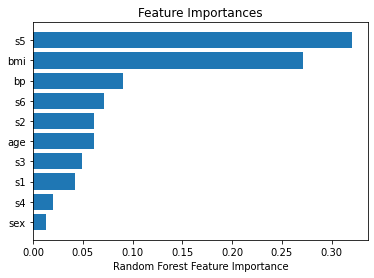

In [ ]:
  #IN RANDOM FOREST
  import pandas as pd  
  from sklearn.datasets import load_diabetes  
  from sklearn.ensemble import RandomForestRegressor
  import matplotlib.pyplot as plt 
  #fetch a regression dataset  #in diabetes data we predict diabetes progression  
  #after one year based on some features  
  data = load_diabetes()  
  X = data["data"]  
  col_names = data["feature_names"]  
  y = data["target"]  
  #initialize the model  
  model = RandomForestRegressor()  
  #fit the model  
  model.fit(X, y) 

importances = model.feature_importances_  
idxs = np.argsort(importances)  
plt.title('Feature Importances')  
plt.barh(range(len(idxs)), importances[idxs], align='center') 
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])  
plt.xlabel('Random Forest Feature Importance')  
plt.show()  

In [ ]:
import pandas as pd  
from sklearn.datasets import load_diabetes  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.feature_selection import SelectFromModel  
#fetch a regression dataset  
#in diabetes data we predict diabetes progression  
#after one year based on some features  
data = load_diabetes()  
X = data["data"]  
col_names = data["feature_names"] 
y = data["target"]  
 #initialize the model  
model = RandomForestRegressor()  
 #select from the model  
sfm = SelectFromModel(estimator=model)  
X_transformed = sfm.fit_transform(X, y)  
 #see which features were selected  
support = sfm.get_support()  
 #get feature names  
print([  x for x, y in zip(col_names, support) if y == True  ]) 

['bmi', 's5']


forest. One more thing that we are missing here is feature  selection using models that have L1 (Lasso) penalization. When we have L1  penalization for regularization, most coefficients will be 0 (or close to 0), and we  select the features with non-zero coefficients. You can do it by just replacing  random forest in the snippet of selection from a model with a model that supports  L1 penalty, e.g. lasso regression. All tree-based models provide feature importance  so all the model-based snippets shown in this chapter can be used for XGBoost,  LightGBM or CatBoost. The feature importance function names might be different  and may produce results in a different format, but the usage will remain the same.  In the end, you must be careful when doing feature selection. Select features on training data and validate the model on validation data for proper selection of  features without overfitting the model. 


** Hyperparameter optimization **

The parameters that the model  has here are known as hyper-parameters, i.e. the parameters that control the  training/fitting process of the model. If we train a linear regression with SGD,  parameters of a model are the slope and the bias and hyperparameter is learning  rate.

Let’s look at the random forest model from scikit-learn.  

RandomForestClassifier(  n_estimators=100, 
 criterion='gini', 
  max_depth=None,  
  min_samples_split=2,  
  min_samples_leaf=1,  
  min_weight_fraction_leaf=0.0, 
 max_features='auto', 
 max_leaf_nodes=None, 
 min_impurity_decrease=0.0,  
min_impurity_split=None,  bootstrap=True, 
 oob_score=False, 
  n_jobs=None, 
   random_state=None, 
  verbose=0,  
  warm_start=False, 
 class_weight=None,  
 ccp_alpha=0.0, 
  max_samples=None,  )  

There are nineteen parameters, and all the combinations of all these parameters for  all the values they can assume are going to be infinite. Normally, we don’t have the  resource and time to do this. Thus, we specify a grid of parameters. A search over  this grid to find the best combination of parameters is known as grid search. We  can say that n_estimators can be 100, 200, 250, 300, 400, 500; max_depth can be  1, 2, 5, 7, 11, 15 and criterion can be gini or entropy. These may not look like a lot  of parameters, but it would take a lot of time for computation if the dataset is too  large. We can make this grid search work by creating three for loops like before and calculating the score on the validation set. It must also be noted that if you have kfold cross-validation, you need even more loops which implies even more time to  find the perfect parameters. Grid search is therefore not very popular. 

In [ ]:
#rf_grid_search.py  
import numpy as np  
import pandas as pd  
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection  
if  __name__  ==  "__main__":  
  #read the training data  
  df = pd.read_csv("../input/mobile_train.csv")  
  #features are all columns without price_range  
  #note that there is no id column in this dataset 
  #here we have training features 
  X = df.drop("price_range", axis=1).values  
  #and the targets  
  y = df.price_range.values  
  #define the model here  
  #i am using random forest with n_jobs=-1  
  #n_jobs=-1 => use all cores  
  classifier = ensemble.RandomForestClassifier(n_jobs=-1)  
  #define a grid of parameters  
  #this can be a dictionary or a list of  #dictionaries  
  param_grid = {  "n_estimators": [100, 200, 250, 300, 400, 500],  "max_depth": [1, 2, 5, 7, 11, 15],  "criterion": ["gini", "entropy"]  }  
  #initialize grid search  
  #estimator is the model that we have defined  
  #param_grid is the grid of parameters  
  #we use accuracy as our metric. you can define your own  
  #higher value of verbose implies a lot of details are printed  
  #cv=5 means that we are using 5 fold cv (not stratified)  
  model = model_selection.GridSearchCV(  estimator=classifier,  param_grid=param_grid,  scoring="accuracy",  verbose=10,  n_jobs=1,  cv=5  )  
  #fit the model and extract best score  
  model.fit(X, y)  
  print(f"Best score: {model.best_score_}")  print("Best parameters set:")  
  best_parameters = model.best_estimator_.get_params()  
  for param_name in sorted(param_grid.keys()):  
    print(f"\t{param_name}: {best_parameters[param_name]}") 

In random search, we randomly select a combination of parameters and  calculate the cross-validation score. The time consumed here is less than grid search  because we do not evaluate over all different combinations of parameters. We  choose how many times we want to evaluate our models, and that’s what decides  how much time the search takes. The code is not very different from above. Except  for GridSearchCV, we use RandomizedSearchCV. 

In [ ]:
#rf_random_search.py  .  .  .  
if  __name__  ==  "__main__":  
  #define the model here  
  #i am using random forest with n_jobs=-1  
  #n_jobs=-1 => use all cores 
  classifier = ensemble.RandomForestClassifier(n_jobs=-1)  
  #define a grid of parameters  
  #this can be a dictionary or a list of  #dictionaries  
  param_grid = {  "n_estimators": np.arange(100, 1500, 100),  "max_depth": np.arange(1, 31),  "criterion": ["gini", "entropy"]  }  
  #initialize random search  
  #estimator is the model that we have defined  
  #param_distributions is the grid/distribution of parameters  
  #we use accuracy as our metric. you can define your own  #higher value of verbose implies a lot of details are printed 
   #cv=5 means that we are using 5 fold cv (not stratified) 
  #n_iter is the number of iterations we want  
  #if param_distributions has all the values as list,  
  #random search will be done by sampling without replacement  
  #if any of the parameters come from a distribution,  
  #random search uses sampling with replacement  
  model = model_selection.RandomizedSearchCV(  estimator=classifier,  param_distributions=param_grid,  n_iter=20,  scoring="accuracy",  verbose=10,  n_jobs=1,  cv=5  )  
  #fit the model and extract best score  
  model.fit(X, y)  
  print(f"Best score: {model.best_score_}")  
  print("Best parameters set:")  
  best_parameters = model.best_estimator_.get_params()  
  for param_name in sorted(param_grid.keys()):  
    print(f"\t{param_name}: {best_parameters[param_name]}") 

Random search is faster than grid search if the number of iterations is less. Using  these two, you can find the optimal (?) parameters for all kinds of models as long  as they have a fit and predict function, which is the standard of scikit-learn.  Sometimes, you might want to use a pipeline. For example, let’s say that we are  dealing with a multiclass classification problem. In this problem, the training data  consists of two text columns, and you are required to build a model to predict the  class. Let’s assume that the pipeline you choose is to first apply tf-idf in a semisupervised manner and then use SVD with SVM classifier. Now, the problem is we  have to select the components of SVD and also need to tune the parameters of SVM.  How to do this is shown in the following snippet. 

In [ ]:
#pipeline_search.py  
#The pipeline shown here has SVD (Singular Value Decomposition), standard  scaling and an SVM (Support Vector Machines) model.
import numpy as np  
import pandas as pd  
from sklearn import metrics  
from sklearn import model_selection  
from sklearn import pipeline  
from sklearn.decomposition 
import TruncatedSVD  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC  
def quadratic_weighted_kappa(y_true, y_pred):  
  """  Create a wrapper for cohen's kappa  with quadratic weights  """  
  return metrics.cohen_kappa_score(  y_true,  y_pred,  weights="quadratic"  )  

if  __name__  ==  '__main__':  
  #Load the training file 
  train = pd.read_csv('../input/train.csv')  
  #we dont need ID columns  
  idx = test.id.values.astype(int)  
  train = train.drop('id', axis=1)  
  test = test.drop('id', axis=1)  
  #create labels. drop useless columns  
  y = train.relevance.values  
  #do some lambda magic on text columns  
  traindata = list(  train.apply(lambda x:'%s %s'% (x['text1'], x['text2']),axis=1)  )  
  testdata = list(  test.apply(lambda x:'%s %s'% (x['text1'], x['text2']),axis=1)  )  
  #tfidf vectorizer  
  tfv = TfidfVectorizer(  min_df=3,  max_features=None,  strip_accents='unicode',  analyzer='word',  token_pattern=r'\w{1,}',  ngram_range=(1, 3),  use_idf=1,  smooth_idf=1,  sublinear_tf=1,  stop_words='english'  )  
  #Fit TFIDF  
  tfv.fit(traindata)  
  X = tfv.transform(traindata)  
  X_test = tfv.transform(testdata)  
  #Initialize SVD  
  svd = TruncatedSVD()  
  #Initialize the standard scaler  
  scl = StandardScaler()  
  #We will use SVM here..  
  svm_model = SVC()  
  #Create the pipeline
  clf = pipeline.Pipeline(  [  ('svd', svd),  ('scl', scl),  ('svm', svm_model)  ]  )  
  #Create a parameter grid to search for  
  #best parameters for everything in the pipeline  
  param_grid = {  'svd__n_components': [200, 300],  'svm__C': [10, 12]  }  
  #Kappa Scorer  
  kappa_scorer = metrics.make_scorer(  quadratic_weighted_kappa,  greater_is_better=True  )  
  #Initialize Grid Search Model  
  model = model_selection.GridSearchCV(  estimator=clf,  param_grid=param_grid,  scoring=kappa_scorer,  verbose=10,  n_jobs=-1,  refit=True,  cv=5  )  
  #Fit Grid Search Model  
  model.fit(X, y)  
  print("Best score: %0.3f"% model.best_score_)  
  print("Best parameters set:")  
  best_parameters = model.best_estimator_.get_params()  
  for param_name in sorted(param_grid.keys()):  
    print("\t%s: %r"% (param_name, best_parameters[param_name]))  
  #Get best model  
  best_model = model.best_estimator_  
  #Fit model with best parameters optimized for QWK  
  best_model.fit(X, y)  
  preds = best_model.predict(...) 

When we go into advanced hyperparameter optimization techniques, we can take a  look at minimization of functions using different kinds of minimization  algorithms. This can be achieved by using many minimization functions such as  downhill simplex algorithm, Nelder-Mead optimization, using a Bayesian  technique with Gaussian process for finding optimal parameters or by using a  genetic algorithm.First, let’s see how the gaussian  process can be used for hyper-parameter optimization. These kinds of algorithms  need a function they can optimize. Most of the time, it’s about the minimization of  this function, like we minimize loss.  So, let’s say, you want to find the best parameters for best accuracy and obviously,  the more the accuracy is better. Now we cannot minimize the accuracy, but we can  minimize it when we multiply it by -1. This way, we are minimizing the negative  of accuracy, but in fact, we are maximizing accuracy. Using Bayesian optimization  with gaussian process can be accomplished by using gp_minimize function from  scikit-optimize (skopt) library. Let’s take a look at how we can tune the parameters  of our random forest model using this function. 

In [ ]:
#rf_gp_minimize.py  
import numpy as np  
import pandas as pd  
from functools import partial  
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection  
from skopt import gp_minimize  
from skopt import space  
def optimize(params, param_names, x, y):  
  """  The main optimization function.  This function takes all the arguments from the search space  and training features and targets. It then initializes 
  the models by setting the chosen parameters and runs  cross-validation and returns a negative accuracy score  :param params: list of params from 4
  gp_minimize  :param param_names: list of param names. order is important!  
  :param x: training data  :param y: labels/targets  :return: negative accuracy after 5 folds  """ 

  #convert params to dictionary  
  params = dict(zip(param_names, params))  
  #initialize model with current parameters  
  model = ensemble.RandomForestClassifier(**params)  
  #initialize stratified k-fold  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #initialize accuracy list  
  accuracies = []  
  #loop over all folds  
  for idx in kf.split(X=x, y=y):  
    train_idx, test_idx = idx[0], idx[1]  
    xtrain = x[train_idx]  ytrain = y[train_idx]  
    xtest = x[test_idx]  ytest = y[test_idx]  
  #fit model for current fold  
  model.fit(xtrain, ytrain)  
  #create predictions  
  preds = model.predict(xtest)  
  #calculate and append accuracy  
  fold_accuracy = metrics.accuracy_score(  ytest,  preds  )  
  accuracies.append(fold_accuracy)  
  #return negative accuracy  
  return -1 * np.mean(accuracies) 

if  __name__  ==  "__main__": 
  #read the training data  
  df = pd.read_csv("../input/mobile_train.csv")  
  #features are all columns without price_range  
  #note that there is no id column in this dataset  
  #here we have training features  
  X = df.drop("price_range", axis=1).values  
  #and the targets  
  y = df.price_range.values  
  #define a parameter space  
  param_space = [  
    #max_depth is an integer between 3 and 10  
    space.Integer(3, 15, name="max_depth"),  
    #n_estimators is an integer between 50 and 1500  
    space.Integer(100, 1500, name="n_estimators"),  
    #criterion is a category. here we define list of categories  
    space.Categorical(["gini", "entropy"], name="criterion"),  
    #you can also have Real numbered space and define a  
    #distribution you want to pick it from  
    space.Real(0.01, 1, prior="uniform", name="max_features")  ]  
    #make a list of param names  
    #this has to be same order as the search space  
    #inside the main function  
    param_names = [  "max_depth",  "n_estimators",  "criterion",  "max_features"  ]  
    #by using functools partial, i am creating a  
    #new function which has same parameters as the  
    #optimize function except for the fact that  
    #only one param, i.e. the "params" parameter is  
    #required. this is how gp_minimize expects the  
    #optimization function to be. you can get rid of this  
    #by reading data inside the optimize function or by  
    #defining the optimize function here.  
    optimization_function = partial(  optimize,  param_names=param_names,x=X,y=Y)
    #now we call gp_minimize from scikit-optimize  
    #gp_minimize uses bayesian optimization for  
    #minimization of the optimization function.  
    #we need a space of parameters, the function itself,  
    #the number of calls/iterations we want to have  
    result = gp_minimize(  optimization_function,  dimensions=param_space,  n_calls=15,  n_random_starts=10,  verbose=10  )  
    #create best params dict and print it  
    best_params = dict(  zip(  param_names,  result.x  )  )  
    print(best_params) 

  from skopt.plots import plot_convergence  
  plot_convergence(result) 


**OUTPUT**


Iteration No: 14 started. Searching for the next optimal point.  Iteration No: 14 ended. Search finished for the next optimal point.  Time taken: 4.7793  Function value obtained: -0.9075  Current minimum: -0.9075  Iteration No: 15 started. Searching for the next optimal point.  Iteration No: 15 ended. Search finished for the next optimal point.  Time taken: 49.4186  Function value obtained: -0.9075  Current minimum: -0.9075  {'max_depth': 12, 'n_estimators': 100, 'criterion': 'entropy',  'max_features': 1.0}  



There are many libraries available that offer hyperparameter optimization. scikitoptimize is one such library that you can use. Another useful library for  hyperparameter optimization is hyperopt. hyperopt uses Tree-structured Parzen  Estimator (TPE) to find the most optimal parameters.

In [ ]:
#rf_hyperopt.py  
import numpy as np  
import pandas as pd  
from functools import partial  
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection  
from hyperopt import hp, fmin, tpe, Trials 
from hyperopt.pyll.base import scope  
def optimize(params, x, y):  
  """  The main optimization function.  This function takes all the arguments from the search space  and training features and targets. 
  It then initializes  the models by setting the chosen parameters and runs  cross-validation and returns a negative accuracy score  
  :param params: dict of params from hyperopt  :param x: training data  :param y: labels/targets  :return: negative accuracy after 5 folds  """  
  #initialize model with current parameters  
  model = ensemble.RandomForestClassifier(**params)  
  #initialize stratified k-fold  
  kf = model_selection.StratifiedKFold(n_splits=5)    
  
  #return negative accuracy  
  return -1 * np.mean(accuracies)  
if  __name__  ==  "__main__":  
  #read the training data  
  df = pd.read_csv("../input/mobile_train.csv")  
  #features are all columns without price_range  
  #note that there is no id column in this dataset  
  #here we have training features  
  X = df.drop("price_range", axis=1).values  
  #and the targets  
  y = df.price_range.values  
  #define a parameter space  
  #now we use hyperopt  
  param_space = {  
      #quniform gives round(uniform(low, high)/ q) * q  
      #we want int values for depth and estimators
      "max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),  "n_estimators": scope.int(  hp.quniform("n_estimators", 100, 1500, 1)  ),  
      #choice chooses from a list of values  
      "criterion": hp.choice("criterion", ["gini", "entropy"]),  
      #uniform chooses a value between two values  
      "max_features": hp.uniform("max_features", 0, 1)  }  
    
    #partial function  
    optimization_function = partial(  optimize,  x=X,  y=y  )  
    
    #initialize trials to keep logging information  
    trials = Trials()  
    #run hyperopt  
    hopt = fmin(  fn=optimization_function,  space=param_space,  algo=tpe.suggest,  max_evals=15,  trials=trials  )  
    print(hopt) 

As you can see, this is not very different from the previous code. You have to define  the parameter space in a different format, and you also need to change the actual  optimization part by using hyperopt instead of gp_minimize. The results are quite  good! 


❯ python rf_hyperopt.py  100%|██████████████████| 15/15 [04:38<00:00, 18.57s/trial, best loss: -  0.9095000000000001]  

{'criterion': 1, 'max_depth': 11.0, 'max_features': 0.821163568049807,  'n_estimators': 806.0}  



We get an accuracy which is a little better than before and a set of parameters that  we can use. Please note that criterion is 1 in the final result. This implies that choice  1 was selected, i.e., entropy. The ways of tuning hyperparameters described above  are the most common, and these will work with almost all models: linear regression,  logistic regression, tree-based methods, gradient boosting models such as xgboost,  lightgbm, and even neural networks! 

Although, these methods exist, to learn, one must start with tuning the hyperparameters manually, i.e., by hand. Hand tuning will help you learn the basics, for  example, in gradient boosting, when you increase the depth, you should reduce the  learning rate. It won’t be possible to learn this if you use automated tools. Refer to  the following table to know what to tune. RS* implies random search should be  better.  Once you get better with hand-tuning the parameters, you might not even need any  automated hyper-parameter tuning. When you create large models or introduce a  lot of features, you also make it susceptible to overfitting the training data.

 To avoid  overfitting, you need to introduce noise in training data features or penalize the cost  function. This penalization is called regularization and helps with generalizing the  model. In linear models, the most common types of regularizations are L1 and L2.  L1 is also known as Lasso regression and L2 as Ridge regression. When it comes  to neural networks, we use dropouts, the addition of augmentations, noise, etc. to  regularize our models. Using hyper-parameter optimization, you can also find the  correct penalty to use. 

**Approach to Image classification and segmentation**

Image is nothing  but a matrix of numbers. The computer cannot see the images as humans do. It only  looks at numbers, and that’s what the images are. A grayscale image is a twodimensional matrix with values ranging from 0 to 255. 0 is black, 255 is white and  in between you have all shades of grey. Previously, when there was no deep learning  (or when deep learning was not popular), people used to look at pixels. Each pixel  was a feature. You can do this easily in Python. Just read the grayscale image using  OpenCV or Python-PIL, convert to a numpy array and ravel (flatten) the matrix. If  you are dealing with RGB images, then you have three matrices instead of one. But  the idea remains the same. 



In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
#generate random numpy array with values from 0 to 255  
#and a size of 256x256  
random_image = np.random.randint(0, 256, (256, 256))  
#initialize plot  
plt.figure(figsize=(7, 7))  
#show grayscale image, nb: cmap, vmin and vmax  p
lt.imshow(random_image, cmap='gray', vmin=0, vmax=255)  
plt.show()  

The code above generates a random matrix using numpy. This matrix consists of  values ranging from 0 to 255 (included) and is of size 256x256 (also known as  pixels). 

As you can see that the ravelled version is nothing but a vector of size M, where M  = N * N. In this case, this vector is of the size 256 * 256 = 65536.  Now, if we go ahead and do it for all the images in our dataset, we have 65536  features for each sample. We can now quickly build a decision tree model or  random forest or SVM-based model on this data. The models will look at pixel  values and would try to separate positive samples from negative samples (in case  of a binary classification problem). 


All of you must have heard about the cats vs dogs problem. It's a classic one. But  let's try something different. If you remember, at the beginning of the chapter on  evaluation metrics, I introduced you to a dataset of pneumothorax images. So, let’s  try building a model to detect if an X-ray image of a lung has pneumothorax or not.  That is, a (not so) simple binary classification. 

The dataset  consists of 10675 unique images and 2379 have pneumothorax (note that these  numbers are after some cleaning of data and thus do not match original dataset). As  a data doctor would say: this is a classic case of skewed binary classification.  

Therefore, we choose the evaluation metric to be AUC and go for a stratified k-fold  cross-validation scheme.  You can flatten out the features and try some classical methods like SVM, RF for  doing classification, which is perfectly fine, but it won't get you anywhere near state  of the art. Also, the images are of size 1024x1024. It’s going to take a long time to  train a model on this dataset. For what it’s worth, let’s try building a simple random  forest model on this data. Since the images are grayscale, we do not need to do any  kind of conversion. We will resize the images to 256x256 to make them smaller and  use AUC as a metric

In [ ]:
import os  
import numpy as np  
import pandas as pd  
from PIL import Image  
from sklearn import ensemble  
from sklearn import metrics  
from sklearn import model_selection  
from tqdm import tqdm  

def create_dataset(training_df, image_dir):  
  """  This function takes the training dataframe  and outputs training array and labels  
  :param training_df: dataframe with ImageId, 
  Target columns  :param image_dir: location of images (folder), string  
  :return: X, y (training array with features and labels) 
  """
  #create empty list to store image vectors  
  images = []  
  #create empty list to store targets  
  targets = []  
  #loop over the dataframe  
  for index, row in tqdm(  training_df.iterrows(),  total=len(training_df),  desc="processing images"  ):  
    #get image id  
    image_id = row["ImageId"]  
    #create image path  
    image_path = os.path.join(image_dir, image_id)  
    #open image using PIL  
    image = Image.open(image_path + ".png")  
    #resize image to 256x256. we use bilinear resampling  
    image = image.resize((256, 256), resample=Image.BILINEAR)  
    #convert image to array  image = np.array(image)  
    #ravel  image = image.ravel()  
    #append images and targets lists  
    images.append(image)  
    targets.append(int(row["target"]))  
    #convert list of list of images to numpy array  
    images = np.array(images)  
    #print size of this array  
    print(images.shape)  
    return images, targets  
    
  if  __name__  ==  "__main__":  
    csv_path = "/home/abhishek/workspace/siim_png/train.csv"  
    image_path = "/home/abhishek/workspace/siim_png/train_png/"  
    #read CSV with imageid and target columns  
    df = pd.read_csv(csv_path)  
    #we create a new column called kfold and fill it with -1  
    df["kfold"] = -1  
    #the next step is to randomize the rows of the data  
    df = df.sample(frac=1).reset_index(drop=True)
    y = df.target.values  
    #initiate the kfold class from model_selection module  
    kf = model_selection.StratifiedKFold(n_splits=5)  
    #fill the new kfold column  
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):  
      df.loc[v_, 'kfold'] = f  
      #we go over the folds created  
    for fold_ in range(5):  
      #temporary dataframes for train and test  
      train_df = df[df.kfold != fold_].reset_index(drop=True)  
      test_df = df[df.kfold == fold_].reset_index(drop=True)  
      #create train dataset  
      #you can move this outside to save some computation time  
      xtrain, ytrain = create_dataset(train_df, image_path)  
      #create test dataset  
      #you can move this outside to save some computation time  
      xtest, ytest = create_dataset(test_df, image_path)  
      #fit random forest without any modification of params  
      clf = ensemble.RandomForestClassifier(n_jobs=-1)  
      clf.fit(xtrain, ytrain)  
      #predict probability of class 1  
      preds = clf.predict_proba(xtest)[:, 1]  
      #print results  
      print(f"FOLD: {fold_}")  
      print(f"AUC = {metrics.roc_auc_score(ytest, preds)}")  
      print("")  


is a basic deep convolutional neural network,  but it is the foundation of many new deep nets (deep neural networks). We see that  the network in figure 3 is a convolutional neural network with five convolution  layers, two dense layers and an output layer.
is a basic deep convolutional neural network,  but it is the foundation of many new deep nets (deep neural networks). We see that  the network in figure 3 is a convolutional neural network with five convolution  layers, two dense layers and an output layer.



terms: filter and strides. Filters are nothing but twodimensional matrices which are initialized by a given function. “He initialization” which is also known “Kaiming normal initialization” is a good choice for  convolutional neural networks. It is because most modern networks use ReLU  (Rectified Linear Units) activation function and proper initialization is required to  avoid the problem of vanishing gradients (when gradients approach zero and  weights of network do not change). This filter is convolved with the image.  Convolution is nothing but a summation of elementwise multiplication (crosscorrelation) between the filter and the pixels it is currently overlapping in a given  image.


Stride is a useful concept even in natural language processing, e.g. in question and  answering systems when you have to filter answer from a large text corpus. When  we are exhausted horizontally, we move the filter by the same stride downwards  vertically, starting from left again. Figure 4 also shows a filter going outside the  image. In these cases, it’s not possible to calculate the convolution. So, we skip it.  If you don’t want to skip it, you will need to pad the image. It must also be noted  that convolution will decrease the size of the image. Padding is also a way to keep  the size of the image the same.we have a 3x3 filter which is moving  with a stride of 1. Size of the original image is 6x6, and we have added padding of  1. The padding of 1 means increasing the size of the image by adding zero pixels  on each side once. In this case, the resulting image will be of the same size as the  input image, i.e. 6x6.

In dilation, we expand the filter by N-1, where N is the value of dilation rate or  simply known as dilation. In this kind of kernel with dilation, you skip some pixels  in each convolution. This is particularly effective in segmentation tasks. Please note  that we have only talked about 2-dimensional convolutions. There are 1-d  convolutions too and also in higher dimensions. All work on the same underlying  concept. 

Next comes max-pooling. Max pooling is nothing but a filter which returns max.  So, instead of convolution, we are extracting the max value of pixels. Similarly,  average pooling or mean-pooling returns mean of pixels. They are used in the  same way as the convolutional kernel. Pooling is faster than convolution and is a  way to down-sample the image. Max pooling detects edges and average pooling  smoothens the image. 


PyTorch provides an intuitive and easy way to implement deep  neural networks, and you don’t need to care about back-propagation. We define the  network in a python class and a forward function that tells PyTorch how the layers  are connected to each other. In PyTorch, the image notation is BS, C, H, W, where,  BS is the batch size, C channels, H is height and W is the width. Let’s see how  AlexNet is implemented in PyTorch. 

In [ ]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
class AlexNet(nn.Module):  
  def __init__(self):  super(AlexNet, self).__init__()  
    #convolution part  
    self.conv1 = nn.Conv2d(  in_channels=3,  out_channels=96,  kernel_size=11,  stride=4,  padding=0  )  
    self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)  
    self.conv2 = nn.Conv2d(  in_channels=96,  out_channels=256,  kernel_size=5,  stride=1,  padding=2  )  
    self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)  
    self.conv3 = nn.Conv2d(  in_channels=256,  out_channels=384,  kernel_size=3,  stride=1,  padding=1  )  
    self.conv4 = nn.Conv2d(in_channels=384,out_channels=384,  kernel_size=3, stride=1,padding=1)
    self.conv5 = nn.Conv2d(in_channels=384, out_channels=256,  kernel_size=3,  stride=1,  padding=1  )  
    self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)  
    #dense part  
    self.fc1 = nn.Linear(  in_features=9216,  out_features=4096  )  
    self.dropout1 = nn.Dropout(0.5)  
    self.fc2 = nn.Linear(  in_features=4096,  out_features=4096  )  
    self.dropout2 = nn.Dropout(0.5)  
    self.fc3 = nn.Linear(  in_features=4096,  out_features=1000  )  
  
  def forward(self, image):  
    #get the batch size, channels, height and width  
    #of the input batch of images  
    #original size: (bs, 3, 227, 227)  
    bs, c, h, w = image.size()  
    x = F.relu(self.conv1(image)) #size: (bs, 96, 55, 55)  
    x = self.pool1(x) #size: (bs, 96, 27, 27)  
    x = F.relu(self.conv2(x)) #size: (bs, 256, 27, 27)  
    x = self.pool2(x) #size: (bs, 256, 13, 13)  
    x = F.relu(self.conv3(x)) #size: (bs, 384, 13, 13)  
    x = F.relu(self.conv4(x)) #size: (bs, 384, 13, 13)  
    x = F.relu(self.conv5(x)) #size: (bs, 256, 13, 13)  
    x = self.pool3(x) #size: (bs, 256, 6, 6)  
    x = x.view(bs, -1) #size: (bs, 9216)  
    x = F.relu(self.fc1(x)) #size: (bs, 4096)  
    x = self.dropout1(x) #size: (bs, 4096)  
    #dropout does not change size  
    #dropout is used for regularization  
    #0.3 dropout means that only 70% of the nodes  
    #of the current layer are used for the next layer  
    x = F.relu(self.fc2(x)) #size: (bs, 4096)  
    x = self.dropout2(x) #size: (bs, 4096)  
    x = F.relu(self.fc3(x)) #size: (bs, 1000)  
    #1000 is number of classes in ImageNet Dataset  
    #softmax is an activation function that converts  
    #linear output to probabilities that add up to 1
    #for each sample in the batch  
    x = torch.softmax(x, axis=1) #size: (bs, 1000)  
    return x 


When you have a 3x227x227 image, and you apply a convolutional filter of size  11x11, it means that you are applying a filter of size 11x11x3 and convolving it  with an image of size 227x227x3. So, now, you need to think in 3 dimensions  instead of 2. The number of output channels is the number of different convolutional  filters of the same size applied to the image individually. So, in the first  convolutional layer, the input channels are 3, which is the original input, i.e. the R,  G, B channels. PyTorch’s torchvision offers many different models like AlexNet,  and it must be noted that this implementation of AlexNet is not the same as  torchvision’s. Torchvision’s implementation of AlexNet is a modified AlexNet  from another paper: Krizhevsky, A. One weird trick for parallelizing convolutional  neural networks. CoRR, abs/1404.5997, 2014.  


You can design your own convolutional neural networks for your task, and many  times it is a good idea to start from something on your own. Let’s build a network  to classify images from our initial dataset of this chapter into categories of having  pneumothorax or not. But first, let’s prepare some files. The first step would be to  create a folds file, i.e. train.csv but with a new column kfold. We will create five  folds. Since I have shown how to do this for different datasets in this book, I will  skip this part and leave it an exercise for you. For PyTorch based neural networks,  we need to create a dataset class. The objective of the dataset class is to return an  item or sample of data. This sample of data should consist of everything you need  in order to train or evaluate your model. 

In [ ]:
#dataset.py  
import torch  
import numpy as np  
from PIL import Image  
from PIL import ImageFile  
#sometimes, you will have images without an ending bit  
#this takes care of those kind of (corrupt) images  
ImageFile.LOAD_TRUNCATED_IMAGES = True  

class ClassificationDataset:
  """  A general classification dataset class that you can use for all  kinds of image classification problems. 
  For example,  binary classification, multi-class, multi-label classification  """  
  
  def __init__(  self,  image_paths,  targets,  resize=None,  augmentations=None  ):  
    """  :param image_paths: list of path to images  
    :param targets: numpy array  
    :param resize: tuple, e.g. (256, 256), resizes image 
    if not None  :param augmentations: albumentation augmentations  """  
    self.image_paths = image_paths  
    self.targets = targets  
    self.resize = resize  
    self.augmentations = augmentations  
  def __len__(self):  
    """  Return the total number of samples in the dataset  """  
    return len(self.image_paths)  
  def __getitem__(self, item):  
    """  For a given "item" index, return everything we need  to train a given model  """  
    #use PIL to open the image  
    image = Image.open(self.image_paths[item])  
    #convert image to RGB, we have single channel images  
    image = image.convert("RGB")  
    #grab correct targets  
    targets = self.targets[item]  
    #resize if needed  
    if self.resize is not None:  
      image = image.resize(  (self.resize[1], self.resize[0]),  resample=Image.BILINEAR  )
      #convert image to numpy array  
      image = np.array(image)  
      #if we have albumentation augmentations  
      #add them to the image  
    if self.augmentations is not None:  
      augmented = self.augmentations(image=image)  
      image = augmented["image"]  
    #pytorch expects CHW instead of HWC  
    image = np.transpose(image, (2, 0, 1)).astype(np.float32)  
    #return tensors of image and targets  
    #take a look at the types!  
    #for regression tasks,  
    #dtype of targets will change to torch.float  
    return {  "image": torch.tensor(image, dtype=torch.float),  
            "targets": torch.tensor(targets, dtype=torch.long),  }   

In [ ]:
#engine.py  
import torch  
import torch.nn as nn  
from tqdm import tqdm  
def train(data_loader, model, optimizer, device):  
  """  This function does training for one epoch  
  :param data_loader: this is the pytorch dataloader  
  :param model: pytorch model  :param optimizer: optimizer, for e.g. adam, sgd, etc  
  :param device: cuda/cpu  """  
  #put the model in train mode  
  model.train()  
  #go over every batch of data in data loader  
  for data in data_loader:
    #remember, we have image and targets  
    #in our dataset class  
    inputs = data["image"]  
    targets = data["targets"] 
  #move inputs/targets to cuda/cpu device  
  inputs = inputs.to(device, dtype=torch.float)  
  targets = targets.to(device, dtype=torch.float)  
  #zero grad the optimizer  
  optimizer.zero_grad()  
  #do the forward step of model  
  outputs = model(inputs)  
  #calculate loss  
  loss = nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1))  
  #backward step the loss  
  loss.backward()  
  #step optimizer  
  optimizer.step()  
  #if you have a scheduler, you either need to  
  #step it here or you have to step it after  
  #the epoch. here, we are not using any learning  
  #rate scheduler  
  def evaluate(data_loader, model, device):  
    """  
    This function does evaluation for one epoch  
    :param data_loader: this is the pytorch dataloader  
    :param model: pytorch model  :param device: cuda/cpu  """  
    
    #put model in evaluation mode  
    model.eval()  
    #init lists to store targets and outputs  
    final_targets = []  
    final_outputs = []  
    #we use no_grad context  
    with torch.no_grad():  
      for data in data_loader:  
        inputs = data["image"]  
        targets = data["targets"]  
        inputs = inputs.to(device, dtype=torch.float)  
        targets = targets.to(device, dtype=torch.float)
        #do the forward step to generate prediction  
        output = model(inputs)  
        #convert targets and outputs to lists  
        targets = targets.detach().cpu().numpy().tolist()  
        output = output.detach().cpu().numpy().tolist()  
        #extend the original list  
        final_targets.extend(targets)  
        final_outputs.extend(output)  
    #return final output and final targets  
    return final_outputs, final_targets 

Once we have engine.py, we are ready to create a new file: model.py. model.py will  consist of our model. It’s a good idea to keep it separate because that allows us to  easily experiment with different models and different architectures. A PyTorch  library called pretrainedmodels has a lot of different model architectures, such as  AlexNet, ResNet, DenseNet, etc. There are different model architectures which  have been trained on large image dataset called ImageNet. We can use them with  their weights after training on ImageNet, and we can also use them without these  weights. If we train without the ImageNet weights, it means our network is learning  everything from scratch.

In [ ]:
#model.py  
#ALexnet
import torch.nn as nn  
import pretrainedmodels  
def get_model(pretrained):  
  if pretrained:  
    model = pretrainedmodels.__dict__["alexnet"]
    (  pretrained='imagenet'  )  
  else:  
    model = pretrainedmodels.__dict__["alexnet"]
    (  pretrained=None  )  
  #print the model here to know whats going on.  
  model.last_linear = nn.Sequential(  nn.BatchNorm1d(4096),  nn.Dropout(p=0.25),  nn.Linear(in_features=4096, out_features=2048), 
                                    nn.ReLU(),  nn.BatchNorm1d(2048, eps=1e-05, momentum=0.1),  nn.Dropout(p=0.5),  nn.Linear(in_features=2048, out_features=1),)  
  return model

 

In [ ]:
#train.py  
import os  
import pandas as pd  
import numpy as np  
import albumentations  
import torch  
from sklearn import metrics  
from sklearn.model_selection 
import train_test_split  
import dataset  
import engine  
from model import get_model  
if  __name__  ==  "__main__":  
  #location of train.csv and train_png folder  
  #with all the png images  
  data_path = "/home/abhishek/workspace/siim_png/"  
  #cuda/cpu device  
  device = "cuda"  
  #let's train for 10 epochs  
  epochs = 10  
  #load the dataframe  
  df = pd.read_csv(os.path.join(data_path, "train.csv"))  
  #fetch all image ids  
  images = df.ImageId.values.tolist() 

  #a list with image locations  
  images = [  os.path.join(data_path, "train_png", i + ".png") for i in images  ]  
  #binary targets numpy array  
  targets = df.target.values  
  #fetch out model, we will try both pretrained  
  #and non-pretrained weights  
  model = get_model(pretrained=True)  
  #move model to device  
  model.to(device)  
  #mean and std values of RGB channels for imagenet dataset  
  #we use these pre-calculated values when we use weights  
  #from imagenet.  
  #when we do not use imagenet weights, we use the mean and  
  #standard deviation values of the original dataset  
  #please note that this is a separate calculation  
  mean = (0.485, 0.456, 0.406)  
  std = (0.229, 0.224, 0.225)  
  #albumentations is an image augmentation library  
  #that allows you to do many different types of image  
  #augmentations. here, i am using only normalization  
  #notice always_apply=True. we always want to apply  
  #normalization  
  aug = albumentations.Compose(  [  albumentations.Normalize(  mean, std, max_pixel_value=255.0, always_apply=True  )  ]  )  
  
  #instead of using kfold, i am using train_test_split  
  #with a fixed random state  
  train_images, valid_images, train_targets, valid_targets =  train_test_split(  images, targets, stratify=targets, random_state=42  )  
  #fetch the ClassificationDataset class  
  train_dataset = dataset.ClassificationDataset(  image_paths=train_images,targets=train_targets,  resize=(227, 227),  augmentations=aug,  )  
  #torch dataloader creates batches of data  
  #from classification dataset class  
  train_loader = torch.utils.data.DataLoader(  train_dataset, batch_size=16, shuffle=True, num_workers=4  )  
  #same for validation data  
  valid_dataset = dataset.ClassificationDataset(  image_paths=valid_images,  targets=valid_targets,  resize=(227, 227),  augmentations=aug,  )  
  valid_loader = torch.utils.data.DataLoader(  valid_dataset, batch_size=16, shuffle=False, num_workers=4  )  
  #simple Adam optimizer  
  optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)  
  #train and print auc score 
  for all epochs  for epoch in range(epochs):  
    engine.train(train_loader, model, optimizer, device=device)  
    predictions, valid_targets = engine.evaluate(  valid_loader, model, device=device  )  
    roc_auc = metrics.roc_auc_score(valid_targets, predictions)  
    print(  f"Epoch={epoch}, Valid ROC AUC={roc_auc}"  ) 
    

The good thing about  pretrained models is that we can try many different models easily. Let’s try  resnet18 with pretrained weights.  

In [ ]:
#model.py  
import torch.nn as nn  
import pretrainedmodels  
def get_model(pretrained):  
  if pretrained:  
    model = pretrainedmodels.__dict__["resnet18"](  pretrained='imagenet'  )  
  else:  
    model = pretrainedmodels.__dict__["resnet18"](  pretrained=None  )  
  #print the model here to know whats going on.  
  model.last_linear = nn.Sequential(  nn.BatchNorm1d(512),  nn.Dropout(p=0.25),  nn.Linear(in_features=512, out_features=2048),
                                    nn.ReLU(),  nn.BatchNorm1d(2048, eps=1e-05, momentum=0.1),  nn.Dropout(p=0.5),  nn.Linear(in_features=2048, out_features=1),  )  
  return model  

This model seems to perform the best. However, you might be able to tune the  different parameters and image size in AlexNet to get a better score. Using  augmentations will improve the score further. Optimising deep neural networks is  difficult but not impossible. Choose Adam optimizer, use a low learning rate,  reduce learning rate on a plateau of validation loss, try some augmentations, try  preprocessing the images (e.g. cropping if needed, this can also be considered preprocessing), change the batch size, etc. There’s a lot that you can do to optimize  your deep neural network. 


This model seems to perform the best. However, you might be able to tune the  different parameters and image size in AlexNet to get a better score. Using  augmentations will improve the score further. Optimising deep neural networks is  difficult but not impossible. Choose Adam optimizer, use a low learning rate,  reduce learning rate on a plateau of validation loss, try some augmentations, try  preprocessing the images (e.g. cropping if needed, this can also be considered preprocessing), change the batch size, etc. There’s a lot that you can do to optimize  your deep neural network.  ResNet is an architecture much more complicated compared to AlexNet. ResNet  stands for Residual Neural Network and was introduced by K. He, X. Zhang, S. Ren  and J. Sun in the paper, deep residual learning for image recognition, in 2015.  ResNet consists of residual blocks that transfer the knowledge from one layer to  further layers by skipping some layers in between. These kinds of connections of  layers are known as skip-connections since we are skipping one or more layers.  Skip-connections help with the vanishing gradient issue by propagating the  gradients to further layers. This allows us to train very large convolutional neural  networks without loss of performance.Usually, the training loss increases at a given point if we are using a large neural network, but that can be prevented by using  skip-connections.

A residual block is quite simple to understand. You take the output from a layer,  skip some layers and add that output to a layer further in the network. The dotted  lines mean that the input shape needs to be adjusted as max-pooling is being used  and use of max-pooling changes the size of the output. 

 ResNet comes in many different variations: 18, 34, 50, 101 and 152 layers and all  of them are available with weights pre-trained on ImageNet dataset. These days  pretrained models work for (almost) everything but make sure that you start with  smaller models, for example, begin with resnet-18 rather than resnet-50. Some other  ImageNet pre-trained models include:  
- Inception  
- DenseNet (different variations) 
- NASNet  
- PNASNet 
- VGG  
- Xception  
- ResNeXt  
- EfficientNet, etc. 

Segmentation is a task which is quite popular in computer vision. In a segmentation  task, we try to remove/extract foreground from background. Foreground and background can have different definitions. We can also say that it is a pixel-wise  classification task in which your job is to assign a class to each pixel in a given  image. The pneumothorax dataset that we are working on is, in fact, a segmentation  task. In this task, given the chest radiographic images, we are required to segment  pneumothorax. The most popular model used for segmentation tasks is U-Net.


background can have different definitions. We can also say that it is a pixel-wise  classification task in which your job is to assign a class to each pixel in a given  image. The pneumothorax dataset that we are working on is, in fact, a segmentation  task. In this task, given the chest radiographic images, we are required to segment  pneumothorax. The most popular model used for segmentation tasks is U-Net.



In [ ]:
#simple_unet.py  
import torch  
import torch.nn as nn  
from torch.nn import functional as F  
def double_conv(in_channels, out_channels):  
  """  This function applies two convolutional layers  each followed by a ReLU activation function  
  :param in_channels: number of input channels  :param out_channels: number of output channels  
  :return: a down-conv layer  """  
  conv = nn.Sequential(  nn.Conv2d(in_channels, out_channels, kernel_size=3),  
                       nn.ReLU(inplace=True),  nn.Conv2d(out_channels, out_channels, kernel_size=3),  nn.ReLU(inplace=True)  )  
  return conv  
def crop_tensor(tensor, target_tensor):
  """  Center crops a tensor to size of a given target tensor size  Please note that this function is applicable only to  this 
  implementation of unet. There are a few assumptions  in this implementation that might not be applicable to all  networks 
  and all other use-cases.  Both tensors are of shape (bs, c, h, w)  :param tensor: a tensor that needs to be cropped  
  :param target_tensor: target tensor of smaller size  :return: cropped tensor  """  
  target_size = target_tensor.size()[2]  
  tensor_size = tensor.size()[2]  
  delta = tensor_size - target_size  
  delta = delta// 2  
  return tensor[  :,  :,  delta:tensor_size - delta,  delta:tensor_size - delta  ]  
  
class UNet(nn.Module):  
  def __init__(self):  
    super(UNet, self).__init__()  
    
    #we need only one max_pool as it is not learned  
    self.max_pool_2x2 = nn.MaxPool2d(kernel_size=2, stride=2)  
    self.down_conv_1 = double_conv(1, 64)  
    self.down_conv_2 = double_conv(64, 128)  
    self.down_conv_3 = double_conv(128, 256)  
    self.down_conv_4 = double_conv(256, 512)  
    self.down_conv_5 = double_conv(512, 1024)  
    self.up_trans_1 = nn.ConvTranspose2d(  in_channels=1024,  out_channels=512,  kernel_size=2,  stride=2  )  
    self.up_conv_1 = double_conv(1024, 512)  
    self.up_trans_2 = nn.ConvTranspose2d(  in_channels=512,  out_channels=256,kernel_size=2,  stride=2  )  
    self.up_conv_2 = double_conv(512, 256)  
    self.up_trans_3 = nn.ConvTranspose2d(  in_channels=256,  out_channels=128,  kernel_size=2,  stride=2  )  
    self.up_conv_3 = double_conv(256, 128)  
    self.up_trans_4 = nn.ConvTranspose2d(  in_channels=128,  out_channels=64,  kernel_size=2,  stride=2  )  
    self.up_conv_4 = double_conv(128, 64)  
    self.out = nn.Conv2d(  in_channels=64,  out_channels=2,  kernel_size=1  )  
    
  def forward(self, image):  
    #encoder  
    x1 = self.down_conv_1(image)  
    x2 = self.max_pool_2x2(x1)  
    x3 = self.down_conv_2(x2)  
    x4 = self.max_pool_2x2(x3)  
    x5 = self.down_conv_3(x4)  
    x6 = self.max_pool_2x2(x5)  
    x7 = self.down_conv_4(x6)  
    x8 = self.max_pool_2x2(x7)  
    x9 = self.down_conv_5(x8)  
    #decoder  
    x = self.up_trans_1(x9)  
    y = crop_tensor(x7, x)  
    x = self.up_conv_1(torch.cat([x, y], axis=1))  
    x = self.up_trans_2(x)  
    y = crop_tensor(x5, x)  
    x = self.up_conv_2(torch.cat([x, y], axis=1))  
    x = self.up_trans_3(x)
    y = crop_tensor(x3, x)  
    x = self.up_conv_3(torch.cat([x, y], axis=1))  
    x = self.up_trans_4(x)  
    y = crop_tensor(x1, x)  
    x = self.up_conv_4(torch.cat([x, y], axis=1))  
    #output layer  out = self.out(x)  
    return out  
    
if  __name__  ==  "__main__":  
  image = torch.rand((1, 1, 572, 572))  
  model = UNet()  
  print(model(image))    

We see that the encoder part of the U-Net is a nothing but a simple convolutional  network. We can, thus, replace this with any network such as ResNet. The  replacement can also be done with pretrained weights. Thus, we can use a ResNet  based encoder which is pretrained on ImageNet and a generic decoder. In place of  ResNet, many different network architectures can be used. Segmentation Models  Pytorch12 by Pavel Yakubovskiy is an implementation of many such variations  where an encoder can be replaced by a pretrained model. Let’s apply a ResNet based  U-Net for pneumothorax detection problem.  Most of the problems like this should have two inputs: the original image and a  mask. In the case of multiple objects, there will be multiple masks. In our  pneumothorax dataset, we are provided with RLE instead. RLE stands for run- length encoding and is a way to represent binary masks to save space.

#Need to go more into RLE: A topic for disucssion

In [ ]:
#dataset.py  
import os  
import glob  
import torch  
import numpy as np  
import pandas as pd  
from PIL import Image, ImageFile  
from tqdm import tqdm  
from collections import defaultdict  
from torchvision import transforms  
from albumentations import (  
    Compose,  OneOf,  RandomBrightnessContrast,  RandomGamma,  ShiftScaleRotate,  )  
ImageFile.LOAD_TRUNCATED_IMAGES = True  
class SIIMDataset(torch.utils.data.Dataset):  
  def __init__(  self,  image_ids,  transform=True,  preprocessing_fn=None  ): 
     """  Dataset class for segmentation problem  :param image_ids: ids of the images, list  :param transform: True/False, no transform in validation  
     :param preprocessing_fn: a function for preprocessing image  """ 
     #we create a empty dictionary to store image  
     #and mask paths  
     self.data = defaultdict(dict)  
     #for augmentations  
     self.transform = transform  
     #preprocessing function to normalize  
     #images  
     self.preprocessing_fn = preprocessing_fn  
     #albumentation augmentations  
     #we have shift, scale & rotate  
     #applied with 80% probability  
     #and then one of gamma and brightness/contrast  
     #is applied to the image  
     #albumentation takes care of which augmentation  
     #is applied to image and mask  
     self.aug = Compose(  [  ShiftScaleRotate(  
         shift_limit=0.0625,  scale_limit=0.1,  
         rotate_limit=10, p=0.8  ),  
         OneOf(  [  RandomGamma(  gamma_limit=(90, 110)  ),  
                  RandomBrightnessContrast(  brightness_limit=0.1,  contrast_limit=0.1  ),  ],  
               p=0.5,  ),  ]  )  
     #going over all image_ids to store  
     #image and mask paths  
     for imgid in image_ids:  
       files = glob.glob(os.path.join(TRAIN_PATH, imgid, "*.png"))  
       self.data[counter] = {  "img_path": os.path.join(  TRAIN_PATH, imgid + ".png" 
                                                        ),  "mask_path": os.path.join(  TRAIN_PATH, imgid + "_mask.png"  ),  }  
  def __len__(self):  
    #return length of dataset  
    return len(self.data)  
  def __getitem__(self, item):  
    #for a given item index,  
    #return image and mask tensors  
    #read image and mask paths  
    img_path = self.data[item]["img_path"]  
    mask_path = self.data[item]["mask_path"]  
    #read image and convert to RGB  
    img = Image.open(img_path)  
    img = img.convert("RGB")  
    #PIL image to numpy array  
    img = np.array(img)  
    #read mask image  
    mask = Image.open(mask_path)  
    #convert to binary float matrix  
    mask = (mask >= 1).astype("float32")  
    #if this is training data, apply transforms  
    if self.transform is True:  
      augmented = self.aug(image=img, mask=mask)  
      img = augmented["image"]  
      mask = augmented["mask"]  
    #preprocess the image using provided  
    #preprocessing tensors. this is basically  
    #image normalization  
    img = self.preprocessing_fn(img)  
    #return image and mask tensors  
    return {  "image": transforms.ToTensor()(img),  "mask": transforms.ToTensor()(mask).float(),  } 
                                                        

In [ ]:
#train.py  
import os  
import sys  
import torch  
import numpy as np  
import pandas as pd  
import segmentation_models_pytorch as smp  
import torch.nn as nn  
import torch.optim as optim  
from apex import amp  
from collections import OrderedDict  
from sklearn import model_selection  
from tqdm import tqdm  
from torch.optim import lr_scheduler  
from dataset import SIIMDataset  
#training csv file path  
TRAINING_CSV = "../input/train_pneumothorax.csv"  
#training and test batch sizes  
TRAINING_BATCH_SIZE = 16  
TEST_BATCH_SIZE = 4  
#number of epochs  
EPOCHS = 10  
#define the encoder for U-Net  
#check: https://github.com/qubvel/segmentation_models.pytorch  
#for all supported encoders  
ENCODER = "resnet18"  
#we use imagenet pretrained weights for the encoder  
ENCODER_WEIGHTS = "imagenet" 
#train on gpu  
DEVICE = "cuda"  
def train(dataset, data_loader, model, criterion, optimizer):  
  """  training function that trains for one epoch  
  :param dataset: dataset class (SIIMDataset) 
  :param data_loader: torch dataset loader  
  :param model: model  
  :param criterion: loss function  
  :param optimizer: adam, sgd, etc.  """  
  #put the model in train mode  
  model.train()  
  #calculate number of batches  
  num_batches = int(len(dataset)/ data_loader.batch_size)  
  #init tqdm to track progress  
  tk0 = tqdm(data_loader, total=num_batches)  
  #loop over all batches  
  for d in tk0:  
    #fetch input images and masks  
    #from dataset batch  
    inputs = d["image"]  
    targets = d["mask"]  
    #move images and masks to cpu/gpu device  
    inputs = inputs.to(DEVICE, dtype=torch.float)  
    targets = targets.to(DEVICE, dtype=torch.float)  
    #zero grad the optimizer  
    optimizer.zero_grad()  
    #forward step of model  
    outputs = model(inputs)  
    #calculate loss  
    loss = criterion(outputs, targets)  
    #backward loss is calculated on a scaled loss  
    #context since we are using mixed precision training  
    #if you are not using mixed precision training, 
     #you can use loss.backward() and delete the following  
     #two lines of code  
     with amp.scale_loss(loss, optimizer) as scaled_loss:  
       scaled_loss.backward()  
     #step the optimizer  optimizer.step()  
     #close tqdm  
     tk0.close() 

In [ ]:
def evaluate(dataset, data_loader, model):  
  """  evaluation function to calculate loss on validation  set for one epoch  
  :param dataset: dataset class (SIIMDataset)  
  :param data_loader: torch dataset loader  
  :param model: model  """  
  #put model in eval mode  
  model.eval()  
  #init final_loss to 0  
  final_loss = 0  
  #calculate number of batches and init tqdm  
  num_batches = int(len(dataset)/ data_loader.batch_size)  
  tk0 = tqdm(data_loader, total=num_batches)  
  #we need no_grad context of torch. this save memory  
  with torch.no_grad():  
    for d in tk0:  
      inputs = d["image"]  
      targets = d["mask"]  
      inputs = inputs.to(DEVICE, dtype=torch.float)  
      targets = targets.to(DEVICE, dtype=torch.float)  
      output = model(inputs)  
      loss = criterion(output, targets)  
      #add loss to final loss  
      final_loss += loss  
  #close tqdm  
  tk0.close()  
  #return average loss over all batches  
  return final_loss/ num_batches  
  
  if  __name__  ==  "__main__": 
     #read the training csv file  
     df = pd.read_csv(TRAINING_CSV)  
     #split data into training and validation  
     df_train, df_valid = model_selection.train_test_split(  df, random_state=42, test_size=0.1  )  
     #training and validation images lists/arrays  
     training_images = df_train.image_id.values  
     validation_images = df_valid.image_id.values

     #fetch unet model from segmentation models  
     #with specified encoder architecture  
     model = smp.Unet(  encoder_name=ENCODER,  encoder_weights=ENCODER_WEIGHTS,  classes=1,  activation=None,  )  
     #segmentation model provides you with a preprocessing  
     #function that can be used for normalizing images  
     #normalization is only applied on images and not masks  
     prep_fn = smp.encoders.get_preprocessing_fn(  ENCODER,  ENCODER_WEIGHTS  )  
     #send model to device  
     model.to(DEVICE)  
     #init training dataset  
     #transform is True for training data  
     train_dataset = SIIMDataset(  training_images,  transform=True,  preprocessing_fn=prep_fn,  )  
     #wrap training dataset in torch's dataloader  
     train_loader = torch.utils.data.DataLoader(  train_dataset,  batch_size=TRAINING_BATCH_SIZE,  shuffle=True,  num_workers=12  )  
     #init validation dataset  
     #augmentations is disabled  
     valid_dataset = SIIMDataset(  validation_images,  transform=False,  preprocessing_fn=prep_fn,  )  
     #wrap validation dataset in torch's dataloader  
     valid_loader = torch.utils.data.DataLoader(  valid_dataset,  batch_size=TEST_BATCH_SIZE,  shuffle=True,  num_workers=4  )  
     #NOTE: define the criterion here  
     #this is left as an excercise  
     #code won't work without defining this  
     #criterion =  ……  
     
     #we will use Adam optimizer for faster convergence  
     optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  
     #reduce learning rate when we reach a plateau on loss  
     scheduler = lr_scheduler.ReduceLROnPlateau(  optimizer, mode="min", patience=3, verbose=True  )  
     #wrap model and optimizer with NVIDIA's apex  
     #this is used for mixed precision training  
     #if you have a GPU that supports mixed precision,  
     #this is very helpful as it will allow us to fit larger images  
     #and larger batches  
     model, optimizer = amp.initialize(  model, optimizer, opt_level="O1", verbosity=0  )  
     #if we have more than one GPU, we can use both of them!  
     if torch.cuda.device_count() > 1:  
       print(f"Let's use {torch.cuda.device_count()} GPUs!")  
       model = nn.DataParallel(model)  
      #some logging  
      print(f"Training batch size: {TRAINING_BATCH_SIZE}")  
      print(f"Test batch size: {TEST_BATCH_SIZE}")  
      print(f"Epochs: {EPOCHS}")  
      print(f"Image size: {IMAGE_SIZE}")  
      print(f"Number of training images: {len(train_dataset)}")  
      print(f"Number of validation images: {len(valid_dataset)}")  
      print(f"Encoder: {ENCODER}")  
      #loop over all epochs  
      for epoch in range(EPOCHS):  
        print(f"Training Epoch: {epoch}")  
      #train for one epoch  
        train(  train_dataset,  train_loader,  model,  criterion,  optimizer )
        print(f"Validation Epoch: {epoch}")  
        #calculate validation loss  
        val_log = evaluate(  valid_dataset,  valid_loader,  model  )  
        #step the scheduler  
        scheduler.step(val_log["loss"])  
        print("\n") 

In segmentation problems you can use a variety of loss functions, for example,  pixel-wise binary cross-entropy, focal loss, dice loss etc. I’m leaving it for the  reader to decide the appropriate loss given the evaluation metric. When you train a  model like this, you will create a model that tries to predict the location of  pneumothorax, as shown in figure 9. In the above code, we used mixed precision  training using NVIDIA apex. Please note that this is available natively in PyTorch  from version 1.6.0+. 
of the commonly used functions in a python package called  Well That’s Fantastic Machine Learning (WTFML). Let’s see how this helps us to  build a multi-class classification model for plant images from the plant pathology  challenge of FGVC 202013. 

In [ ]:
import os  
import pandas as pd  
import numpy as np  
import albumentations  
import argparse  
import torch  
import torchvision  
import torch.nn as nn  
import torch.nn.functional as F  
from sklearn import metrics  
from sklearn.model_selection import train_test_split  
from wtfml.engine import Engine  
from wtfml.data_loaders.image import ClassificationDataLoader  
class DenseCrossEntropy(nn.Module):  
  #Taken from:  #https://www.kaggle.com/pestipeti/plant-pathology-2020-pytorch  
  def __init__(self):  
    super(DenseCrossEntropy, self).__init__()  
  def forward(self, logits, labels):  
    logits = logits.float()  labels = labels.float()  
    logprobs = F.log_softmax(logits, dim=-1)  
    loss = -labels * logprobs  loss = loss.sum(-1)  
    return loss.mean()  
class Model(nn.Module):  
  def __init__(self):  
    super().__init__()  
    self.base_model = torchvision.models.resnet18(pretrained=True)  
    in_features = self.base_model.fc.in_features  
    self.out = nn.Linear(in_features, 4)  
  def forward(self, image, targets=None):  
    batch_size, C, H, W = image.shape
    x = self.base_model.conv1(image)  
    x = self.base_model.bn1(x)  
    x = self.base_model.relu(x)  
    x = self.base_model.maxpool(x)  
    x = self.base_model.layer1(x)  
    x = self.base_model.layer2(x)  
    x = self.base_model.layer3(x)  
    x = self.base_model.layer4(x)  
    x = F.adaptive_avg_pool2d(x, 1).reshape(batch_size, -1)  
    x = self.out(x)  
    loss = None  
    if targets is not None:  
      loss = DenseCrossEntropy()(x, targets.type_as(x))  
    return x, loss  
    
if  __name__  ==  "__main__":  
  parser = argparse.ArgumentParser()  
  parser.add_argument(  "--data_path", type=str,  )  
  parser.add_argument(  "--device", type=str,  )  
  parser.add_argument(  "--epochs", type=int,  )  
  args = parser.parse_args()  
  df = pd.read_csv(os.path.join(args.data_path, "train.csv"))  
  images = df.image_id.values.tolist()  
  images = [  os.path.join(args.data_path, "images", i + ".jpg")  for i in images  ]  
  targets = df[["healthy", "multiple_diseases", "rust", "scab"]].values  
  model = Model()  
  model.to(args.device)  
  mean = (0.485, 0.456, 0.406)  
  std = (0.229, 0.224, 0.225)
  aug = albumentations.Compose(  [  albumentations.Normalize(  mean,  std,  max_pixel_value=255.0,  always_apply=True  )  ]  )  
  (  train_images, valid_images,  train_targets, valid_targets  ) = train_test_split(images, targets)  
  
  train_loader = ClassificationDataLoader(  image_paths=train_images,  targets=train_targets,  resize=(128, 128),  augmentations=aug,  )
  .fetch(  batch_size=16,  num_workers=4,  drop_last=False,  shuffle=True,  tpu=False  )  
  
  valid_loader = ClassificationDataLoader(  image_paths=valid_images,  targets=valid_targets,  resize=(128, 128),  augmentations=aug,  )
  .fetch(  batch_size=16,  num_workers=4,  drop_last=False,  shuffle=False,  tpu=False  )  
  
  optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)  
  scheduler = torch.optim.lr_scheduler.StepLR(  optimizer, step_size=15, gamma=0.6  )

  for epoch in range(args.epochs):  
    train_loss = Engine.train(  train_loader, model, optimizer, device=args.device  )  
    valid_loss = Engine.evaluate(  valid_loader, model, device=args.device  )  
    print(  f"{epoch}, Train Loss={train_loss} Valid Loss={valid_loss}"  )    

#NATURAL LANGUAGE PROCESSING


You can have a simple counter that counts the number of positive and negative  words in the sentence. If the number of positive words is higher, it is a positive  sentiment, and if the number of negative words is higher, it is a sentence with a  negative sentiment. If none of them are present in the sentence, you can say that the  sentence has a neutral sentiment. This is one of the oldest ways, and some people  still use it. It does not require much code either. 

In [ ]:
def find_sentiment(sentence, pos, neg):  
  """  This function returns sentiment of sentence  
  :param sentence: sentence, a string  
  :param pos: set of positive words  
  :param neg: set of negative words  
  :return: returns positive, negative or neutral sentiment  """ 
  #"this is a sentence!" becomes:  
  #["this", "is" "a", "sentence!"]  
  #note that im splitting on all whitespaces  
  #if you want to split by space use .split("")  
  sentence = sentence.split()  
  #make sentence into a set  
  sentence = set(sentence)  
  #check number of common words with positive  
  num_common_pos = len(sentence.intersection(pos))  
  #check number of common words with negative  
  num_common_neg = len(sentence.intersection(neg))  
  #make conditions and return  
  #see how return used eliminates if else  
  if num_common_pos > num_common_neg:  
    return "positive"  
  if num_common_pos < num_common_neg:  
    return "negative"  
  return "neutral" 

“hi, how are you?”  
gets split into  [“hi,”, “how”, “are”, “you?”]  
This is not ideal, because you see the comma and question mark, they are not split.  It is therefore not recommended to use this method if you don’t have a preprocessing that handles these special characters before the split. Splitting a string  into a list of words is known as tokenization. One of the most popular tokenization  comes from NLTK (Natural Language Tool Kit).  

In [ ]:
from nltk.tokenize import word_tokenize
sentence = "hi, how are you?" 
sentence.split()
['hi,', 'how', 'are', 'you?']
word_tokenize(sentence)
['hi',',', 'how', 'are', 'you','?'] 

One of the basic models that you should always try with a classification problem in  NLP is bag of words. In bag of words, we create a huge sparse matrix that stores  counts of all the words in our corpus (corpus = all the documents = all the  sentences). For this, we will use CountVectorizer from scikit-learn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  
#create a corpus of sentences  
corpus = [  "hello, how are you?",  "im getting bored at home. And you? What do you think?",  "did you know about counts",  "let's see if this works!",  "YES!!!!"  ]  
#initialize CountVectorizer  
ctv = CountVectorizer()  
#fit the vectorizer on corpus  
ctv.fit(corpus)  
corpus_transformed = ctv.transform(corpus) 
#Output
# (0, 2) 1  
# (0, 9) 1  
# (0, 11) 1  
# (0, 22) 1 
#(1, 1) 1  (1, 3) 1  (1, 4) 1  (1, 7) 1  (1, 8) 1  (1, 10) 1  (1, 13) 1  (1, 17) 1  (1, 19) 1  (1, 22) 2  (2, 0) 1  (2, 5) 1  (2, 6) 1  (2, 14) 1  (2, 22) 1  (3, 12) 1  (3, 15) 1  (3, 16) 1  (3, 18) 1  (3, 20) 1  (4, 21) 1 


It is the sparse  representation. So, our corpus is now a sparse matrix, where, for first sample, we  have four elements, for sample 2 we have ten elements, and so on, for sample 3 we  have five elements and so on. We also see that these elements have a count  associated with them. Some are seen twice, some are seen only once. For example,  in sample 2 (row 1), we see that column 22 has a value of two. Why is that? And  what is column 22?  The way CountVectorizer works is it first tokenizes the sentence and then assigns a  value to each token. So, each token is represented by a unique index. These unique  indices are the columns that we see. The CountVectorizer stores this information. 

In [ ]:
print(ctv.vocabulary_)  
{'hello': 9, 'how': 11, 'are': 2, 'you': 22, 'im': 13, 'getting': 8,  'bored': 4, 'at': 3, 'home': 10, 'and': 1, 'what': 19, 'do': 7, 'think':  17, 'did': 6, 'know': 14, 'about': 0, 'counts': 5, 'let': 15, 'see': 16,  'if': 12, 'this': 18, 'works': 20, 'yes': 21} 

We see that index 22 belongs to “you” and in the second sentence, we have used  “you” twice. Thus, the count is 2. I hope it’s clear now what is bag of words. But  we are missing some special characters. Sometimes those special characters can be  useful too. For example, “?” denotes a question in most sentences. Let’s integrate  word_tokenize from scikit-learn in CountVectorizer and see what happens. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  
from nltk.tokenize import word_tokenize  
#create a corpus of sentences  
corpus = [  "hello, how are you?",  "im getting bored at home. And you? What do you think?",  "did you know about counts",  
          "let's see if this works!",  "YES!!!!"  ]  
#initialize CountVectorizer with word_tokenize from nltk  
#as the tokenizer  
ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)  
#fit the vectorizer on corpus  
ctv.fit(corpus) 
corpus_transformed = ctv.transform(corpus)  
print(ctv.vocabulary_)

{'hello': 14,',': 2, 'how': 16, 'are': 7, 'you': 27,'?': 4, 'im': 18,  'getting': 13, 'bored': 9, 'at': 8, 'home': 15,'.': 3, 'and': 6, 'what':  24, 'do': 12, 'think': 22, 'did': 11, 'know': 19, 'about': 5, 'counts':  10, 'let': 20, "'s": 1, 'see': 21, 'if': 17, 'this': 23, 'works': 25,  '!': 0, 'yes': 26} 

Now, we have more words in the vocabulary. Thus, we can now create a sparse  matrix by using all the sentences in IMDB dataset and can build a model. The ratio  to positive and negative samples in this dataset is 1:1, and thus, we can use accuracy  as the metric. We will use StratifiedKFold and create a single script to train five folds. Which model to use you ask? Which is the fastest model for high dimensional  sparse data? Logistic regression. We will use logistic regression for this dataset to  start with and to create our first actual benchmark. 

In [ ]:
#import what we need  
import pandas as pd  
from nltk.tokenize import word_tokenize  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import model_selection  
from sklearn.feature_extraction.text 
import CountVectorizer  
if  __name__  ==  "__main__":  
#read the training data  
df = pd.read_csv("../input/imdb.csv")  
#map positive to 1 and negative to 0  
df.sentiment = df.sentiment.apply(  lambda x: 1 if x == "positive" else 0  )  
#we create a new column called kfold and fill it with -1  
df["kfold"] = -1  
#the next step is to randomize the rows of the data  
df = df.sample(frac=1).reset_index(drop=True)  
#fetch labels  
y = df.sentiment.values  
#initiate the kfold class from model_selection module  
kf = model_selection.StratifiedKFold(n_splits=5)  
#fill the new kfold column  
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):  
  df.loc[v_, 'kfold'] = f  
#we go over the folds created  
for fold_ in range(5):  
  #temporary dataframes for train and test  
  train_df = df[df.kfold != fold_].reset_index(drop=True)
  test_df = df[df.kfold == fold_].reset_index(drop=True)  
  #initialize CountVectorizer with NLTK's word_tokenize  
  #function as tokenizer  
  count_vec = CountVectorizer(  tokenizer=word_tokenize,  token_pattern=None  )  
  #fit count_vec on training data reviews  
  count_vec.fit(train_df.review)  
  #transform training and validation data reviews  
  xtrain = count_vec.transform(train_df.review)  
  xtest = count_vec.transform(test_df.review)  
  #initialize logistic regression model  
  model = linear_model.LogisticRegression()  
  #fit the model on training data reviews and sentiment  
  model.fit(xtrain, train_df.sentiment)  
  #make predictions on test data 
  #threshold for predictions is 0.5  
  preds = model.predict(xtest)  
  #calculate accuracy  
  accuracy = metrics.accuracy_score(test_df.sentiment, preds)  
  print(f"Fold: {fold_}")  
  print(f"Accuracy = {accuracy}")  
  print("")  

To use this model, we need to change one import  and the line with the model. Let’s see how this model performs. We will use  MultinomialNB from scikit-learn. 

In [ ]:
#import what we need  
import pandas as pd  
from nltk.tokenize import word_tokenize  
from sklearn import naive_bayes  
from sklearn import metrics  
from sklearn import model_selection  
from sklearn.feature_extraction.text import CountVectorizer  
.  .  .  .  
#initialize naive bayes model  
model = naive_bayes.MultinomialNB()  
#fit the model on training data reviews and sentiment  
model.fit(xtrain, train_df.sentiment)  

We see that this score is low. But the naïve bayes model is superfast.  Another method in NLP that most of the people these days tend to ignore or don’t  care to know about is called TF-IDF.

 TF is term frequencies, and IDF is inverse  document frequency. It might seem difficult from these terms, but things will  become apparent with the formulae for TF and IDF.  
   
 TF(t) = Number of times a term t appears in a document/  Total number of terms in the document  
 
 IDF(t) = LOG( Total number of documents /  Number of documents with term t in it)

And TF-IDF for a term t is defined as:  

TF-IDF(t) = TF(t) * IDF(t)  

Similar to CountVectorizer in scikit-learn, we have TfidfVectorizer. Let’s try using  it the same way we used CountVectorizer.  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from nltk.tokenize import word_tokenize  
#create a corpus of sentences  
corpus = ["hello, how are you?",  "im getting bored at home. And you? What do you think?",  "did you know about counts",  "let's see if this works!",  "YES!!!!"  ]  
#initialize TfidfVectorizer with word_tokenize from nltk  
#as the tokenizer  
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)  
#fit the vectorizer on corpus  
tfv.fit(corpus)  
corpus_transformed = tfv.transform(corpus)  
print(corpus_transformed)  

#(0, 27) 0.2965698850220162  (0, 16) 0.4428321995085722  (0, 14) 0.4428321995085722  (0, 7) 0.4428321995085722  (0, 4) 0.35727423026525224  (0, 2) 0.4428321995085722  (1, 27) 0.35299699146792735  (1, 24) 0.2635440111190765  (1, 22) 0.2635440111190765  (1, 18) 0.2635440111190765  (1, 15) 0.2635440111190765  (1, 13) 0.2635440111190765  (1, 12) 0.2635440111190765  (1, 9) 0.2635440111190765  (1, 8) 0.2635440111190765  (1, 6) 0.2635440111190765  (1, 4) 0.42525129752567803  (1, 3) 0.2635440111190765  (2, 27) 0.31752680284846835  (2, 19) 0.4741246485558491  (2, 11) 0.4741246485558491  (2, 10) 0.4741246485558491  (2, 5) 0.4741246485558491  (3, 25) 0.38775666010579296  (3, 23) 0.38775666010579296  (3, 21) 0.38775666010579296 (3, 20) 0.38775666010579296  (3, 17) 0.38775666010579296  (3, 1) 0.38775666010579296  (3, 0) 0.3128396318588854  (4, 26) 0.2959842226518677  (4, 0) 0.9551928286692534 

We see that instead of integer values, this time we get floats. Replacing  CountVectorizer with TfidfVectorizer is also a piece of cake. Scikit-learn also offers  TfidfTransformer. If you have count values, you can use TfidfTransformer and get  the same behaviour as TfidfVectorizer. 


In [ ]:
#import what we need  
import pandas as pd  
from nltk.tokenize import word_tokenize  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import model_selection  
from sklearn.feature_extraction.text import TfidfVectorizer 
 .  .  .  
 #we go over the folds created  
 for fold_ in range(5):  
   #temporary dataframes for train and test  
   train_df = df[df.kfold != fold_].reset_index(drop=True)  
   test_df = df[df.kfold == fold_].reset_index(drop=True)  
   #initialize TfidfVectorizer with NLTK's word_tokenize  
   #function as tokenizer  
   tfidf_vec = TfidfVectorizer(  tokenizer=word_tokenize,  token_pattern=None  )  
   #fit tfidf_vec on training data reviews  
   tfidf_vec.fit(train_df.review)  
   #transform training and validation data reviews  
   xtrain = tfidf_vec.transform(train_df.review)  
   xtest = tfidf_vec.transform(test_df.review)  
   #initialize logistic regression model
   model = linear_model.LogisticRegression()  
   #fit the model on training data reviews and sentiment  
   model.fit(xtrain, train_df.sentiment)  
   #make predictions on test data  
   #threshold for predictions is 0.5  
   preds = model.predict(xtest)  
   #calculate accuracy  
   accuracy = metrics.accuracy_score(test_df.sentiment, preds)  
   print(f"Fold: {fold_}")  
   print(f"Accuracy = {accuracy}")  
   print("") 

We see that these scores are a bit higher than CountVectorizer, and thus, it becomes  the new benchmark that we would want to beat.  Another interesting concept in NLP is n-grams. N-grams are combinations of  words in order. N-grams are easy to create. You just need to take care of the order.  To make things even more comfortable, we can use n-gram implementation from  NLTK.

In [ ]:
from nltk import ngrams  
from nltk.tokenize import word_tokenize  
#let's see 3 grams  
N = 3  
#input sentence  
sentence = "hi, how are you?"  
#tokenized sentence  
tokenized_sentence = word_tokenize(sentence)  
#generate n_grams  
n_grams = list(ngrams(tokenized_sentence, N))  
print(n_grams) 

[('hi',',', 'how'),  (',', 'how', 'are'),  ('how', 'are', 'you'),  ('are', 'you','?')] 

Similarly, we can also create 2-grams, or 4-grams, etc. Now, these n-grams become  a part of our vocab, and when we calculate counts or tf-idf, we consider one n-gram  as one entirely new token. So, in a way, we are incorporating context to some extent.  Both CountVectorizer and TfidfVectorizer implementations of scikit-learn offers ngrams by ngram_range parameter, which has a minimum and maximum limit. By  default, this is (1, 1). When we change it to (1, 3), we are looking at unigrams,  bigrams and trigrams. The code change is minimal. Since we had the best result till  now with tf-idf, let’s see if including n-grams up to trigrams improves the model.  The only change required is in the initialization of TfidfVectorizer. 


In [ ]:
tfidf_vec = TfidfVectorizer(  tokenizer=word_tokenize,  token_pattern=None,  ngram_range=(1, 3)  ) 

There are a lot more things in the basics of NLP. One term that you must be aware  of is stemming. Another is lemmatization. Stemming and lemmatization reduce a  word to its smallest form. In the case of stemming, the processed word is called the  stemmed word, and in the case of lemmatization, it is known as the lemma. It must  be noted that lemmatization is more aggressive than stemming and stemming is  more popular and widely used. Both stemming and lemmatization come from  linguistics. And you need to have an in-depth knowledge of a given language if you  plan to make a stemmer or lemmatizer for that language. Going into too much detail  of these would mean adding one more chapter in this book. Both stemming and  lemmatization can be done easily by using the NLTK package. Let’s take a look at  some examples for both of them. There are many different types of stemmers and  lemmatizers. I will show an example using the most common Snowball Stemmer  and WordNet Lemmatizer. 

In [ ]:
from nltk.stem import WordNetLemmatizer  
from nltk.stem.snowball import SnowballStemmer  
#initialize lemmatizer  
lemmatizer = WordNetLemmatizer()
#initialize stemmer  
stemmer = SnowballStemmer("english")  
words = ["fishing", "fishes", "fished"]  
for word in words:  
  print(f"word={word}")  
  print(f"stemmed_word={stemmer.stem(word)}")  
  print(f"lemma={lemmatizer.lemmatize(word)}")  
  print("")  

word=fishing  
stemmed_word=fish  
lemma=fishing

word=fishes  
stemmed_word=fish  
lemma=fish 

word=fished  
stemmed_word=fish  
lemma=fished  


As you can see, stemming and lemmatization are very different from each other.  When we do stemming, we are given the smallest form of a word which may or  may not be a word in the dictionary for the language the word belongs to. However,  in the case of lemmatization, this will be a word. You can now try on your own to  add stemming and lemmatizations and see if it improves your result. 

One more topic that you should be aware of is topic extraction. Topic extraction  can be done using non-negative matrix factorization (NMF) or latent semantic  analysis (LSA), which is also popularly known as singular value decomposition or  SVD. These are decomposition techniques that reduce the data to a given number  of components. You can fit any of these on sparse matrix obtained from  CountVectorizer or TfidfVectorizer.  Let’s apply it on TfidfVetorizer that we have used before. 

In [ ]:
import pandas as pd  
from nltk.tokenize import word_tokenize  
from sklearn import decomposition  
from sklearn.feature_extraction.text import TfidfVectorizer  
#create a corpus of sentences  
#we read only 10k samples from training data  
#for this example  
corpus = pd.read_csv("../input/imdb.csv", nrows=10000)  
corpus = corpus.review.values  
#initialize TfidfVectorizer with word_tokenize from nltk  
#as the tokenizer  
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)  
#fit the vectorizer on corpus  
tfv.fit(corpus)  
#transform the corpus using tfidf  
corpus_transformed = tfv.transform(corpus)  
#initialize SVD with 10 components  
svd = decomposition.TruncatedSVD(n_components=10)  
#fit SVD  
corpus_svd = svd.fit(corpus_transformed)  
#choose first sample and create a dictionary  
#of feature names and their scores from svd  
#you can change the sample_index variable to  
#get dictionary for any other sample  sample_index = 0  
feature_scores = dict(  zip(  tfv.get_feature_names(),  corpus_svd.components_[sample_index]  )  )  
#once we have the dictionary, we can now  #sort it in decreasing order and get the  
#top N topics  
N = 5  
print(sorted(feature_scores, key=feature_scores.get, reverse=True)[:N]) 

In [ ]:
N = 5  
for sample_index in range(5):  
  feature_scores = dict(  zip(  tfv.get_feature_names(),  corpus_svd.components_[sample_index]  )  )  
  print(  sorted(  feature_scores,  key=feature_scores.get,  reverse=True  )[:N]  ) 

 ['the',',','.', 'a', 'and']  ['br', '<', '>','/', '-']  ['i', 'movie','!', 'it', 'was']  [',','!',"''", '``', 'you']  ['!', 'the','...',"''", '``']  

In [ ]:
import re  
import string  
def clean_text(s): 
   """  This function cleans the text a bit  :param s: string :return: cleaned string  """  
   #split by all whitespaces  
   s = s.split()  
   #join tokens by single space  
   #why we do this?  
   #this will remove all kinds of weird space  #"hi. how are you" becomes  #"hi. how are you"  
   s = " ".join(s)  
   #remove all punctuations using regex and string module  
   s = re.sub(f'[{re.escape(string.punctuation)}]','', s)  
   #you can add more cleaning here if you want  
   #and then return the cleaned string  
   return s 

import pandas as pd
corpus = pd.read_csv("../input/imdb.csv", nrows=10000)  
corpus.loc[:, "review"] = corpus.review.apply(clean_text) 


['the', 'a', 'and', 'of', 'to']  
['i', 'movie', 'it', 'was', 'this']
['the', 'was', 'i', 'were', 'of']
['her', 'was', 'she', 'i', 'he']  
['br', 'to', 'they', 'he', 'show']  

You can  make it even better by removing stopwords in your cleaning function. What are  stopwords? These are high-frequency words that exist in every language. For  example, in the English language, these words are “a”, “an”, “the”, “for”, etc.  Removing stopwords is not always a wise choice and depends a lot on the business  problem. A sentence like “I need a new dog” after removing stopwords will become  “need new dog”, so we don’t know who needs a new dog.  We lose a lot of context information if we remove stopwords all the time. You can  find stopwords for many languages in NLTK, and if it’s not there, you can find it  by a quick search on your favourite search engine.  Let’s move to an approach most of us like to use these days: deep learning. But first,  we must know what word embeddings are. You have seen that till now we  converted the tokens into numbers. So, if there are N unique tokens in a given  corpus, they can be represented by integers ranging from 0 to N-1. Now we will  represent these integer tokens with vectors. This representation of words into  vectors is known as word embeddings or word vectors. Google’s Word2Vec is one  of the oldest approaches to convert words into vectors. We also have FastText from  Facebook and GloVe (Global Vectors for Word Representation) from Stanford.  These approaches are quite different from each other.  The basic idea is to build a shallow network that learns the embeddings for words  by reconstruction of an input sentence. So, you can train a network to predict a  missing word by using all the words around and during this process, the network  will learn and update embeddings for all the words involved. This approach is also  known as Continuous Bag of Words or CBoW model. You can also try to take  one word and predict the context words instead. This is called skip-gram model.  Word2Vec can learn embedding using these two methods. 

FastText learns embeddings for character n-grams instead. Just like word n-grams,  if we use characters, it is known as character n-grams, and finally, GloVe learns  these embeddings by using co-occurrence matrices. So, we can say that all these  different types of embeddings are in the end returning a dictionary where the key is  a word in the corpus (for example English Wikipedia) and value is a vector of size  N (usually 300). 

hi ─> [vector (v1) of size 300] 
, ─> [vector (v2) of size 300] 
how ─> [vector (v3) of size 300]  
are ─> [vector (v4) of size 300] 
you ─> [vector (v5) of size 300]
? ─> [vector (v6) of size 300]  
     
There are multiple ways to use this information. One of the simplest ways would  be to use the embeddings as they are. As you can see in the example above, we have  a 1x300 embedding vector for each word. Using this information, we can calculate  the embedding for the whole sentence. There are multiple ways to do it. One such method is shown as follows. In this function, we take all the individual word vectors  in a given sentence and create a normalized word vector from all word vectors of  the tokens. This provides us with a sentence vector. 

In [ ]:
import numpy as np  
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer):  
  """  Given a sentence and other information,  
  this function returns embedding for the whole sentence  
  :param s: sentence, string  
  :param embedding_dict: dictionary word:vector  
  :param stop_words: list of stop words, if any  
  :param tokenizer: a tokenization function  """  
  #convert sentence to string and lowercase it  
  words = str(s).lower()  
  #tokenize the sentence  
  words = tokenizer(words)  
  #remove stop word tokens  
  words = [w for w in words if not w in stop_words]  
  #keep only alpha-numeric tokens  
  words = [w for w in words if w.isalpha()]  
  #initialize empty list to store embeddings 
  M = []  
  for w in words:  
    #for every word, fetch the embedding from  #the dictionary and append to list of  
    #embeddings  
    if w in embedding_dict:  
      M.append(embedding_dict[w])  
      
  #if we dont have any vectors, return zeros  
  if len(M) == 0:  
    return np.zeros(300)  
  #convert list of embeddings to array  
  M = np.array(M)  
  #calculate sum over axis=0  
  v = M.sum(axis=0)
  #return normalized vector  
  return v/ np.sqrt((v ** 2).sum())

In [ ]:
#fasttext.py  
import io  
import numpy as np  
import pandas as pd  
from nltk.tokenize import word_tokenize  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import model_selection  
from sklearn.feature_extraction.text import TfidfVectorizer  
def load_vectors(fname): 
   #taken from: https://fasttext.cc/docs/en/english-vectors.html  
   fin = io.open(  fname,  'r',  encoding='utf-8',  newline='\n',  errors='ignore'  )  
   n, d = map(int, fin.readline().split())  
   data = {}  
   for line in fin:  
     tokens = line.rstrip().split('')  
     data[tokens[0]] = list(map(float, tokens[1:]))  
  return data  
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer):  
  .  
  .  
  .  
  if  __name__  ==  "__main__":  
    #read the training data  
    df = pd.read_csv("../input/imdb.csv")
    #map positive to 1 and negative to 0  
    df.sentiment = df.sentiment.apply(  lambda x: 1 if x == "positive" else 0  )  
    #the next step is to randomize the rows of the data  
    df = df.sample(frac=1).reset_index(drop=True)  
    #load embeddings into memory  
    print("Loading embeddings")  
    embeddings = load_vectors("../input/crawl-300d-2M.vec")  
    #create sentence embeddings  
    print("Creating sentence vectors")  
    vectors = []  
    for review in df.review.values:  
      vectors.append(  sentence_to_vec(  s = review,  embedding_dict = embeddings,  stop_words = [],  tokenizer = word_tokenize  )  )  
    vectors = np.array(vectors)  
    #fetch labels  
    y = df.sentiment.values  
    #initiate the kfold class from model_selection module  
    kf = model_selection.StratifiedKFold(n_splits=5)  
    #fill the new kfold column  
    for fold_, (t_, v_) in enumerate(kf.split(X=vectors, y=y)):  
      print(f"Training fold: {fold_}")  
      #temporary dataframes for train and test  
      xtrain = vectors[t_,:]  
      ytrain = y[t_]  
      xtest = vectors[v_,:]  
      ytest = y[v_]  
      #initialize logistic regression model  
      model = linear_model.LogisticRegression()  
      #fit the model on training data reviews and sentiment
      model.fit(xtrain, ytrain)  
      #make predictions on test data  
      #threshold for predictions is 0.5  
      preds = model.predict(xtest)  
      #calculate accuracy  
      accuracy = metrics.accuracy_score(ytest, preds)  
      print(f"Accuracy = {accuracy}")  
      print("")   

Wow! That’s quite unexpected. We get excellent results, and all we did was to use  the FastText embeddings. Try changing the embeddings to GloVe and see what  happens. I’m leaving it as an exercise for you.  When we talk about text data, we must keep one thing in our mind. Text data is very  similar to the time series data. Any sample in our reviews is a sequence of tokens  at different timestamps which are in increasing order, and each token can be  represented as a vector/embedding.This means that we can use models that are widely used for time series data such as  Long Short Term Memory (LSTM) or Gated Recurrent Units (GRU) or even  Convolutional Neural Networks (CNNs). Let’s see how to train a simple bidirectional LSTM model on this dataset.  First of all, we will create a project. Feel free to name it whatever you want. And  then our first step will be splitting the data for cross-validation. 


First of all, we will create a project. Feel free to name it whatever you want. And  then our first step will be splitting the data for cross-validation. 

In [ ]:
#create_folds.py  
#import pandas and model_selection module of scikit-learn  
import pandas as pd  
from sklearn import model_selection  
if  __name__  ==  "__main__":  
  #Read training data  
  df = pd.read_csv("../input/imdb.csv")  
  #map positive to 1 and negative to 0  
  df.sentiment = df.sentiment.apply(  lambda x: 1 if x == "positive" else 0  )  
  #we create a new column called kfold and fill it with -1  
  df["kfold"] = -1
  #the next step is to randomize the rows of the data  
  df = df.sample(frac=1).reset_index(drop=True)  
  #fetch labels  
  y = df.sentiment.values  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):  
    df.loc[v_, 'kfold'] = f  
  #save the new csv with kfold column  
  df.to_csv("../input/imdb_folds.csv", index=False)   

In [ ]:
#Creation of dataset
#dataset.py  
import torch  
class IMDBDataset:  
  def __init__(self, reviews, targets):  
    """  :param reviews: this is a numpy array  :param targets: a vector, numpy array  """  
    self.reviews = reviews  
    self.target = targets  
  def __len__(self):  
    #returns length of the dataset  
    return len(self.reviews)  
  def __getitem__(self, item):  
    #for any given item, which is an int,  
    #return review and targets as torch tensor  
    #item is the index of the item in concern  
    review = self.reviews[item,:]  
    target = self.target[item]  
    return {
        "review": torch.tensor(review, dtype=torch.long),  
        "target": torch.tensor(target, dtype=torch.float)  }  

In [ ]:
#LSTM.py
import torch  
import torch.nn as nn  
class LSTM(nn.Module):  
  def __init__(self, embedding_matrix):  
    """  :param embedding_matrix: numpy array with vectors for all words  """  
    super(LSTM, self).__init__()  
    #number of words = number of rows in embedding matrix  
    num_words = embedding_matrix.shape[0]  
    #dimension of embedding is num of columns in the matrix  
    embed_dim = embedding_matrix.shape[1]  
    #we define an input embedding layer  
    self.embedding = nn.Embedding(  num_embeddings=num_words,  embedding_dim=embed_dim  )  
    #embedding matrix is used as weights of  
    #the embedding layer  
    self.embedding.weight = nn.Parameter(  torch.tensor(  embedding_matrix,  dtype=torch.float32  )  )  
    #we dont want to train the pretrained embeddings  
    self.embedding.weight.requires_grad = False  
    #a simple bidirectional LSTM with  
    #hidden size of 128
    self.lstm = nn.LSTM(  embed_dim,  128,  bidirectional=True,  batch_first=True,  )  
    #output layer which is a linear layer  
    #we have only one output  
    #input (512) = 128 + 128 for mean and same for max pooling  
    self.out = nn.Linear(512, 1)  
  def forward(self, x):  
    #pass data through embedding layer  
    #the input is just the tokens  
    x = self.embedding(x)  
    #move embedding output to lstm  
    x, _ = self.lstm(x)  
    #apply mean and max pooling on lstm output  
    avg_pool = torch.mean(x, 1)  
    max_pool, _ = torch.max(x, 1)  
    #concatenate mean and max pooling  
    #this is why size is 512  #128 for each direction = 256  
    #avg_pool = 256 and max_pool = 256  
    out = torch.cat((avg_pool, max_pool), 1)  
    #pass through the output layer and return the output  
    out = self.out(out)  
    #return linear output  
    return out   

In [ ]:
#engine.py  
import torch  
import torch.nn as nn  
def train(data_loader, model, optimizer, device):  
  """This is the main training function that trains model  for one epoch  
  :param data_loader: this is the torch dataloader  
  :param model: model (lstm model)  
  :param optimizer: torch optimizer, e.g. adam, sgd, etc.  
  :param device: this can be "cuda" or "cpu"  """  
  #set model to training mode  
  model.train()  
  #go through batches of data in data loader  
  for data in data_loader:  
    #fetch review and target from the dict  
    reviews = data["review"]  
    targets = data["target"]  
    
    #move the data to device that we want to use  
    reviews = reviews.to(device, dtype=torch.long)  
    targets = targets.to(device, dtype=torch.float)  
    #clear the gradients  
    optimizer.zero_grad()  
    #make predictions from the model  
    predictions = model(reviews)  
    #calculate the loss  
    loss = nn.BCEWithLogitsLoss()(  predictions,  targets.view(-1, 1)  )  
    #compute gradient of loss w.r.t.  
    #all parameters of the model that are trainable  
    loss.backward()  
    #single optimization step  
    optimizer.step()  
  def evaluate(data_loader, model, device):  
    #initialize empty lists to store predictions  
    #and targets  
    final_predictions = []  
    final_targets = []  
    #put the model in eval mode
    model.eval()  
    #disable gradient calculation  
    with torch.no_grad():  
      for data in data_loader:  
        reviews = data["review"]  
        targets = data["target"]  
        reviews = reviews.to(device, dtype=torch.long)  
        targets = targets.to(device, dtype=torch.float)  
        #make predictions  
        predictions = model(reviews)  
        #move predictions and targets to list  
        #we need to move predictions and targets to cpu too  
        predictions = predictions.cpu().numpy().tolist()  
        targets = data["target"].cpu().numpy().tolist()  
        final_predictions.extend(predictions)  
        final_targets.extend(targets)  
        #return final predictions and targets  
    return final_predictions, final_targets   

In [ ]:
#These functions will help us in train.py which is used for training multiple folds. 
#train.py  
import io  
import torch  
import numpy as np  
import pandas as pd  

#yes, we use tensorflow  
#but not for training the model!  
import tensorflow as tf  
from sklearn import metrics  
import config  
import dataset  
import engine  
import lstm  
def load_vectors(fname):  
  #taken from: https://fasttext.cc/docs/en/english-vectors.html 
  fin = io.open(  fname,  'r',  encoding='utf-8',  newline='\n',  errors='ignore'  )  
  n, d = map(int, fin.readline().split())  
  data = {}  
  for line in fin:  
    tokens = line.rstrip().split('')  
    data[tokens[0]] = list(map(float, tokens[1:]))  
  return data  
def create_embedding_matrix(word_index, embedding_dict):  
  """  This function creates the embedding matrix.  
  :param word_index: a dictionary with word:index_value  
  :param embedding_dict: a dictionary with word:embedding_vector  
  :return: a numpy array with embedding vectors for all known words  """  
  #initialize matrix with zeros  
  embedding_matrix = np.zeros((len(word_index) + 1, 300))  
  #loop over all the words  
  for word, i in word_index.items():  
    #if word is found in pre-trained embeddings,  
    #update the matrix. if the word is not found,  
    #the vector is zeros!  
    if word in embedding_dict:  
      embedding_matrix[i] = embedding_dict[word]  
    #return embedding matrix  
  return embedding_matrix  
  
def run(df, fold):  
  """  Run training and validation for a given fold  and dataset  
  :param df: pandas dataframe with kfold column  
  :param fold: current fold, int  """  
  #fetch training dataframe  
  train_df = df[df.kfold != fold].reset_index(drop=True)  
  #fetch validation dataframe
  valid_df = df[df.kfold == fold].reset_index(drop=True)  
  print("Fitting tokenizer")  
  #we use tf.keras for tokenization  
  #you can use your own tokenizer and then you can 
   #get rid of tensorflow  
   tokenizer = tf.keras.preprocessing.text.Tokenizer()  
   tokenizer.fit_on_texts(df.review.values.tolist())  
   #convert training data to sequences  
   #for example: "bad movie" gets converted to  
   #[24, 27] where 24 is the index for bad and 27 is the  
   #index for movie  
   xtrain = tokenizer.texts_to_sequences(train_df.review.values)  
   #similarly convert validation data to  
   #sequences  
   xtest = tokenizer.texts_to_sequences(valid_df.review.values)  
   #zero pad the training sequences given the maximum length  
   #this padding is done on left hand side  
   #if sequence is > MAX_LEN, it is truncated on left hand side too  
   xtrain = tf.keras.preprocessing.sequence.pad_sequences(  xtrain, maxlen=config.MAX_LEN  )  
   #zero pad the validation sequences  
   xtest = tf.keras.preprocessing.sequence.pad_sequences(  xtest, maxlen=config.MAX_LEN  )  
   #initialize dataset class for training  
   train_dataset = dataset.IMDBDataset(  reviews=xtrain,  targets=train_df.sentiment.values  )  
   #create torch dataloader for training  
   #torch dataloader loads the data using dataset  
   #class in batches specified by batch size  
   train_data_loader = torch.utils.data.DataLoader(  train_dataset,  batch_size=config.TRAIN_BATCH_SIZE,  num_workers=2  )  
   #initialize dataset class for validation
   valid_dataset = dataset.IMDBDataset(  reviews=xtest,  targets=valid_df.sentiment.values  )  
   #create torch dataloader for validation  
   valid_data_loader = torch.utils.data.DataLoader(  valid_dataset,  batch_size=config.VALID_BATCH_SIZE,  num_workers=1  )  
   print("Loading embeddings")  
   #load embeddings as shown previously  
   embedding_dict = load_vectors("../input/crawl-300d-2M.vec")  
   embedding_matrix = create_embedding_matrix(  tokenizer.word_index, embedding_dict  )  
   #create torch device, since we use gpu, we are using cuda  
   device = torch.device("cuda")  
   #fetch our LSTM model  
   model = lstm.LSTM(embedding_matrix) 
    #send model to device  
  model.to(device)  
  #initialize Adam optimizer  
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  
  print("Training Model")  
  #set best accuracy to zero  
  best_accuracy = 0  
  #set early stopping counter to zero  
  early_stopping_counter = 0  
  #train and validate for all epochs  
  for epoch in range(config.EPOCHS):  
    #train one epoch  
    engine.train(train_data_loader, model, optimizer, device)  
    #validate  
    outputs, targets = engine.evaluate(  valid_data_loader, model, device  )  
    #use threshold of 0.5  
    #please note we are using linear layer and no sigmoid
    #you should do this 0.5 threshold after sigmoid  
    outputs = np.array(outputs) >= 0.5  
    #calculate accuracy  
    accuracy = metrics.accuracy_score(targets, outputs)  
    print(  f"FOLD:{fold}, Epoch: {epoch}, Accuracy Score = {accuracy}"  )  
    #simple early stopping  
    if accuracy > best_accuracy:  
      best_accuracy = accuracy  
    else:  
      early_stopping_counter += 1  
    if early_stopping_counter > 2:  
      break  
    if  __name__  ==  "__main__":  
      #load data  df = pd.read_csv("../input/imdb_folds.csv")  
      #train for all folds  
      run(df, fold=0)  
      run(df, fold=1)  
      run(df, fold=2)  
      run(df, fold=3)  
      run(df, fold=4)    

In [ ]:
#config.py  
#we define all the configuration here  
MAX_LEN = 128  
TRAIN_BATCH_SIZE = 16  
VALID_BATCH_SIZE = 8  
EPOCHS = 10 

❯ python train.py  
FOLD:0, Epoch: 3, Accuracy Score = 0.9015  
FOLD:1, Epoch: 4, Accuracy Score = 0.9007  
FOLD:2, Epoch: 3, Accuracy Score = 0.8924  
FOLD:3, Epoch: 2, Accuracy Score = 0.9  
FOLD:4, Epoch: 1, Accuracy Score = 0.878 

You must have noticed that we used pre-trained embeddings and a simple bidirectional LSTM. If you want to change the model, you can just change model in  lstm.py and keep everything as it is. This kind of code requires minimal changes  for experiments and is easily understandable. For example, you can learn the  embeddings on your own instead of using pretrained embeddings, you can use some  other pretrained embeddings, you can combine multiple pretrained embeddings,  you can use GRU, you can use spatial dropout after embedded, you can add a GRU  layer after LSTM, you can add two LSTM layers, you can have LSTM-GRU-LSTM  config, you can replace LSTM with a convolutional layer, etc. without making  many changes to the code. Most of what I mention requires changes only to model  class.  When you use pretrained embeddings, try to see for how many words you are not  able to find embeddings and why. The more words for which you have pre-trained  embeddings, the better are the results. I present to you the following un-commented  (!) function that you can use to create embedding matrix for any kind of pre-trained  embedding which is in the same format as glove or fastText (some changes might  be needed.


In [ ]:
def load_embeddings(word_index, embedding_file, vector_length=300):  
  """  A general function to create embedding matrix  
  :param word_index: word:index dictionary  
  :param embedding_file: path to embeddings file  
  :param vector_length: length of vector  """  
  max_features = len(word_index) + 1  
  words_to_find = list(word_index.keys())  
  more_words_to_find = []
  for wtf in words_to_find:  
    more_words_to_find.append(wtf)  
    more_words_to_find.append(str(wtf).capitalize())  
  more_words_to_find = set(more_words_to_find)  
  def get_coefs(word, *arr):  
    return word, np.asarray(arr, dtype='float32')  
  embeddings_index = dict(  get_coefs(*o.strip().split(""))  
  for o in open(embedding_file)  
  if o.split(" ")[0]  
  in more_words_to_find  
  and len(o) > 100  )  
  embedding_matrix = np.zeros((max_features, vector_length))  
  for word, i in word_index.items():  
    if i >= max_features:  
      continue  
    embedding_vector = embeddings_index.get(word)  
    if embedding_vector is None:  
      embedding_vector = embeddings_index.get(  str(word).capitalize()  )  
    if embedding_vector is None:  
      embedding_vector = embeddings_index.get(  str(word).upper()  )  
    if (embedding_vector is not None  and len(embedding_vector) == vector_length):  
      embedding_matrix[i] = embedding_vector  
  return embedding_matrix  

The function can also  be modified to use stemmed words or lemmatized words. In the end, you want to  have the least number of unknown words in your training corpus. One more trick is  to learn the embedding layer, i.e., make it trainable and then train the network. 

So far, we have built a lot of models for a classification problem. However, it is the  era of muppets, and more and more people are moving towards transformer-based  models. Transformer based networks are able to handle dependencies which are  long term in nature. LSTM looks at the next word only when it has seen the previous  word. This is not the case with transformers. It can look at all the words in the whole sentence simultaneously. Due to this, one more advantage is that it can easily be  parallelized and uses GPUs more efficiently.  Transformers is a very broad topic, and there are too many models: BERT,  RoBERTa, XLNet, XLM-RoBERTa, T5, etc. I will show you a general approach  that you can use for all these models (except T5) for the classification problem that  we have been discussing. Please note that these transformers are hungry in terms of  computational power needed to train them. Thus, if you do not have a high-end  system, it might take much longer to train a model compared to LSTM or TF-IDF  based models. 

In [ ]:
#config.py  
import transformers  
#this is the maximum number of tokens in the sentence  
MAX_LEN = 512  
#batch sizes is small because model is huge!  
TRAIN_BATCH_SIZE = 8  
VALID_BATCH_SIZE = 4  
#let's train for a maximum of 10 epochs  
EPOCHS = 10  
#define path to BERT model files  
BERT_PATH = "../input/bert_base_uncased/" 
 #this is where you want to save the model  
MODEL_PATH = "model.bin"  
#training file  
TRAINING_FILE = "../input/imdb.csv"  
#define the tokenizer  
#we use tokenizer and model  
#from huggingface's transformers  
TOKENIZER = transformers.BertTokenizer.from_pretrained(  BERT_PATH,  do_lower_case=True  ) 

The config file here is the only place where we define tokenizer and other  parameters we would like to change frequently—this way we can do many  experiments without requiring a lot of changes. 

In [ ]:
#dataset.py  
import config  
import torch  
class BERTDataset:  
  def __init__(self, review, target):  
    """  :param review: list or numpy array of strings  
    :param targets: list or numpy array which is binary  """  
    self.review = review  
    self.target = target  
    #we fetch max len and tokenizer from config.py  
    self.tokenizer = config.TOKENIZER  
    self.max_len = config.MAX_LEN  
  def __len__(self):  
    #this returns the length of dataset  
    return len(self.review)  
  def __getitem__(self, item):  
    #for a given item index, return a dictionary  
    #of inputs  
    review = str(self.review[item])  
    review = " ".join(review.split())  
    #encode_plus comes from hugginface's transformers  
    #and exists for all tokenizers they offer  
    #it can be used to convert a given string  
    #to ids, mask and token type ids which are  
    #needed for models like BERT  
    #here, review is a string  
    inputs = self.tokenizer.encode_plus(  review,  None,  add_special_tokens=True,  max_length=self.max_len,  pad_to_max_length=True,)
    #ids are ids of tokens generated  
    #after tokenizing reviews  
    ids = inputs["input_ids"]  
    #mask is 1 where we have input  
    #and 0 where we have padding  
    mask = inputs["attention_mask"]  
    #token type ids behave the same way as  
    #mask in this specific case  
    #in case of two sentences, this is 0  
    #for first sentence and 1 for second sentence  
    token_type_ids = inputs["token_type_ids"]  
    #now we return everything  
    #note that ids, mask and token_type_ids  
    #are all long datatypes and targets is float  
    return {  "ids": torch.tensor(  ids, dtype=torch.long  ), 
            "mask": torch.tensor(  mask, dtype=torch.long  ), 
            "token_type_ids": torch.tensor(  token_type_ids, dtype=torch.long  ), 
            "targets": torch.tensor(  self.target[item], dtype=torch.float  )  }

In [ ]:
#Model.py
#model.py  
import config  
import transformers  
import torch.nn as nn  
class BERTBaseUncased(nn.Module):  
  def __init__(self):  
    super(BERTBaseUncased, self).__init__()  
    #we fetch the model from the BERT_PATH defined in  
    #config.py  
    self.bert = transformers.BertModel.from_pretrained( config.BERT_PATH  )  
    #add a dropout for regularization  
    self.bert_drop = nn.Dropout(0.3)  
    #a simple linear layer for output  
    #yes, there is only one output  
    self.out = nn.Linear(768, 1)  
  def forward(self, ids, mask, token_type_ids):  
    #BERT in its default settings returns two outputs  
    #last hidden state and output of bert pooler layer  
    #we use the output of the pooler which is of the size  
    #(batch_size, hidden_size)  
    #hidden size can be 768 or 1024 depending on  
    #if we are using bert base or large respectively  
    #in our case, it is 768  
    #note that this model is pretty simple  
    #you might want to use last hidden state  
    #or several hidden states  
    _, o2 = self.bert(  ids,  attention_mask=mask,  token_type_ids=token_type_ids  )  
    #pass through dropout layer  
    bo = self.bert_drop(o2)  
    #pass through linear layer  
    output = self.out(bo)  
    #return output  
    return output 

This model returns a single output. We can use binary cross-entropy loss with  logits which first applies sigmoid and then calculates the loss. This is done in  engine.py.  

In [ ]:
#engine.py  
import torch  
import torch.nn as nn  
def loss_fn(outputs, targets):  
  """  This function returns the loss.
  :param outputs: output from the model (real numbers)  
  :param targets: input targets (binary)  """  
  return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1))  
def train_fn(data_loader, model, optimizer, device, scheduler):  
  """  This is the training function which trains for one epoch  
  :param data_loader: it is the torch dataloader object  
  :param model: torch model, bert in our case  
  :param optimizer: adam, sgd, etc  
  :param device: can be cpu or cuda  
  :param scheduler: learning rate scheduler  """  
  #put the model in training mode  
  model.train()  
  #loop over all batches  
  for d in data_loader:  
    #extract ids, token type ids and mask  
    #from current batch  
    #also extract targets  
    ids = d["ids"]  
    token_type_ids = d["token_type_ids"]  
    mask = d["mask"]  
    targets = d["targets"]  
    #move everything to specified device  
    ids = ids.to(device, dtype=torch.long)  
    token_type_ids = token_type_ids.to(device, dtype=torch.long)  
    mask = mask.to(device, dtype=torch.long)  
    targets = targets.to(device, dtype=torch.float)  
    #zero-grad the optimizer  
    optimizer.zero_grad()  
    #pass through the model  
    outputs = model(  ids=ids,  mask=mask,  token_type_ids=token_type_ids  )  
    #calculate loss  
    loss = loss_fn(outputs, targets)  
    #backward step the loss  
    loss.backward()  
    #step optimizer
    optimizer.step()  
    #step scheduler  
    scheduler.step()

def eval_fn(data_loader, model, device):  
  """  this is the validation function that generates  predictions on validation data  
  :param data_loader: it is the torch dataloader object  
  :param model: torch model, bert in our case  
  :param device: can be cpu or cuda  
  :return: output and targets  """  
  #put model in eval mode  model.eval()  
  #initialize empty lists for  
  #targets and outputs  
  fin_targets = []  
  fin_outputs = []  
  #use the no_grad scope  
  #its very important else you might  
  #run out of gpu memory  
  with torch.no_grad():  
    #this part is same as training function 
    #except for the fact that there is no  
    #zero_grad of optimizer and there is no loss  
    #calculation or scheduler steps.  
    for d in data_loader:  
      ids = d["ids"]  
      token_type_ids = d["token_type_ids"]  
      mask = d["mask"]  
      targets = d["targets"]  
      ids = ids.to(device, dtype=torch.long)  
      token_type_ids = token_type_ids.to(device, dtype=torch.long)  
      mask = mask.to(device, dtype=torch.long)  
      targets = targets.to(device, dtype=torch.float)  
      outputs = model(  ids=ids,  mask=mask,  token_type_ids=token_type_ids  )  
      #convert targets to cpu and extend the final list  
      targets = targets.cpu().detach()  
      fin_targets.extend(targets.numpy().tolist()) 
      #convert outputs to cpu and extend the final list  
      outputs = torch.sigmoid(outputs).cpu().detach()  
      fin_outputs.extend(outputs.numpy().tolist())  
  return fin_outputs, fin_targets 
     

In [ ]:
#train.py  
import config  
import dataset  
import engine  
import torch  
import pandas as pd  
import torch.nn as nn  
import numpy as np  
from model import BERTBaseUncased  
from sklearn import model_selection  
from sklearn import metrics  
from transformers import AdamW  
from transformers import get_linear_schedule_with_warmup  

def train():  
  #this function trains the model  
  #read the training file and fill NaN values with "none"  
  #you can also choose to drop NaN values in this  
  #specific dataset  
  dfx = pd.read_csv(config.TRAINING_FILE).fillna("none")  
  #sentiment = 1 if its positive  
  #else sentiment = 0  
  dfx.sentiment = dfx.sentiment.apply(  lambda x: 1 if x == "positive" else 0  )  
  #we split the data into single training  
  #and validation fold  
  df_train, df_valid = model_selection.train_test_split(  dfx,  test_size=0.1,  random_state=42,  stratify=dfx.sentiment.values )

  #reset index  
  df_train = df_train.reset_index(drop=True)  
  df_valid = df_valid.reset_index(drop=True)  
  
  #initialize BERTDataset from dataset.py  
  #for training dataset  
  train_dataset = dataset.BERTDataset(  review=df_train.review.values,  target=df_train.sentiment.values  )  
  #create training dataloader  
  train_data_loader = torch.utils.data.DataLoader(  train_dataset,  batch_size=config.TRAIN_BATCH_SIZE,  num_workers=4  )  
  #initialize BERTDataset from dataset.py  
  #for validation dataset  
  valid_dataset = dataset.BERTDataset(  review=df_valid.review.values,  target=df_valid.sentiment.values  )  
  #create validation data loader  
  valid_data_loader = torch.utils.data.DataLoader(  valid_dataset,  batch_size=config.VALID_BATCH_SIZE,  num_workers=1  )  
  #initialize the cuda device  
  #use cpu if you dont have GPU  
  device = torch.device("cuda")  
  #load model and send it to the device  
  model = BERTBaseUncased()  model.to(device)  
  #create parameters we want to optimize  
  #we generally dont use any decay for bias  
  #and weight layers  
  param_optimizer = list(model.named_parameters())  
  no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]  
  optimizer_parameters = [ {  "params": [  p for n, p in param_optimizer if  not any(nd in n for nd in no_decay)  ],  "weight_decay": 0.001,  },
                          {  "params": [  p for n, p in param_optimizer if  any(nd in n for nd in no_decay)  ],  "weight_decay": 0.0,  },  ]  
  #calculate the number of training steps  
  #this is used by scheduler  
  num_train_steps = int(  len(df_train)/ config.TRAIN_BATCH_SIZE * config.EPOCHS  )  
  #AdamW optimizer  
  #AdamW is the most widely used optimizer  
  #for transformer based networks  
  optimizer = AdamW(optimizer_parameters, lr=3e-5)  
  #fetch a scheduler  
  #you can also try using reduce lr on plateau  
  scheduler = get_linear_schedule_with_warmup(  optimizer,  num_warmup_steps=0,  
                                              num_training_steps=num_train_steps  )  
  #if you have multiple GPUs  #model model to DataParallel  
  #to use multiple GPUs  
  model = nn.DataParallel(model)  
  #start training the epochs  
  best_accuracy = 0  
  for epoch in range(config.EPOCHS):  
    engine.train_fn(  train_data_loader, model, optimizer, device, scheduler  )  
    outputs, targets = engine.eval_fn(valid_data_loader, model, device  )  
    outputs = np.array(outputs) >= 0.5  accuracy = metrics.accuracy_score(targets, outputs)  
    print(f"Accuracy Score = {accuracy}")  
    if accuracy > best_accuracy:  
      torch.save(model.state_dict(), config.MODEL_PATH)  
      best_accuracy = accuracy  


In [ ]:
if  __name__  ==  "__main__":  
  train() 

We could improve that model probably  by a percent by using different data processing or by tuning the parameters such as  layers, nodes, dropout, learning rate, changing the optimizer, etc. Then we will have  ~2% benefit from BERT. BERT, on the other hand, took much longer to train, has  a lot of parameters and is also slow when it comes to inference. In the end, you  should look at your business and choose wisely. Don’t choose BERT only because  it’s “cool”.  It must be noted that the only task we discussed here is classification but changing  it to regression, multi-label or multi-class will require only a couple of lines of code  changes. For example, the same problem in multi-class classification setting will  have multiple outputs and Cross-Entropy loss. Everything else should remain the  same. Natural language processing is huge, and we discussed only a small fraction  of it. Apparently, this is a huge fraction as most of the industrial models are  classification or regression models.

#Approaching ensembling and stacking 

When we hear these two words, the first thing that comes to our mind is that it’s all  about online/offline machine learning competitions. This used to be the case a few  years ago, but now with the advancements in computing power and cheaper virtual  instances, people have started using ensemble models even in industries. For  example, it’s very easy to deploy multiple neural networks and serve them in realtime with a response time of less than 500ms. Sometimes, a huge neural network or  a large model can also be replaced by a few other models which are small in size,  perform similar to the large model and are twice as fast. If this is the case, which  model(s) will you choose? I, personally, would prefer multiple small models, which  are faster and give the same performance as a much larger and slower model. Please  remember that smaller models are also easier and faster to tune.  Ensembling is nothing but a combination of different models. The models can be  combined by their predictions/probabilities. The simplest way to combine models  would be just to do an average.  

Ensemble Probabilities = (M1_proba + M2_proba + … + Mn_Proba)/ n  

This is simple and yet the most effective way of combining models. In simple  averaging, the weights are equal to all models. One thing that you should keep in  mind for any method of combining is that you should always combine  predictions/probabilities of models which are different from each other. In simple  words, the combination of models which are not highly correlated works better than  the combination of models which are very correlated with each other. 

If you do not have probabilities, you can combine predictions too. The most simple  way of doing this is to take a vote. Suppose we are doing a multi-class classification  with three classes: 0, 1 and 2.  
[0, 0, 1]: Highest voted class: 0  
[0, 1, 2]: Highest voted class: None (Choose one randomly)  
[2, 2, 2]: Highest voted class: 2  

The following simple functions can accomplish these simple operations. 

In [ ]:
import numpy as np  
def mean_predictions(probas):  
  """  Create mean predictions  
  :param probas: 2-d array of probability values  
  :return: mean probability  """  
  return np.mean(probas, axis=1)  
def max_voting(preds):  
  """  Create mean predictions  
  :param probas: 2-d array of prediction values  
  :return: max voted predictions  """  
  idxs = np.argmax(preds, axis=1)  
  return np.take_along_axis(preds, idxs[:, None], axis=1) 

probas have a single probability (i.e. binary classification, usually  class 1) in each column. Each column is thus a new model. Similarly, for preds,  each column is a prediction from different models. Both these functions assume a  2-dimensional numpy array. You can modify it according to your requirements. For  example, you might have a 2-d array of probabilities for each model. In that case,  the function will change a bit. Another way of combining multiple models is by  ranks of their probabilities. This type of combination works quite good when the  concerned metric is the area under curve as AUC is all about ranking samples. 

In [ ]:
def rank_mean(probas):  
  """  Create mean predictions using ranks  
  :param probas: 2-d array of probability values  
  :return: mean ranks  """  
  ranked = []  
  for i in range(probas.shape[1]):  
    rank_data = stats.rankdata(probas[:, i])  
    ranked.append(rank_data)
    ranked = np.column_stack(ranked)  
  return np.mean(ranked, axis=1)  

Probabilities can also be combined by weights.  
Final Probabilities = w1*M1_proba + w2*M2_proba + … + wn*Mn_proba  Where (w1 + w2 + w3 + … + wn) = 1.0  

For example, if you have a random forest model that gives very high AUC and a  logistic regression model with a little lower AUC, you can combine them with 70% for random forest and 30% for logistic regression. So, how did I come up with these  numbers? Let’s add another model, let’s say now we also have an xgboost model  that gives an AUC higher than random forest. Now I will combine them with a ratio  of 3:2:1 for xgboost: random forest: logistic regression.

Assume that we have three monkeys with three knobs with values that range  between 0 and 1. These monkeys turn the knobs, and we calculate the AUC score  at each value they turn the knob to. Eventually, the monkeys will find a combination  that gives the best AUC. Yes, it is a random search! Before doing these kinds of  searches, you must remember the two most important rules of ensembling. 

1.**The first rule of ensembling is that you always create folds before starting with  ensembling.**



2.**The second rule of ensembling is that you always create folds before starting with  ensembling.**

YES. These are the two most important rules, and no, there is no mistake in what I  wrote. The first step is to create folds. For simplicity, let’s say we divide the data  into two parts: fold 1 and fold 2. Please note that this is only done for simplicity in  explaining. In a real-world scenario, you should create more folds.  Now, we train our random forest model, logistic regression model and our xgboost  model on fold 1 and make predictions on fold 2. After this, we train the models  from scratch on fold 2 and make predictions on fold 1. Thus, we have created  predictions for all of the training data. Now to combine these models, we take fold  1 and all the predictions for fold 1 and create an optimization function that tries to  find the best weights so as to minimize error or maximize AUC against the targets  for fold 2. So, we are kind of training an optimization model on fold 1 with the  predicted probabilities for the three models and evaluating it on fold 2. Let’s first  look at a class we can use to find the best weights of multiple models to optimize  for AUC

In [ ]:
import numpy as np  
from functools import partial  
from scipy.optimize import fmin  
from sklearn import metrics

class OptimizeAUC:  
  """  Class for optimizing AUC.  This class is all you need to find best weights for  
  any model and for any metric and for any types of predictions.  With very small changes, 
  this class can be used for optimization of  weights in ensemble models of _any_ type of predictions  """  
  
  def __init__(self):  
    self.coef_  = 0  
    
  def _auc(self, coef, X, y):  
    """  This functions calulates and returns AUC.  
    :param coef: coef list, of the same length as number of models  
    :param X: predictions, in this case a 2d array  
    :param y: targets, in our case binary 1d array  """  
    
    #multiply coefficients with every column of the array  
    #with predictions.  
    #this means: element 1 of coef is multiplied by column 1  
    #of the prediction array, element 2 of coef is multiplied  
    #by column 2 of the prediction array and so on!  
    x_coef = X * coef  
    #create predictions by taking row wise sum  
    predictions = np.sum(x_coef, axis=1)  
    #calculate auc score  
    auc_score = metrics.roc_auc_score(y, predictions)  
    #return negative auc  
    return -1.0 * auc_score  
  def fit(self, X, y):  
    #remember partial from hyperparameter optimization chapter?  
    loss_partial = partial(self._auc, X=X, y=y)  
    #dirichlet distribution. you can use any distribution you want  
    #to initialize the coefficients  
    #we want the coefficients to sum to 1  
    initial_coef = np.random.dirichlet(np.ones(X.shape[1]), size=1)  
    #use scipy fmin to minimize the loss function, in our case auc  
    self.coef_ = fmin(loss_partial, initial_coef, disp=True)  
    
  def predict(self, X):
    #this is similar to  _auc function  
    x_coef = X * self.coef_  
    predictions = np.sum(x_coef, axis=1)  
    return predictions  

In [ ]:
#Using simple averaging

import xgboost as xgb  
from sklearn.datasets import make_classification  
from sklearn import ensemble  
from sklearn import linear_model  
from sklearn import metrics  
from sklearn import model_selection  

#make a binary classification dataset with 10k samples  
#and 25 features  
X, y = make_classification(n_samples=10000, n_features=25)  
#split into two folds (for this example)  
xfold1, xfold2, yfold1, yfold2 = model_selection.train_test_split(  X,  y,  test_size=0.5,  stratify=y  )  
#fit models on fold 1 and make predictions on fold 2  
#we have 3 models:  
#logistic regression, random forest and xgboost  
logreg = linear_model.LogisticRegression()  
rf = ensemble.RandomForestClassifier()  
xgbc = xgb.XGBClassifier()  
#fit all models on fold 1 data  
logreg.fit(xfold1, yfold1)  
rf.fit(xfold1, yfold1)  
xgbc.fit(xfold1, yfold1)  
#predict all models on fold 2  
#take probability for class 1  
pred_logreg = logreg.predict_proba(xfold2)[:, 1]  
pred_rf = rf.predict_proba(xfold2)[:, 1]  
pred_xgbc = xgbc.predict_proba(xfold2)[:, 1]
#create an average of all predictions  
#that is the simplest ensemble  
avg_pred = (pred_logreg + pred_rf + pred_xgbc)/ 3  
#a 2d array of all predictions  
fold2_preds = np.column_stack((  pred_logreg,  pred_rf,  pred_xgbc,  avg_pred  ))  
#calculate and store individual AUC values  
aucs_fold2 = []  
for i in range(fold2_preds.shape[1]):  
  auc = metrics.roc_auc_score(yfold2, fold2_preds[:, i])  
  aucs_fold2.append(auc)  
print(f"Fold-2: LR AUC = {aucs_fold2[0]}")  
print(f"Fold-2: RF AUC = {aucs_fold2[1]}")  
print(f"Fold-2: XGB AUC = {aucs_fold2[2]}")  
print(f"Fold-2: Average Pred AUC = {aucs_fold2[3]}")  
#now we repeat the same for the other fold  
#this is not the ideal way, if you ever have to repeat code,  
#create a function!  
#fit models on fold 2 and make predictions on fold 1  
logreg = linear_model.LogisticRegression()  
rf = ensemble.RandomForestClassifier()  
xgbc = xgb.XGBClassifier()  
logreg.fit(xfold2, yfold2)  
rf.fit(xfold2, yfold2)  
xgbc.fit(xfold2, yfold2)  
pred_logreg = logreg.predict_proba(xfold1)[:, 1]  
pred_rf = rf.predict_proba(xfold1)[:, 1]  
pred_xgbc = xgbc.predict_proba(xfold1)[:, 1]  
avg_pred = (pred_logreg + pred_rf + pred_xgbc)/ 3  
fold1_preds = np.column_stack((  pred_logreg,  pred_rf,  pred_xgbc,  avg_pred  ))
aucs_fold1 = []  
for i in range(fold1_preds.shape[1]):  
  auc = metrics.roc_auc_score(yfold1, fold1_preds[:, i])  
  aucs_fold1.append(auc)  
  
print(f"Fold-1: LR AUC = {aucs_fold1[0]}")  
print(f"Fold-1: RF AUC = {aucs_fold1[1]}")  
print(f"Fold-1: XGB AUC = {aucs_fold1[2]}")  
print(f"Fold-1: Average prediction AUC = {aucs_fold1[3]}")  

#find optimal weights using the optimizer  
opt = OptimizeAUC()  
#dont forget to remove the average column  
opt.fit(fold1_preds[:, :-1], yfold1)  
opt_preds_fold2 = opt.predict(fold2_preds[:, :-1])  
auc = metrics.roc_auc_score(yfold2, opt_preds_fold2)  
print(f"Optimized AUC, Fold 2 = {auc}")  
print(f"Coefficients = {opt.coef_}")  

opt = OptimizeAUC()  
opt.fit(fold2_preds[:, :-1], yfold2)  
opt_preds_fold1 = opt.predict(fold1_preds[:, :-1])  
auc = metrics.roc_auc_score(yfold1, opt_preds_fold1)  
print(f"Optimized AUC, Fold 1 = {auc}")  
print(f"Coefficients = {opt.coef_}")   

❯ python auc_opt.py  
Fold-2: LR AUC = 0.9145446769443348  
Fold-2: RF AUC = 0.9269918948683287 
Fold-2: XGB AUC = 0.9302436595508696  
Fold-2: Average Pred AUC = 0.927701495890154  

Fold-1: LR AUC = 0.9050872233256017  
Fold-1: RF AUC = 0.9179382818311258  
Fold-1: XGB AUC = 0.9195837242005629  
Fold-1: Average prediction AUC = 0.9189669233123695  

Optimization terminated successfully.  
Current function value: -0.920643  
Iterations: 50  
Function evaluations: 109  

Optimized AUC, 
Fold 2 = 0.9305386199756128  

Coefficients = [-0.00188194 0.19328336 0.35891836] 

Optimization terminated successfully.  

Current function value: -0.931232  
Iterations: 56  
Function evaluations: 113  
Optimized AUC, 
Fold 1 = 0.9192523637234037  
Coefficients = [-0.15655124 0.22393151 0.58711366]  

We see that average is better but using the optimizer to find the threshold is even  better! Sometimes, the average is the best choice. As you can see, the coefficients  do not add up to 1.0, but that’s okay as we are dealing with AUC and AUC cares  only about ranks.  Even random forest is an ensemble model. Random forest is just a combination of  many simple decision trees. Random forest comes in a category of ensemble models  which is popularly known as bagging. In bagging, we create small subsets of data  and train multiple simple models. The final result is obtained by a combination of  predictions, such as average, of all such small models.  And the xgboost model that we used is also an ensemble model. 

All gradient  boosting models are ensemble models and come under the umbrella name:  boosting. Boosting models work similar to bagging models, except for the fact that  consecutive models in boosting are trained on error residuals and tend to minimize  the errors of preceding models. This way, boosting models can learn the data  perfectly and are thus susceptible to overfitting.  What we saw in the code snippets till now considers only one column. 

This is not  always the case, and there will be many times when you have to deal with multiple  columns for predictions. For example, you might have a problem where you are  predicting one class out of multiple classes, i.e., multi-class classification problem.  For a multi-class classification problem, you can easily choose the voting approach.  But voting might not always be the best approach. If you want to combine the  probabilities, you will have a two-dimensional array instead of a vector as we had  previously when we were optimizing for AUC. With multiple classes, you can try  optimizing for log-loss instead (or some other business-relevant metric). To  combine, you can use a list of numpy arrays instead of a numpy array in the fit  function (X) and subsequently, you would also need to change the optimizer and the  predict function.

STACKING

It is pretty straightforward. If you have correct crossvalidation and keep the folds same throughout the journey of your modelling task,  nothing should overfit.  

Let me describe the idea to you in simple points.  

- Divide the training data into folds.  

- Train a bunch of models: M1, M2…..Mn.  

- Create full training predictions (using out of fold training) and test  predictions using all these models.  

- Till here it is Level – 1 (L1).  

- Use the fold predictions from these models as features to another model.  This is now a Level – 2 (L2) model.  

- Use the same folds as before to train this L2 model.  

- Now create OOF (out of fold) predictions on the training set and the test  set.  

- Now you have L2 predictions for training data and also the final test set  predictions. 

You can keep repeating the L1 part and can create as many levels as you want.  Sometimes, you will also come across a term called blending. If you do, don’t  worry about it much. It is nothing but stacking with a holdout set instead of multiple  folds.  It must be noted that what I have described in this chapter can be applied to any  kind of problem: classification, regression, multi-label classification, etc. 

**CODE REPRODUCTION AND MODEL SERVING**

anymore. The preferred way of sharing code and  collaborating with others is by using a source code management system. Git is one  of the most popular source code management systems. So, let’s say you have  learned git and formatted the code properly, have written proper documentation and  have open-sourced your project. Is that enough? No. It’s not. It’s because you wrote  code on your computer and that might not work on someone else’s computer  because of many different reasons. So, it would be nice if when you distribute the  code, you could replicate your computer and others can too when they install your  software or run your code. To do this, the most popular way these days is to use  Docker Containers. To use docker containers, you need to install docker. 

In [ ]:
$sudo apt install docker.io  
$sudo systemctl start docker  
$sudo systemctl enable docker  
$sudo groupadd docker  
$sudo usermod -aG docker $USER 

These commands work in Ubuntu 18.04. The best thing about docker is that it can  be installed on any machine: Linux, Windows, OSX. So, it doesn’t matter which  machine you have if you work inside the docker container all the time!  Docker containers can be considered as small virtual machines. You can create a  container for your code, and then everyone will be able to use it and access it. Let’s  see how we can create containers that can be used for training a model. We will use  the BERT model that we trained in the natural language processing chapter and try  to containerize the training code. 

#requirements.txt
The file consists of all the python libraries that you are using in your  project. That is the python libraries that can be downloaded via PyPI (pip). For  training our BERT model to detect positive/negative sentiment, we use torch,  transformers, tqdm, scikit-learn, pandas and numpy. Let’s write them in  requirements.txt. You can just write the names, or you can also include the version.  It’s always the best to include version, and that’s what you should do. When you  include version, it makes sure that others have the same version as yours and not  the latest version as the latest version might change something

In [ ]:
#requirements.txt  
pandas==1.0.4  
scikit-learn==0.22.1  
torch==1.5.0  
transformers==2.11.0 

In [ ]:
#Dockerfile  
#First of all, we include where we are getting the image  
#from. Image can be thought of as an operating system.  
#You can do "FROM ubuntu:18.04"  
#this will start from a clean ubuntu 18.04 image.  
#All images are downloaded from dockerhub  
#Here are we grabbing image from nvidia's repo  
#they created a docker image using ubuntu 18.04  
#and installed cuda 10.1 and cudnn7 in it. Thus, we don't have to  
#install it. Makes our life easy.  
FROM nvidia/cuda:10.1-cudnn7-runtime-ubuntu18.04  
#this is the same apt-get command that you are used to  
#except the fact that, we have -y argument. Its because  
#when we build this container, we cannot press Y when asked for  
RUN apt-get update && apt-get install -y\  
git\  
curl\  
ca-certificates\  
python3\
python3-pip\
sudo\
&& rm -rf /var/lib/apt/lists/*  

#We add a new user called "abhishek"  
#this can be anything. Anything you want it  
#to be. Usually, we don't use our own name,  
#you can use "user" or "ubuntu"  
RUN useradd -m abhishek  
#make our user own its own home directory  
RUN chown -R abhishek:abhishek /home/abhishek/  
#copy all files from this direrctory to a  
#directory called app inside the home of abhishek  
#and abhishek owns it.  
COPY --chown=abhishek *.* /home/abhishek/app/  
#change to user abhishek  
USER abhishek  RUN mkdir /home/abhishek/data/  
#Now we install all the requirements  
#after moving to the app directory 
#PLEASE NOTE that ubuntu 18.04 image  
#has python 3.6.9 and not python 3.7.6  
#you can also install conda python here and use that  
#however, to simplify it, I will be using python 3.6.9  
#inside the docker container!!!!  
RUN cd /home/abhishek/app/ && pip3 install -r requirements.txt  
#install mkl. its needed for transformers  
RUN pip3 install mkl  
#when we log into the docker container,  
#we will go inside this directory automatically  
WORKDIR /home/abhishek/app

#Once we have created the docker file, we need to build it. Building the docker  container is a very simple command. 
docker build -f Dockerfile -t bert:train. 

This command builds a container from the provided Dockerfile. The name of the  docker container is bert:train. This produces the following output:

❯ docker build -f Dockerfile -t bert:train.  

Sending build context to Docker daemon 19.97kB  

Step 1/7: FROM nvidia/cuda:10.1-cudnn7-ubuntu18.04  ---> 3b55548ae91f  
Step 2/7: RUN apt-get update && apt-get install -y git curl cacertificates python3 python3-pip sudo && rm -rf  /var/lib/apt/lists/*  
.  .  .  .  

Removing intermediate container 8f6975dd08ba  ---> d1802ac9f1b4  

Step 7/7: WORKDIR /home/abhishek/app  ---> Running in 257ff09502ed  Removing intermediate container 257ff09502ed  ---> e5f6eb4cddd7  Successfully built e5f6eb4cddd7  Successfully tagged bert:train  

In [ ]:
$docker run -ti bert:train /bin/bash 

#You need to remember that whatever you do in this shell will be lost once you exit  the shell. 
#And you can run the training inside the docker container using:   
$docker run -ti bert:train python3 train.py 

Traceback (most recent call last):  File "train.py", line 2, in <module>  import config  File "/home/abhishek/app/config.py", line 28, in <module>  do_lower_case=True  File "/usr/local/lib/python3.6/distpackages/transformers/tokenization_utils.py", line 393, in  from_pretrained  return cls._from_pretrained(*inputs, **kwargs)  File "/usr/local/lib/python3.6/distpackages/transformers/tokenization_utils.py", line 496, in  _from_pretrained  list(cls.vocab_files_names.values()),  OSError: Model name '../input/bert_base_uncased/' was not found in  tokenizers model name list (bert-base-uncased, bert-large-uncased, bertbase-cased, bert-large-cased, bert-base-multilingual-uncased, bert-basemultilingual-cased, bert-base-chinese, bert-base-german-cased, bertlarge-uncased-whole-word-masking, bert-large-cased-whole-word-masking,  bert-large-uncased-whole-word-masking-finetuned-squad, bert-large-casedwhole-word-masking-finetuned-squad, bert-base-cased-finetuned-mrpc, bertbase-german-dbmdz-cased, bert-base-german-dbmdz-uncased, bert-basefinnish-cased-v1, bert-base-finnish-uncased-v1, bert-base-dutch-cased).  We assumed '../input/bert_base_uncased/' was a path, a model identifier,  or url to a directory containing vocabulary files named ['vocab.txt'] but  couldn't find such vocabulary files at this path or url.  

Because it’s very important to understand this error. This error says that the code  was unable to find the directory “../input/bert_base_cased”. Why does this happen?  We were able to train without docker, and we can see that the directory and all the  files exist. It happens because docker is like a virtual machine! It has its own  filesystem and the files from your local machine are not shared to the docker  container. If you want to use a path from your local machine and want to modify it  too, you would need to mount it to the docker container when running it. When we  look at this folder path, we know that it is one level up in a folder called input. Let’s  change the config.py file a bit! 

In [ ]:
#config.py  
import os  
import transformers  
#fetch home directory  
#in our docker container, it is  
#/home/abhishek  
HOME_DIR = os.path.expanduser("~")  
#this is the maximum number of tokens in the sentence  
MAX_LEN = 512  
#batch sizes is low because model is huge!  
TRAIN_BATCH_SIZE = 8  
VALID_BATCH_SIZE = 4  
#let's train for a maximum of 10 epochs  
EPOCHS = 10 
#define path to BERT model files  
#Now we assume that all the data is stored inside  
#/home/abhishek/data  
BERT_PATH = os.path.join(HOME_DIR, "data", "bert_base_uncased")  
#this is where you want to save the model  
MODEL_PATH = os.path.join(HOME_DIR, "data", "model.bin")  
#training file  
TRAINING_FILE = os.path.join(HOME_DIR, "data", "imdb.csv")  
TOKENIZER = transformers.BertTokenizer.from_pretrained(  BERT_PATH,  do_lower_case=True  ) 

In [ ]:
#taken from: https://github.com/NVIDIA/nvidia-docker/  
#Add the package repositories  
distribution=$(. /etc/os-release;echo $ID$VERSION_ID)  
curl -s -L https://nvidia.github.io/nvidia-docker/gpgkey | sudo apt-key  add -  
curl -s -L https://nvidia.github.io/nvidia-docker/$distribution/nvidiadocker.list | sudo tee /etc/apt/sources.list.d/nvidia-docker.list  
sudo apt-get update && sudo apt-get install -y nvidia-container-toolkit  
sudo systemctl restart docker 

$docker run --gpus 1 -v  
/home/abhishek/workspace/approaching_almost/input/:/home/abhishek/data/ -  ti bert:train python3 train.py 

Where –gpus 1 says that we use 1 GPU inside the docker container and -v is  mounting a volume. So, we are mounting our local directory,  /home/abhishek/workspace/approaching_almost/input/ to /home/abhishek/data/ in  the docker container. This step is going to take a while, but when it’s done, you will  have model.bin inside the local folder.  So, with some very simple changes, you have now “dockerized” your training code.  You can now take this code and train on (almost) any system you want. 
The next part is “serving” this model that we have trained to the end-user. Suppose,  you want to extract sentiment from a stream of incoming tweets. To do this kind of  task, you must create an API that can be used to input the sentence and in turns  returns an output with sentiment probabilities. The most common way of building  an API using Python is with Flask, which is a micro web service framework. 

In [ ]:
#api.py  
import config  
import flask
import time  
import torch  
import torch.nn as nn  
from flask import Flask  
from flask import request  
from model import BERTBaseUncased  
app = Flask(__name__)  
#init model to None  
MODEL = None  
#choose device  
#please note that we are using cuda device  
#you can also use cpu!  
DEVICE = "cuda"  
def sentence_prediction(sentence):  
  """  A prediction function that takes an input sentence  and returns the probability for it being associated  to a positive sentiment  """  
  #fetch the tokenizer and max len of tokens from config.py  
  tokenizer = config.TOKENIZER  
  max_len = config.MAX_LEN  
  #the processing is same as it was done for training  
  review = str(sentence)  
  review = " ".join(review.split())  
  #encode the sentence into ids,  
  #truncate to max length &  
  #add CLS and SEP tokens  
  inputs = tokenizer.encode_plus(  review,  None,  add_special_tokens=True,  max_length=max_len  )  
  #fetch input ids, mask & token type ids  
  ids = inputs["input_ids"]  
  mask = inputs["attention_mask"]  
  token_type_ids = inputs["token_type_ids"]
  #add padding if needed  
  padding_length = max_len - len(ids)  
  ids = ids + ([0] * padding_length)  
  mask = mask + ([0] * padding_length)  
  token_type_ids = token_type_ids + ([0] * padding_length)  
  #convert all the inputs to torch tensors  
  #we use unsqueeze(0) since we have only one sample  
  #this makes the batch size 1  
  ids = torch.tensor(ids, dtype=torch.long).unsqueeze(0)  
  mask = torch.tensor(mask, dtype=torch.long).unsqueeze(0)  
  token_type_ids = torch.tensor(token_type_ids,  dtype=torch.long).unsqueeze(0)  
  #send everything to device  
  ids = ids.to(DEVICE, dtype=torch.long)  
  token_type_ids = token_type_ids.to(DEVICE, dtype=torch.long)  
  mask = mask.to(DEVICE, dtype=torch.long)  
  #use the model to make predictions  
  outputs = MODEL(ids=ids, mask=mask, token_type_ids=token_type_ids)  
  #take sigmoid of prediction and return the output  
  outputs = torch.sigmoid(outputs).cpu().detach().numpy()  
  return outputs[0][0]  
@app.route("/predict", methods=["GET"])  
def predict():  
  #this is our endpoint!  
  #this endpoint can be accessed by http://HOST:PORT/predict  
  #the endpoint needs sa sentence and can only use GET  
  #POST request is not allowed  
  sentence = request.args.get("sentence")  
  #keep track of time  
  start_time = time.time()  
  #make prediction  
  positive_prediction = sentence_prediction(sentence)  
  #negative = 1 - positive  
  negative_prediction = 1 - positive_prediction  
  #create return dictionary  
  response = {}  
  response["response"] = {  "positive": str(positive_prediction),
                          "negative": str(negative_prediction),  
                          "sentence": str(sentence),  
                          "time_taken": str(time.time() - start_time),  }  
                          
  #we use jsonify from flask for dictionaries  
  return flask.jsonify(response)    
if  __name__  ==  "__main__":  
  #init the model  
  MODEL = BERTBaseUncased()  
  #load the dictionary  
  MODEL.load_state_dict(torch.load(  config.MODEL_PATH, map_location=torch.device(DEVICE)  ))  
  #send model to device  
  MODEL.to(DEVICE)  
  #put model in eval mode  
  MODEL.eval()  
  #start the application  
  #0.0.0.0 means that this endpoint can be  
  #accessed from all computers in a network  
  app.run(host="0.0.0.0")    

And you start the API by running the command “python api.py”. The API will start  on localhost on port 5000.  A sample cURL request and its response is shown as follows.  

❯ curl 

 $'http://192.168.86.48:5000/predict?sentence=this%20is%20the%20best%20boo  k%20ever'  {"response":{"negative":"0.0032927393913269043","positive":"0.99670726","  sentence":"this is the best book  ever","time_taken":"0.029126882553100586"}}  

 As you can see that we got a high probability for positive sentiment for the provided  input sentence. You can also access the results by visiting  http://127.0.0.1:5000/predict?sentence=this%20book%20is%20too%20complicat  ed%20for%20me in your favourite browser. This will return a JSON again. 


 { 
    response: {  negative: "0.8646619468927383",  
    positive: "0.13533805",  
    sentence: "this book is too complicated for me",  
    time_taken: "0.03852701187133789"  }  } 

Now, we have created a simple API that we can use to serve a small number of  users. Why small? Because this API will serve only one request at a time. Let’s use  CPU and make it work for many parallel requests using gunicorn which is a python  WSGI HTTP server for UNIX. Gunicorn can create multiple processes for the API,  and thus, we can serve many customers at once. You can install gunicorn by using  “pip install gunicorn”.  To convert the code compatible with gunicorn, we need to remove init main and  move everything out of it to the global scope. Also, we are now using CPU instead  of the GPU. See the modified code as follows. 

In [ ]:
#api.py  
import config  
import flask  
import time  
import torch  
import torch.nn as nn  
from flask import Flask  
from flask import request  
from model import BERTBaseUncased  
app = Flask(__name__)  
#now we use cpu!  
DEVICE = "cpu"  
#init the model 
MODEL = BERTBaseUncased()  
#load the dictionary  
MODEL.load_state_dict(torch.load(  config.MODEL_PATH, map_location=torch.device(DEVICE)  ))  
#send model to device  
MODEL.to(DEVICE)  
#put model in eval mode  
MODEL.eval()  
def sentence_prediction(sentence):  
  """  A prediction function that takes an input sentence  and returns the probability for it being associated  to a positive sentiment  """ 
   .  .  .  
   return outputs[0][0]  
@app.route("/predict", methods=["GET"])  
def predict():  
  #this is our endpoint!  
  .  .  .  
  return flask.jsonify(response) 

And we run this API using the following command.  

$gunicorn api:app --bind 0.0.0.0:5000 --workers 4  

This means we are running our flask app with 4 workers on a provided IP address  and port. Since there are 4 workers, we are now serving 4 simultaneous requests.  Please note that now our endpoint uses CPU and thus, it does not need a GPU  machine and can run on any standard server/VM. Still, we have one problem, we  have done everything in our local machine, so we must dockerize it. Take a look at  the following uncommented Dockerfile which can be used to deploy this API. 

In [ ]:
#Notice the difference between the old Dockerfile for training and this one. There  are not many differences.  
#CPU Dockerfile  FROM ubuntu:18.04  
RUN apt-get update && apt-get install -y\  
git\  
curl\  
ca-certificates\  
python3\  
python3-pip\  
sudo\  
&& rm -rf /var/lib/apt/lists/*  

RUN useradd -m abhishek  

RUN chown -R abhishek:abhishek /home/abhishek/  

COPY --chown=abhishek *.* /home/abhishek/app/  
USER abhishek  
RUN mkdir /home/abhishek/data/  
RUN cd /home/abhishek/app/ && pip3 install -r requirements.txt  
RUN pip3 install mkl  
WORKDIR /home/abhishek/app 

Let’s build a new docker container. 
 
$docker build -f Dockerfile -t bert:api. 
 
When the docker container is built, we can now run the API directly by using the  following command. 
$docker run -p 5000:5000 -v  /home/abhishek/workspace/approaching_almost/input/:/home/abhishek/data/ -  ti bert:api /home/abhishek/.local/bin/gunicorn api:app --bind  0.0.0.0:5000 --workers 4  

Please note that we expose port 5000 from the container to 5000 outside the  container. This can also be done in a nice way if you use docker-compose. Docker compose is a tool that can allow you to run different services from different or the  same containers at the same time. You can install docker-compose using “pip install  docker-compose” and then run “docker-compose up” after building the container.  To use docker-compose, you need a docker-compose.yml file. 

In [ ]:
#docker-compose.yml  
#specify a version of the compose  
version: '3.7'  

#you can add multiple services  
services:  
#specify service name. we call our service: api  
api:  
#specify image name  
image: bert:api  
#the command that you would like to run inside the container  
command: /home/abhishek/.local/bin/gunicorn api:app --bind  0.0.0.0:5000 --workers 4  
#mount the volume  
volumes:  
-  
/home/abhishek/workspace/approaching_almost/input/:/home/abhishek/data/  
#this ensures that our ports from container will be  
#exposed as it is  
network_mode: host 

Now you can rerun the API just by using the command mentioned above, and it will  work the same way as before. Congratulations! Now you have managed to  dockerized the prediction API too, and it is ready for deployment anywhere you  want. In this chapter, we learned docker, building APIs using flask, serving API  using gunicorn and docker and docker-compose. There is a lot more to docker  than we have seen here, but this should give you a start. Rest can be learned as you  progress. We have also skipped on many tools like kubernetes, bean-stalk,  sagemaker, heroku and many others that people use these days for deploying  models in production. “What am I going to write? Click on modify docker container  in figure X”? It’s not feasible and advisable to describe these in a book, so I will be  using a different medium complimenting this part of the book. Remember that once  you have dockerized your application, deploying using any of these  technologies/platforms is a piece of cake. Always remember to make your code and  model usable and well-documented for others so that anyone can use what you have  developed without asking you several times. This will save you time, and it will also save their time. Good, open-source, re-usable code also looks good in your  portfolio.